# House Price Predictions

Task 1:
    Conduct a comprehensive data analysis on the provided dataset, encompassing descriptive statistics,
    data visualizations, and feature correlations. Summarize key trends and insights to provide a thorough 
    understanding of the dataset.

Task 2a: 
    Develop a robust machine learning algorithm for accurate house price prediction,
    leveraging various market factors. Utilize regression techniques, consider feature engineering,
    and employ model evaluation metrics to ensure the algorithm's reliability in predicting house prices.

Task 2b: 
    Investigate and determine the relationships between house features and price variations.
    Conduct feature importance analysis to identify the key factors influencing house prices,
    providing valuable insights into the market dynamics.

Task 3: 
    Offer personalized suggestions to the customer for house buying decisions.
    Consider factors such as area, price, and specific requirements. Employ the trained 
    machine learning model to recommend houses that align with the customer's preferences,
    facilitating an informed decision-making process. Additionally, provide insights into the market
    trends that could impact their choices.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

### Domain Analysis:

MSSubClass:
    Represents the type of dwelling involved in the sale, such as 1-STORY 1946 & NEWER ALL STYLES, capturing the style 
    and age of the property.

MSZoning: 
    Identifies the general zoning classification of the sale, offering insights into the permissible land use, such
    as residential low density or medium density.

LotFrontage: 
    Indicates the linear feet of street connected to the property, giving a measure of the property's frontage and
    its potential impact on accessibility and aesthetics.

LotArea: 
    Reflects the lot size in square feet, a crucial factor influencing the overall property value.

Street: 
    Specifies the type of road access to the property, distinguishing between paved and gravel roads, affecting
    convenience and property value.

Alley: 
    Describes the type of alley access to the property, providing information on additional access points.

LotShape: 
    Defines the general shape of the property's lot, influencing property aesthetics and potentially affecting land utility.

LandContour: 
    Indicates the flatness of the property, impacting construction feasibility and landscaping possibilities.

Utilities: 
    Specifies the type of utilities available, such as all public utilities or electricity only, affecting convenience
    and livability.

LotConfig: 
    Describes the lot configuration, providing insights into how the property is situated within its surroundings.

LandSlope: 
    Identifies the slope of the property, which can influence drainage, landscaping, and construction considerations.

Neighborhood: 
    Represents physical locations within Ames city limits, capturing the neighborhood's influence on property values
    and desirability.

Condition1 and Condition2: 
    Indicate the proximity to various conditions (e.g., railroad, park), offering insights into potential nuisances
    or amenities.

BldgType: 
    Specifies the type of dwelling, distinguishing between single-family, townhouse inside unit, etc.

HouseStyle: 
    Represents the style of dwelling, such as 1-story or 2-story, contributing to the property's architectural characteristics.

OverallQual and OverallCond: 
    Convey the overall material and finish quality, as well as the overall condition, influencing the property's
    appeal and value.

YearBuilt and YearRemodAdd: 
    Provide the year the house was built and remodeled, helping assess the property's age and recent upgrades.

RoofStyle and RoofMatl: 
    Describe the roof type and material, contributing to the property's aesthetics and durability.

Exterior1st and Exterior2nd: 
    Indicate the exterior covering on the house, influencing curb appeal and maintenance requirements.

MasVnrType and MasVnrArea: 
    Specify the masonry veneer type and area, adding to the property's visual appeal.

ExterQual and ExterCond: 
    Capture the exterior material quality and condition, influencing the property's durability and maintenance needs.

Foundation: 
    Represents the type of foundation, essential for assessing the property's structural integrity.

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: 
    Provide insights into basement quality, condition, exposure, and size, crucial for assessing additional living space.

Heating, HeatingQC: 
    Indicate the type of heating and heating quality, impacting comfort and energy efficiency.

CentralAir: 
    Specifies whether the property has central air conditioning, contributing to comfort and property value.

Electrical: 
    Represents the electrical system, a critical component for safety and functionality.

1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: 
    Provide square footage details for various living areas, influencing the property's size and layout.

BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: 
    Describe bathroom features, contributing to the property's functionality.

BedroomAbvGr, KitchenAbvGr, KitchenQual: 
    Specify the number of bedrooms and kitchens, along with kitchen quality, influencing livability and property value.

TotRmsAbvGrd: 
    Indicates the total rooms above ground, offering insights into the property's spatial layout.

Functional: 
    Represents the home's functionality rating, crucial for assessing usability and appeal.

Fireplaces, FireplaceQu: 
    Convey the number of fireplaces and fireplace quality, contributing to ambiance and property value.

GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: 
    Provide details on the garage, including type, year built, and size, influencing property utility and value.

PavedDrive: 
    Specifies whether the property has a paved driveway, impacting convenience and aesthetics.

WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: 
    Capture porch and deck features, enhancing outdoor living and visual appeal.

PoolArea, PoolQC: 
    Indicate pool area and quality, contributing to luxury and property value.

Fence: 
    Describes fence quality, offering privacy and influencing property aesthetics.

MiscFeature, MiscVal: 
    Specify miscellaneous features and their values, potentially adding unique elements to the property.

MoSold, YrSold: 
    Represent the month and year of sale, capturing the temporal aspect of property transactions.

SaleType, SaleCondition: 
    Describe the type and condition of the sale, providing insights into the transaction dynamics.

SalePrice: 
    The target variable, representing the sale price of the house.

In [3]:
pd.set_option('display.max_columns', None)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

we will displays concise information about a DataFrame, including the data types of each column, the number of non-null entries, and memory usage. It helps quickly assess the structure and completeness of your dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

statistical summary measures of a DataFrame's numerical columns, including count, mean, standard deviation, minimum, and maximum values.


In [6]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

#### Statistical measure of  numerical values:

1)->General Information:

The dataset contains information on housing with 1460 entries. The target variable is SalePrice.

2)->Summary Statistics:

SalePrice has a mean of approximately  180,921𝑎𝑛𝑑𝑎𝑚𝑒𝑑𝑖𝑎𝑛(50𝑡ℎ𝑝𝑒𝑟𝑐𝑒𝑛𝑡𝑖𝑙𝑒)𝑜𝑓
 163,000. The prices vary widely, ranging from  34,900𝑡𝑜
 755,000.

3)->Year Information:

The houses in the dataset were generally built between 1872 and 2010, with an average year of construction around 1971. The average year of remodeling is approximately 1984, with a range from 1950 to 2010.

4)->Lot Characteristics:

LotFrontage has missing values (1201 non-null), and the mean lot frontage is approximately 70. LotArea varies widely, with an average lot area of approximately 10,516 square feet.

5)->Quality and Condition:

OverallQual and OverallCond represent the overall material and finish quality and overall condition of the house, respectively. OverallQual has a mean of approximately 6, indicating an above-average quality on average.

6)->Living Area:

The average above-ground living area (GrLivArea) is approximately 1,515 square feet. There is variation in low-quality finished square feet (LowQualFinSF), with an average of 5.84.

7)->Basement Information:

TotalBsmtSF represents the total square feet of the basement area, with an average of approximately 1,057 square feet. BsmtFullBath and BsmtHalfBath indicate the number of basement full bathrooms and half bathrooms, respectively.

8)->Garage Information:

GarageYrBlt has missing values (1379 non-null) and represents the year the garage was built. GarageCars and GarageArea represent the capacity and size of the garage, respectively.

9)->Outdoor Features:

WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, and ScreenPorch represent different types of porches and decks. There is variability in the presence of pools (PoolArea) and miscellaneous features (MiscVal).

10)Time Information:

Houses were sold between 2006 and 2010, with an average sale year of approximately 2008. MoSold represents the month of sale

 summarizes statistics for categorical (object) columns in a DataFrame, showing count, unique values, top value, and frequency.

In [7]:
data.describe(include = 'O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

#### Statistical measure categorical data:

A)->Cardinality:

1)->The MSZoning feature has 5 unique values, with "RL" being the most frequent (1151 occurrences).

2)->Street is binary with "Pave" occurring 1454 times.

3)->Alley has two values ("Grvl" and "Pave"), with "Grvl" appearing 50 times.

B)->Lot Characteristics:

1)->LotShape has 4 unique values, with "Reg" being the most frequent (925 occurrences).

2)->LandContour has 4 unique values, with "Lvl" being the most frequent (1311 occurrences).

3)->Utilities is mostly constant, with "AllPub" occurring 1459 times.

c)->Location and Configuration:

1)->LotConfig has 5 unique values, with "Inside" being the most frequent (1052 occurrences).

2)->LandSlope is mostly gentle ("Gtl") and appears 1382 times.

D)->Neighborhood and Conditions:

1)->Neighborhood has 25 unique values, with "NAmes" being the most frequent (225 occurrences).

2)->Condition1 and Condition2 represent proximity to various conditions; most occurrences are "Norm" in both cases.

E)->Building Characteristics:

1)->BldgType mostly consists of single-family homes ("1Fam" - 1220 occurrences).

2)->HouseStyle is predominantly one-story houses ("1Story" - 726 occurrences).

3)->RoofStyle is mostly "Gable" (1141 occurrences), and RoofMatl is primarily "CompShg" (1434 occurrences).

F)->Exterior and Masonry Veneer:

1)->Exterior1st and Exterior2nd represent the exterior covering of the house; "VinylSd" is the most common for both.

2)->MasVnrType has 5 unique values, with "None" being the most frequent (864 occurrences).

G)->Basement Characteristics:

1)->BsmtQual and BsmtCond represent the overall condition of the basement; both are mostly "TA" (Tabulated Area).

2)->BsmtExposure is mostly "No," indicating no exposure to a basement wall.

H)->Heating and Air Conditioning:

1)->Heating is mostly "GasA," and HeatingQC is predominantly "Ex" (Excellent).

2)->CentralAir is mostly "Y," indicating central air conditioning.

I)->Electrical and Kitchen Quality:

1)->Electrical mostly consists of "SBrkr."

2)->KitchenQual is predominantly "TA" (Tabulated Area).

J)->Fireplaces and Garage:

1)->Functional is mostly "Typ" (Typical Functionality).

2)->FireplaceQu represents the quality of fireplaces; "Gd" (Good) is most common.

K)->Garage Characteristics:

1)->GarageType mostly consists of attached garages ("Attchd" - 1365 occurrences).

2)->GarageFinish is mostly "Unf" (Unfinished).

L)->Paved Driveway and Pool:

1)->PavedDrive is mostly "Y," indicating a paved driveway.

2)->PoolQC has only 3 non-null values and mostly "Gd" (Good).

M)->Fence and Miscellaneous Features:

1)->Fence has 157 occurrences of "MnPrv" (Minimum Privacy).

2)->MiscFeature has 49 occurrences of "Shed."

N)->Sale Type and Condition:

1)->SaleType mostly consists of "WD" (Warranty Deed - Conventional).

2)->SaleCondition is mostly "Normal.

In [8]:
data.shape

(1460, 81)

In [9]:
data.size

118260

In [10]:
data.duplicated().sum()

0

In [11]:
# print() all the categorical column with its unique values
categorical_col = []

for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column}: {data[column].unique()}")
        print("=================================")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

In [12]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# size of complete data set. here size refers to element
data.size

118260

In [14]:
# checking duplicated data
data.duplicated().sum()

0

In [15]:
# checking notnull values
data.notnull().sum()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [16]:
# here in target we have no null value
data.SalePrice.isnull().sum()

0

In [17]:
pd.set_option('display.max_row',None)
data.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
110000    13
115000    12
160000    12
130000    11
139000    11
144000    10
185000    10
180000    10
143000    10
125000    10
147000     9
100000     9
175000     9
127000     9
215000     8
170000     8
129000     8
141000     8
176000     8
230000     8
250000     8
165000     8
200000     8
119000     7
235000     7
173000     7
120000     7
181000     7
174000     7
128000     7
148000     7
112000     7
178000     7
187500     6
260000     6
239000     6
158000     6
108000     6
205000     6
225000     6
113000     6
137500     6
133000     6
157000     6
124000     6
152000     6
132000     6
189000     6
127500     6
240000     6
132500     6
118000     6
214000     5
177000     5
136500     5
105000     5
171000     5
210000     5
220000     5
154000     5
275000     5
192000     5
207500     5
151000     5
290000     5
137000     5
179900     5
172500     5
184000     4
128500     4
122000     4
19

In [18]:
# data.describe(include = 'all')

## Exploratory data analysis:

In [19]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Univariate Analysis Of continous Features:

In [20]:
continous_data = data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                  'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars',
                  'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]

In [21]:
continous_data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             0         2         1             8           0           2   
1             1         2         0             6           1           2   
2             0         2         1             6           1           2   
3             0         1         0             7           1           3   
4             0         2         1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  
0         0        0     208500  
1         0        0     181500  
2         0        0     223500  
3         0        0     140000  
4         0        0     250000

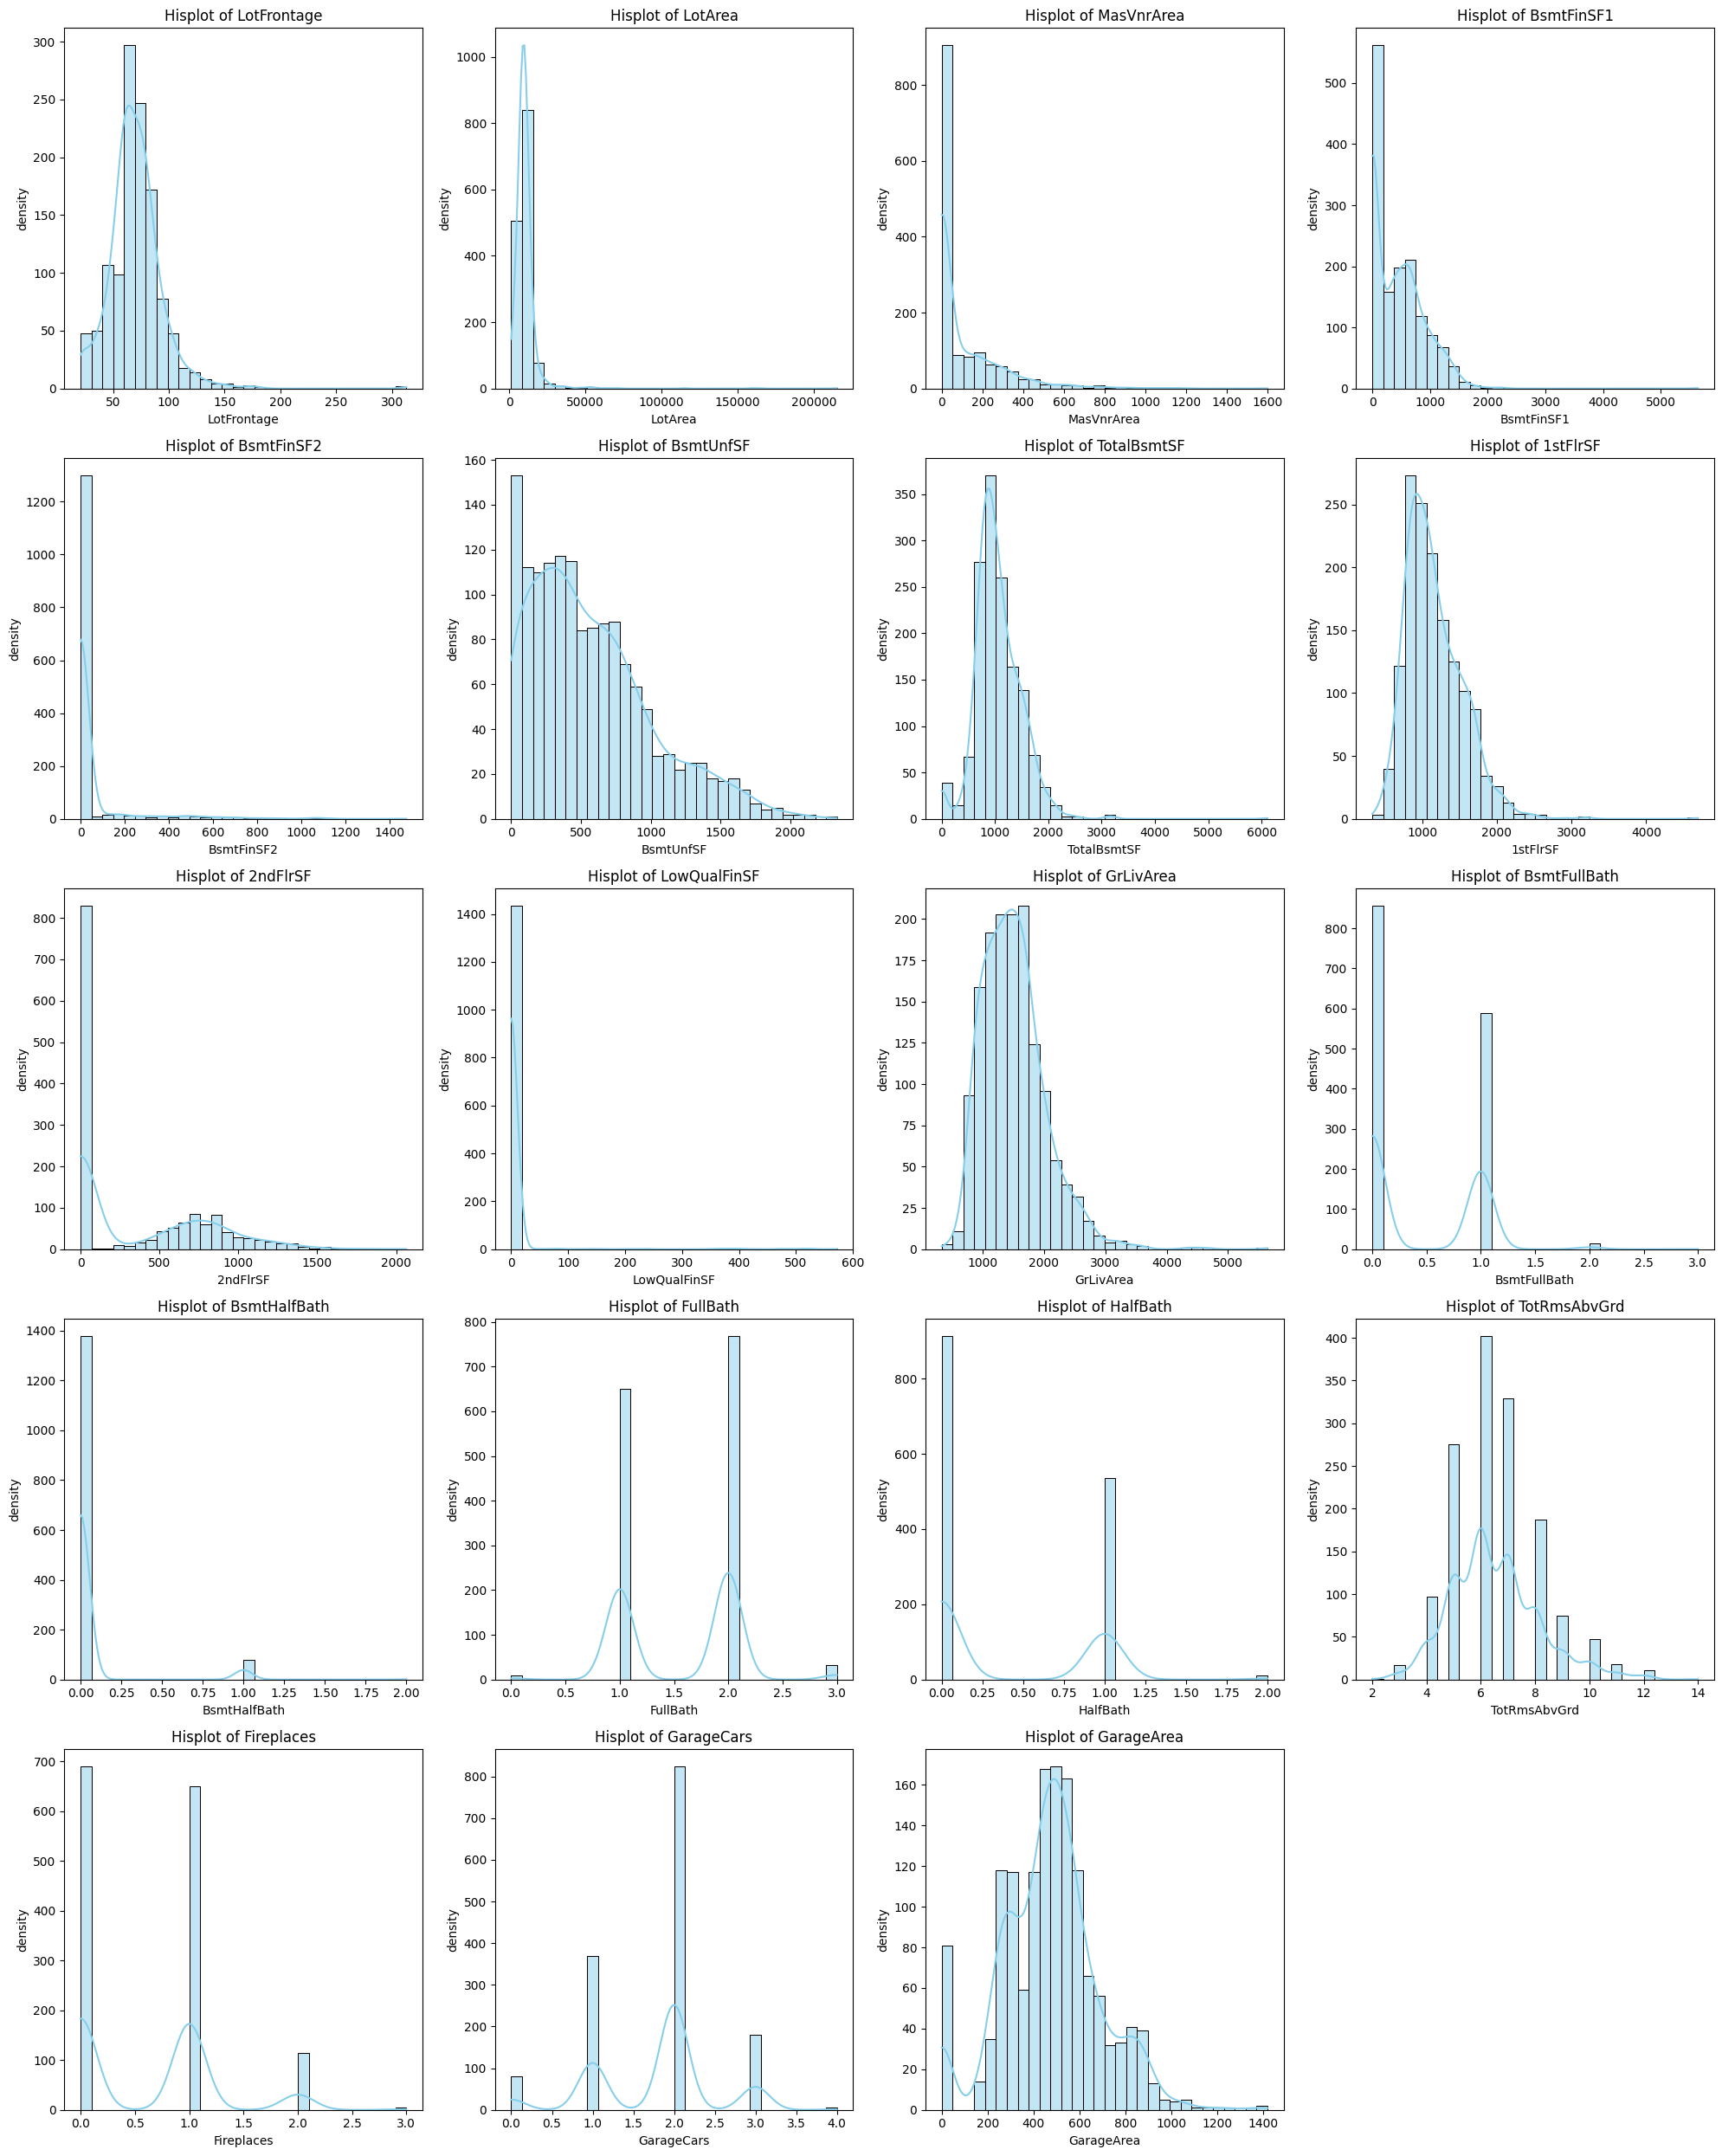

In [22]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber =1 
for column in continous_data.columns[:-1]:
    if plotnumber <= 19:
        plt.subplot(5,4,plotnumber)
        sns.histplot(x =data[column],kde=True, color='skyblue', bins=30)
        
        plt.title(f"Hisplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('density', fontsize = 10)
        plotnumber += 1
        
plt.tight_layout()
plt.show()

#### Univariate Analysis for all features

Univariate analysis involves the examination of a single variable at a time to uncover patterns, 
trends, and key insights within the data. By scrutinizing individual features in isolation, univariate
analysis provides a focused lens on the distribution, central tendencies, and variability of a specific
variable. This method offers a foundational understanding of the data's intrinsic characteristics, aiding 
in the identification of outliers, understanding variable behavior, and laying the groundwork for more complex 
multivariate analyses. Univariate analysis acts as a fundamental exploration, unveiling the unique story each 
variable contributes to the overall narrative of the dataset.

In [23]:
# import sweetviz as sv
# mr = sv.analyze(df)
# mr.show_html()

# Univariate Analysis of categorical data

In [24]:
# Countplot:
#     A countplot is better for visualizing the distribution of categorical data, displaying the count of each category.
#       its also univariate analysis

In [25]:
categorical_data = data.select_dtypes(include = ['object','category'])

In [26]:
categorical_data.shape[1]

43

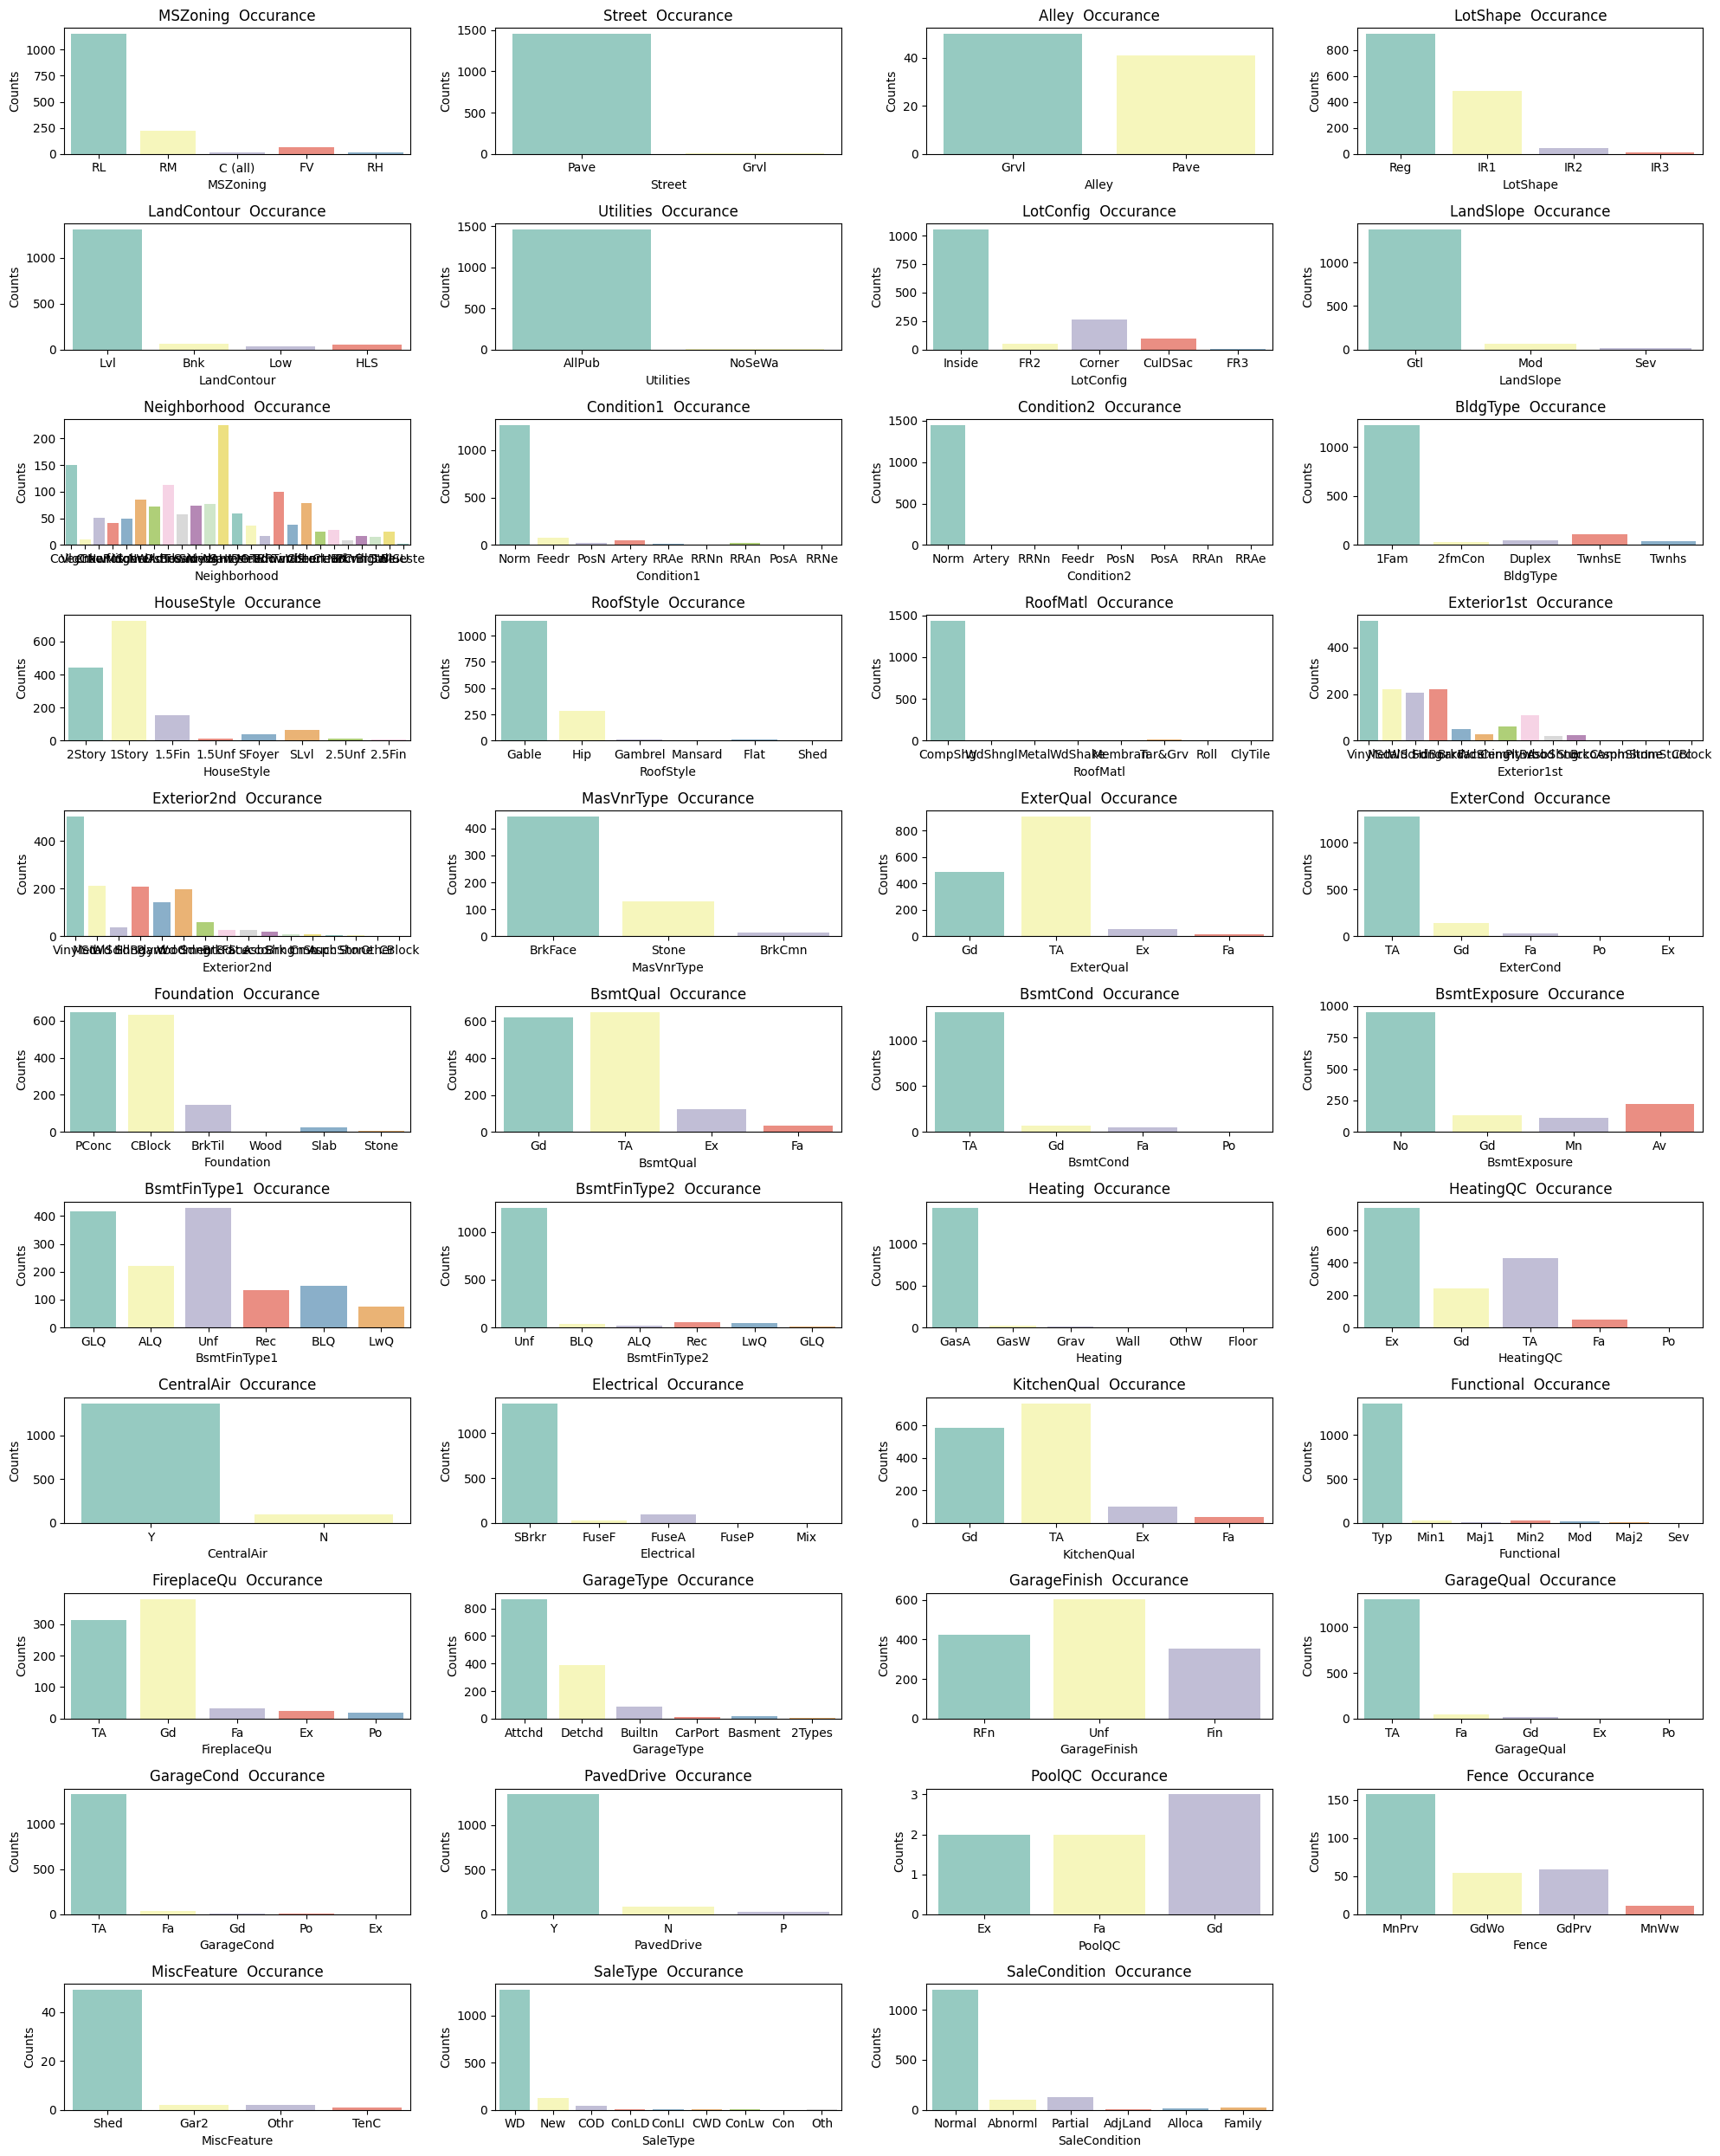

In [27]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1 
for column in categorical_data.columns:
    if plotnumber  <= 43:
        plt.subplot(11, 4, plotnumber)
        sns.countplot(x = categorical_data[column], palette= 'Set3')
        
        plt.title(f'{column}  Occurance')
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize =10)
        plotnumber += 1
        
plt.tight_layout()

### Insights from categorical data bassis on univarate analysis:

The data about houses paints an interesting picture! For instance, in the "MSZoning" category, most homes fall under "RL," showing it's a common zoning type, and "RM" is the next popular choice.

When it comes to the "Street," having a paved street, symbolized by "Pave," is more common. On the flip side, "Grvl" (gravel) streets are less popular.

Exploring alleys, "Grvl" alleys are quite common, indicating they are widely used. Conversely, "Pave" alleys are less favored.

Looking at lot shapes, people seem to prefer regular-shaped lots ("Reg"), with decreasing interest in irregular shapes ("IR1," "IR2," and "IR3").

For utilities, having 'AllPub' is the norm, suggesting high demand. On the other hand, 'NoSewa' is less common, indicating lower demand.

When it comes to the style of homes, single-family homes with one story seem to be the top choice.

In roofing, "Gable" roofs are in high demand, and "Composite Shingle" is a popular choice for roofing material.

The exterior of houses often features "Vinyl Siding" ("Exterior1st"), and "BrkFace" (brick veneer) is preferred in "MasVnrType."

Basements are commonly of "Typical/Average" quality and condition. Unfinished basements ("BsmtFinType1") are quite common.

Most houses use "GasA" for heating and have "Ex" (excellent) heating quality. "CentralAir" (central air conditioning) is almost a standard feature.

Kitchens and fireplaces tend to be of average quality, while "PavedDrive" is widely embraced for driveways.

In the pool category, good-quality pools ("PoolQC") are more common, and for privacy in fences ("Fence"), "MnPrv" (minimal privacy) is frequently chosen.

"MiscFeature" almost always means having a shed, and "SaleType" commonly involves Warranty Deeds ("WD").

These insights into housing preferences can guide decisions and provide a deeper understanding of what people generally look for in a home.

# Bivariate Analysis for continous column

#### LinePlot continous feature:(Bivariate analysis)

### Scatter plot:

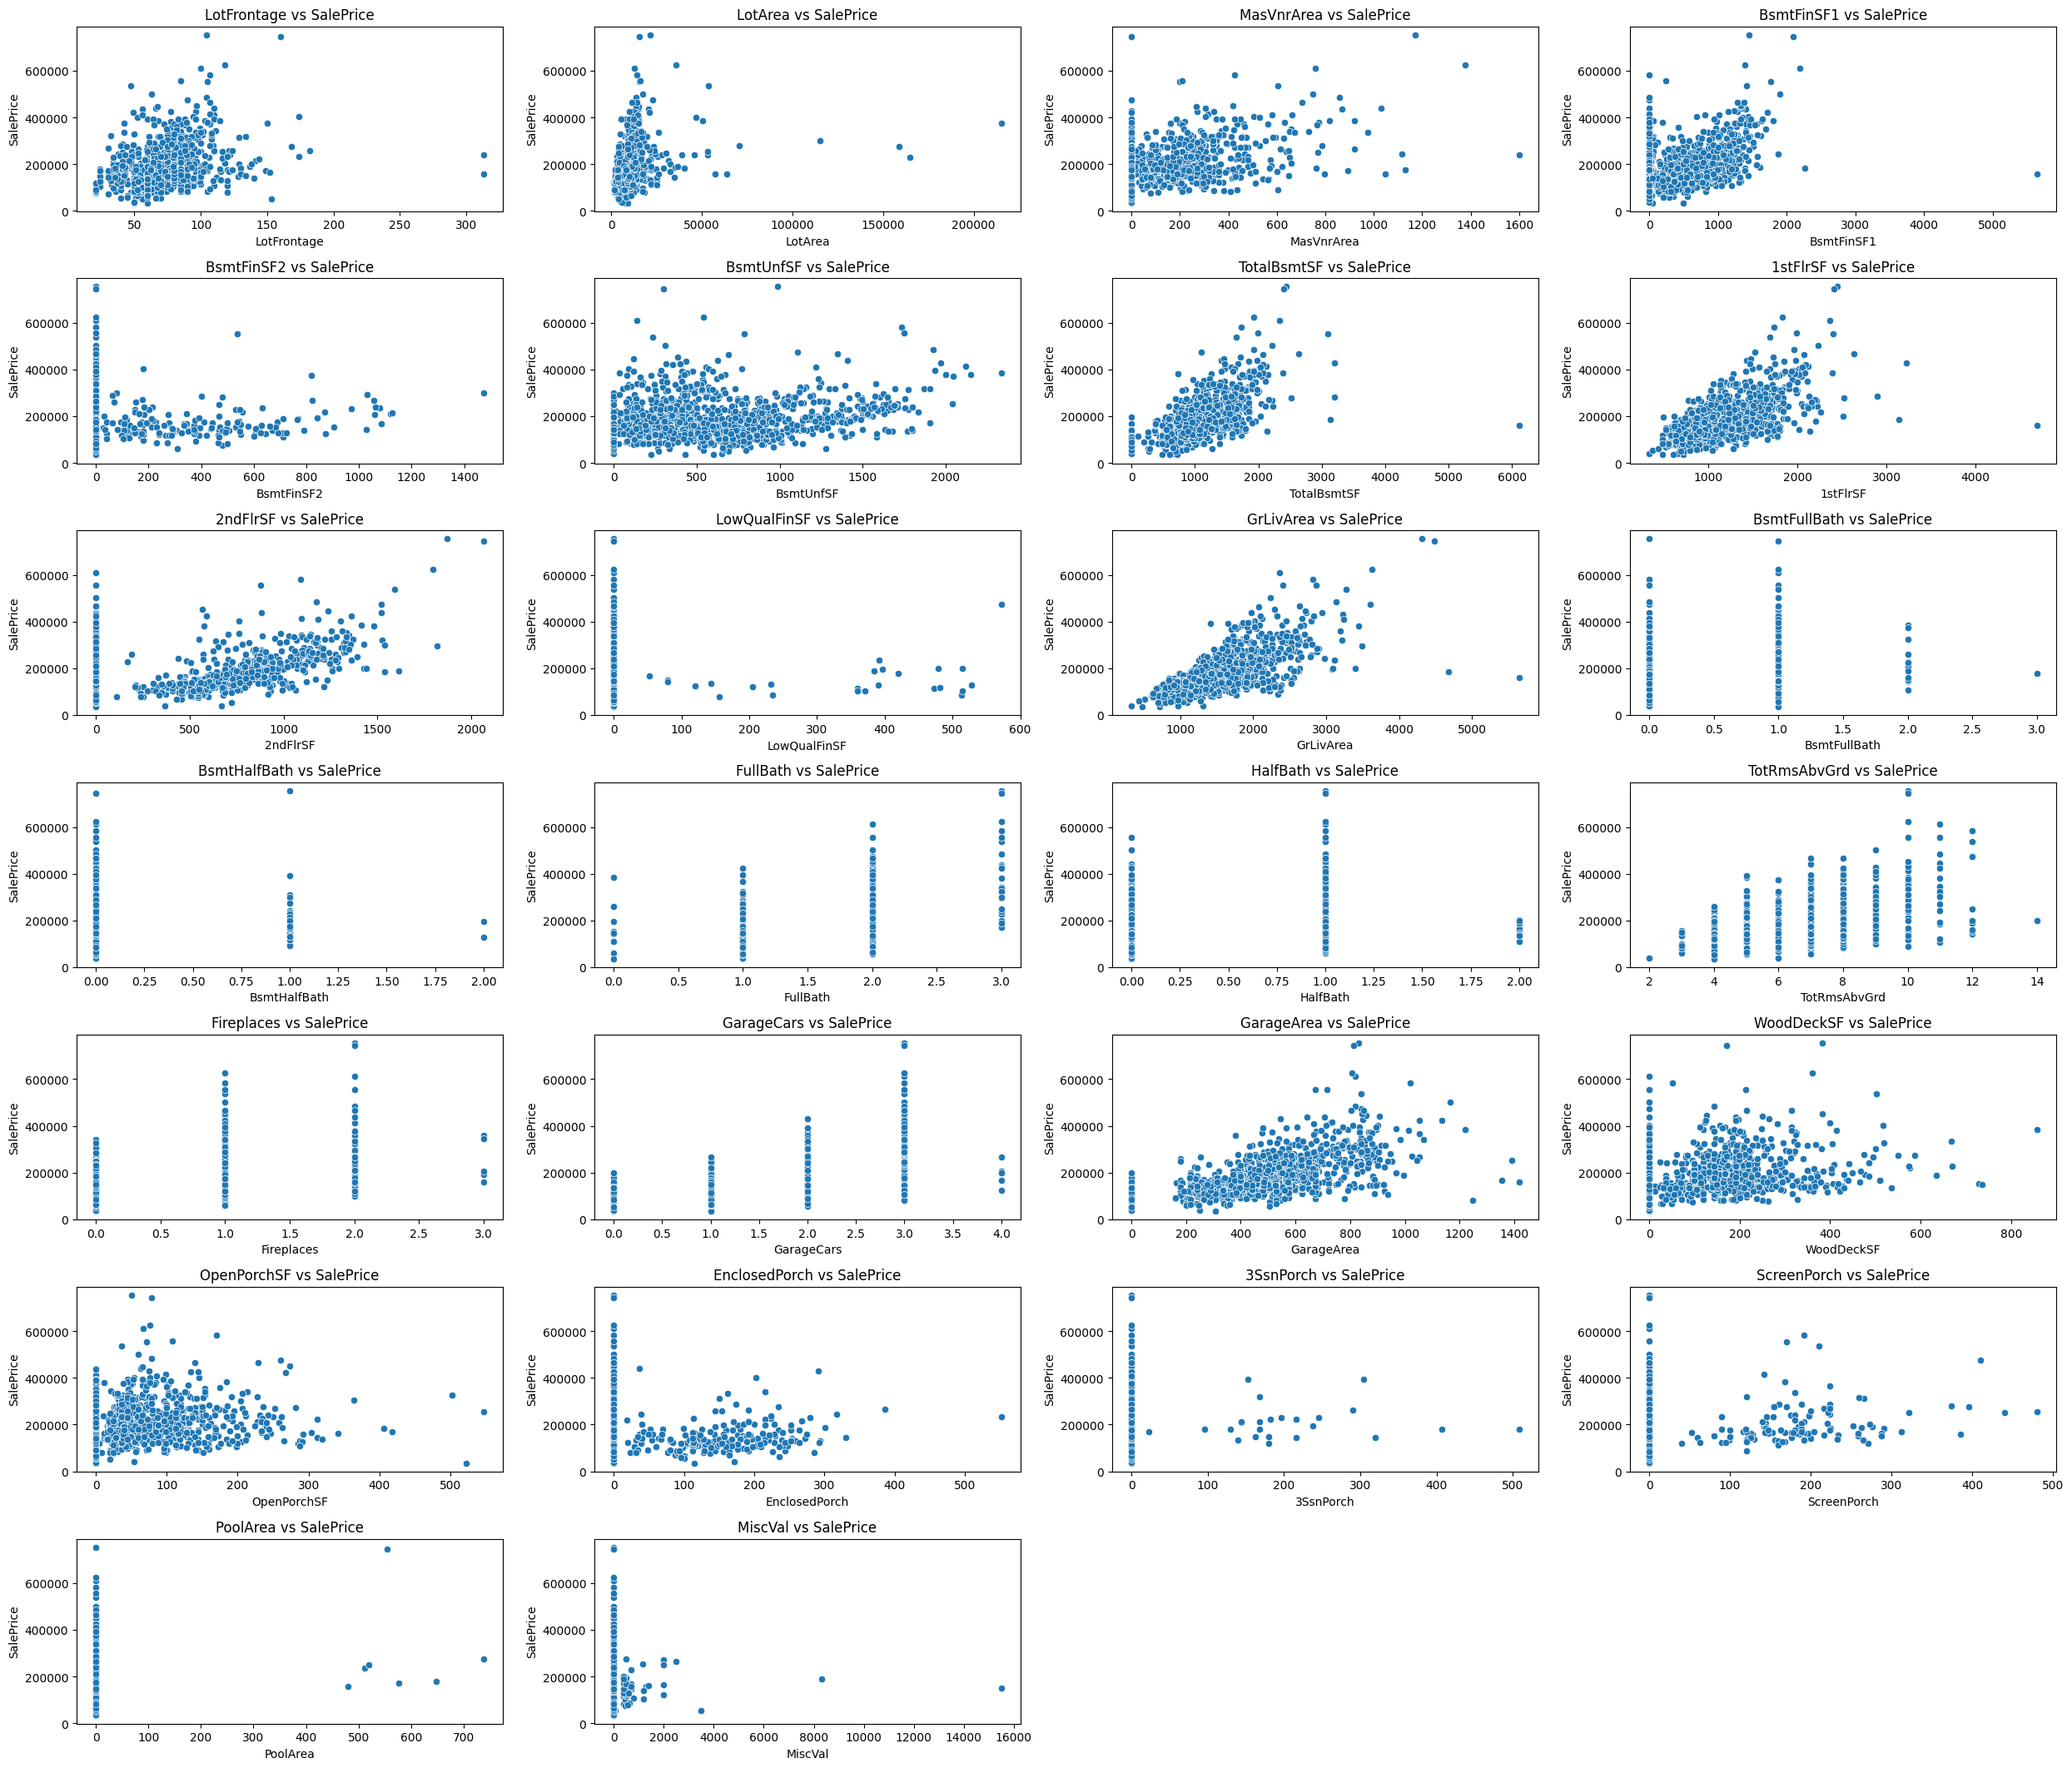

In [28]:
plt.figure(figsize = (25,30), facecolor = 'white')
plotnumber =1
for column in continous_data.columns[:-1]:
    if plotnumber <= 38:
        plt.subplot(10,4, plotnumber)
        sns.scatterplot(x = continous_data[column], y = continous_data['SalePrice'],data =data)
        
        plt.title(f'{column} vs SalePrice')
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('SalePrice',fontsize = 10)
        plotnumber += 1
    
plt.tight_layout()

In [29]:
continous_data.corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.426095    0.193458    0.233633    0.049900   
LotArea           0.426095  1.000000    0.104160    0.214103    0.111170   
MasVnrArea        0.193458  0.104160    1.000000    0.264736   -0.072319   
BsmtFinSF1        0.233633  0.214103    0.264736    1.000000   -0.050117   
BsmtFinSF2        0.049900  0.111170   -0.072319   -0.050117    1.000000   
BsmtUnfSF         0.132644 -0.002618    0.114442   -0.495251   -0.209294   
TotalBsmtSF       0.392075  0.260833    0.363936    0.522396    0.104810   
1stFlrSF          0.457181  0.299475    0.344501    0.445863    0.097117   
2ndFlrSF          0.080177  0.050986    0.174561   -0.137079   -0.099260   
LowQualFinSF      0.038469  0.004779   -0.069071   -0.064503    0.014807   
GrLivArea         0.402797  0.263116    0.390857    0.208171   -0.009640   
BsmtFullBath      0.100949  0.158155    0.085310    0.649212    0.158678   
BsmtHalfBath     -0.007234  0.048046    0.026673    0.067418    0.070948   
FullBath          0.198769  0.126031    0.276833    0.058543   -0.076444   
HalfBath          0.053532  0.014259    0.201444    0.004262   -0.032148   
TotRmsAbvGrd      0.352096  0.190015    0.280682    0.044316   -0.035227   
Fireplaces        0.266639  0.271364    0.249070    0.260011    0.046921   
GarageCars        0.285691  0.154871    0.364204    0.224054   -0.038264   
GarageArea        0.344997  0.180403    0.373066    0.296970   -0.018227   
WoodDeckSF        0.088521  0.171698    0.159718    0.204306    0.067898   
OpenPorchSF       0.151972  0.084774    0.125703    0.111761    0.003093   
EnclosedPorch     0.010700 -0.018340   -0.110204   -0.102303    0.036543   
3SsnPorch         0.070029  0.020423    0.018796    0.026451   -0.029993   
ScreenPorch       0.041383  0.043160    0.061466    0.062021    0.088871   
PoolArea          0.206167  0.077672    0.011723    0.140491    0.041709   
MiscVal           0.003368  0.038068   -0.029815    0.003571    0.004940   
SalePrice         0.351799  0.263843    0.477493    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.132644     0.392075  0.457181  0.080177      0.038469   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779   
MasVnrArea      0.114442     0.363936  0.344501  0.174561     -0.069071   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.131185   
Fireplaces      0.051575     0.339519  0.410531  0.194561     -0.021272   
GarageCars      0.214175     0.434585  0.439317  0.183926     -0.094480   
GarageArea      0.183303     0.486665  0.489782  0.138347     -0.067601   
WoodDeckSF     -0.005316     0.232019  0.235459  0.092165     -0.025444   
OpenPorchSF     0.129005     0.247264  0.211671  0.208026      0.018251   
EnclosedPorch  -0.002538    -0.095478 -0.065292  0.061989      0.061081   
3SsnPorch       0.020764     0.037384  0.056104 -0.024358     -0.004296   
ScreenPorch    -0.012579     0.084489  0.088758  0.040606      0.026799   
PoolArea   

#### Insights of continuous data  (Bivariate Analysis):

 Here are some insightx:

Positive Correlations with 'SalePrice':

'OverallQual' has a strong positive correlation (0.79) with 'SalePrice'. This suggests that higher overall quality is associated with higher sale prices.
'GrLivArea' (0.71) and 'TotalBsmtSF' (0.61) also show strong positive correlations with 'SalePrice', indicating that larger living areas and total basement area tend to result in higher sale pr

ices.
Garage-related Features:

'GarageCars' and 'GarageArea' are highly correlated (0.88), which is expected since a larger garage can typically accommodate more cars.
Both 'GarageCars' (0.64) and 'GarageArea' (0.62) have positive correlations with 'SalePrice', suggesting that houses with larger garages or more garage 
space tends to have higher sale prices.


Basement-related Features:

'TotalBsmtSF' has a strong positive correlation with '1stFlrSF' (0.82), indicating that the size of the basement is related to the size of the first floor.
'BsmtFinSF1' and 'BsmtUnfSF' have a moderate negative correlation (-0.50), suggesting that as finished basement area increases, unfinished basement area tends
 to decrease.

 
Fireplaces and Rooms:

'Fireplaces' has a moderate positive correlation with 'GrLivArea' (0.47), indicating that houses with larger living areas tend to have more fireplaces.
'TotRmsAbvGrd' (Total rooms above ground) has a strong positive correlation with 'GrLivArea' (0.71), which is expected since larger living areas usually
result in more rooms.


Porch and Outdoor Features:

'WoodDeckSF' has a moderate positive correlation with 'OpenPorchSF' (0.34), suggesting that houses with wood decks also tend to have open porches.
'EnclosedPorch', '3SsnPorch', and 'ScreenPorch' have relatively low correlations with 'SalePrice', indicating that these features may not strongly 
influence sale prices.


These insights provide an initial understanding of the relationships between various features and the target variable ('SalePrice'). 

# Bivariate Analysis of categorical columns

I used two type of plot and thier differnce is given below:
    "differnce between swarmplot and barplot\n"
A swarmplot provides more detailed insights into the distribution of individual data points within categories, 
while a barplot offers a summary of central tendency, making swarmplots more suitable for understanding the density
and spread of data.

In [30]:
# for column in categorical_column.columns:
#     sns.barplot(y = df[column], x = df['SalePrice'], label =f"{column} : SalePrice")
#     plt.title(f"{column} : vs SalePrice")
#     plt.xlabel('SalePrice', fontsize = 10)
#     plt.ylabel(column, fontsize = 10)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

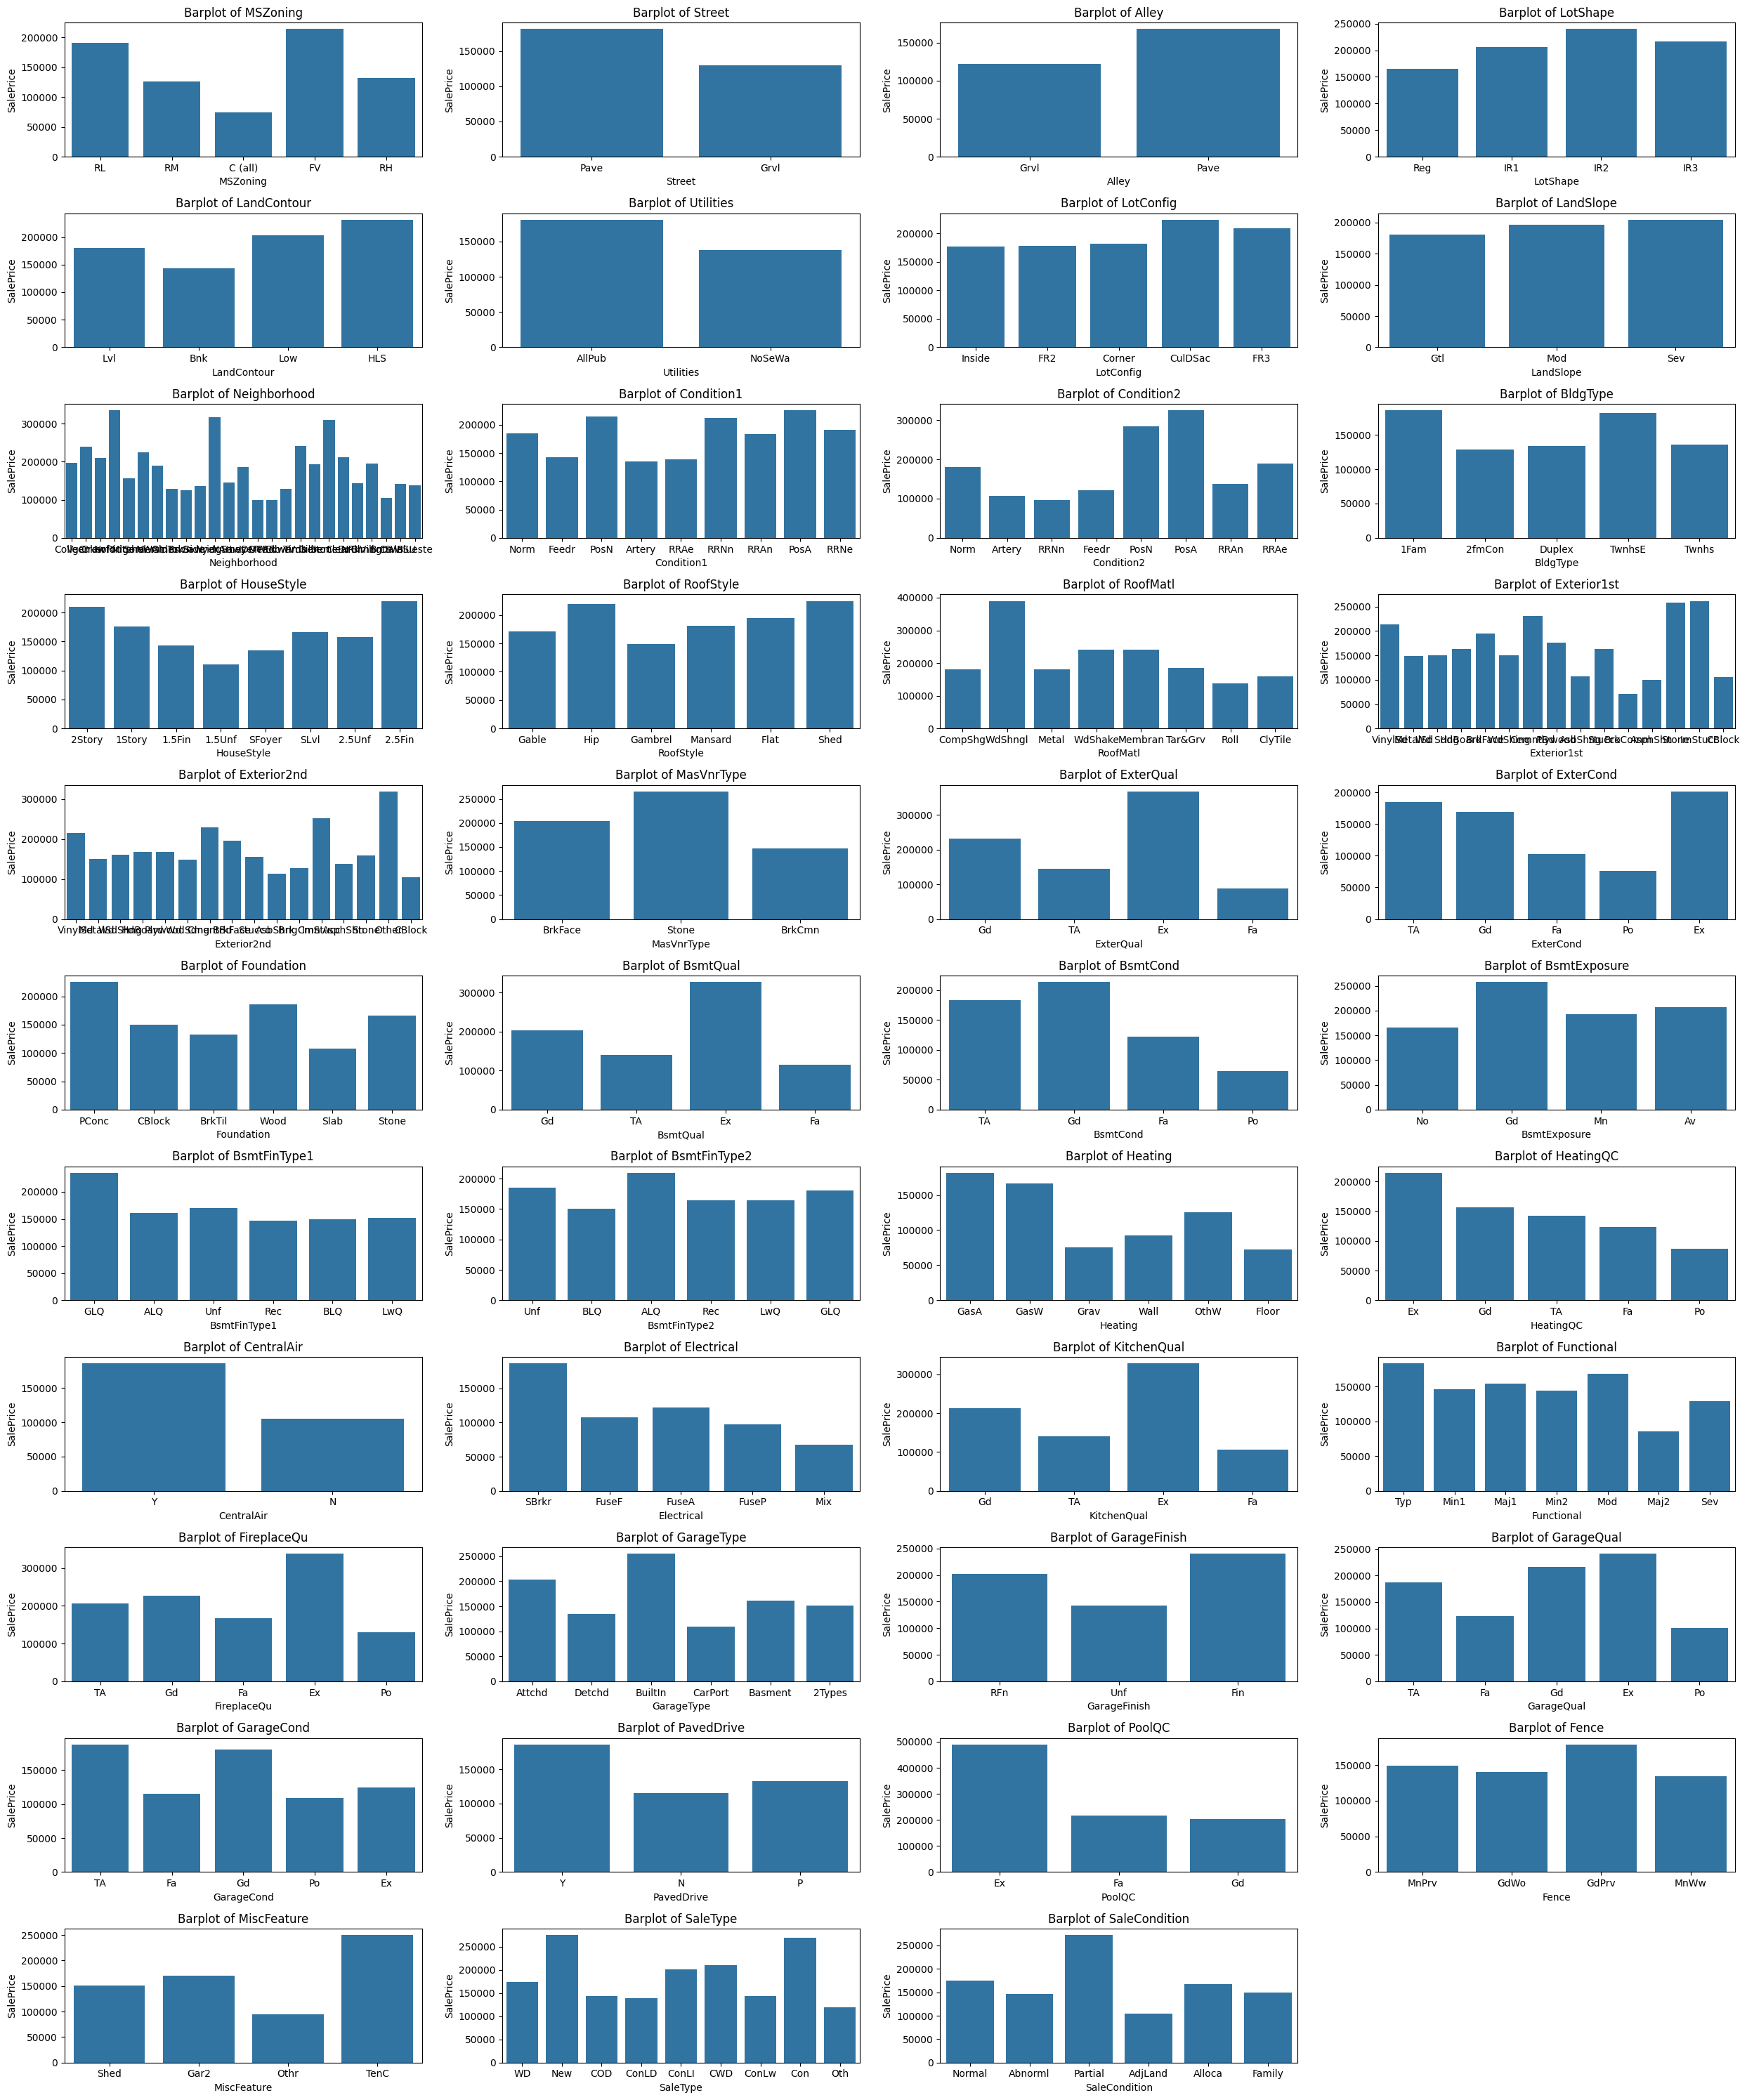

In [31]:
plt.figure(figsize = (25, 30), facecolor = 'white')
plotnumber = 1
for column in categorical_data.columns:
    if plotnumber <= 43:
        plt.subplot(11,4, plotnumber)
        sns.barplot(x = categorical_data[column], y = data.SalePrice, ci = None)
        
        plt.title(f'Barplot of {column}')
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('SalePrice', fontsize = 10)
        plotnumber += 1
        
plt.tight_layout()

#### Insights from bivariate Analysis of categorical data:

###### -> MSZoning:

'FV' homes boast higher SalePrices.

'RL' zoning (Residential Low Density) positively influences sale prices.

'RM' and 'RH' zoning show similar effects on sale prices, while 'C (all)' zoning has the least impact on property prices.

##### ->Street:

'Homes with 'Pave' roads command higher SalePrices, and 'Grvl' road access is the second most impactful.'

##### ->Alley:

'Homes with 'Pave' alleys demonstrate a strong positive link to SalePrice, suggesting higher values. 'Grvl' alleys, while the second most influential, likely have a slightly lesser impact on sale prices compared to 'Pave'.

###### -> LotShape:

'IR2' (moderately irregular) lots have the strongest impact on SalePrice, followed by 'IR3' (highly irregular), 'IR1' (slightly irregular), and then 'Reg' (regular-shaped) lots. This sequence implies a connection between lot irregularity and SalePrice.

###### -> LandCounter:

High Impact on SalePrice:

'HLS' (hillside) land contour has the highest impact on SalePrice.

Second-Highest Impact:

'Low' contour properties (depression) come next in positively impacting SalePrice.

Moderate Impact:

'Lvl' contour properties (level or flat) show a moderate impact on SalePrice.

Lowest Impact:

'Bnk' contour properties (banked or sloped) have the least impact on SalePrice.

##### ->Utilities:

'HLS' (hillside) properties have the highest impact on SalePrice, followed by 'Low' (depression), 'Lvl' (level), and 'Bnk' (sloped) contours in descending order of influence

'AllPub' (All Public Utilities) category in the 'Utilities' variable has the strongest positive impact on the target variable SalePrice, while 'NoSeWa' (No Separate Water and Electricity) has a moderate impact. This implies that properties with access to all standard public utilities may be associated with higher sale prices compared to properties with limited utility services.

##### ->LotConfig: 

The 'LotConfig' variable describes the lot configuration of properties in dataset:
'Inside': Properties with lot configurations positioned inside the neighborhood.
'FR2': Properties with lot configurations adjacent to a feeder road.
'Corner': Properties with lot configurations at a street corner.
'CulDSac': Properties with lot configurations at the end of a cul-de-sac.
'FR3': Properties with lot configurations adjacent to a feeder road on three sides.

'CulDSac' Configuration:

'CulDSac' lot configurations have the highest impact on sale prices.

'FR3' Configuration:

Properties with 'FR3' (adjacent to a feeder road on three sides) lot configurations have the second-highest impact on sale prices.

Similar Impact:

The 'Inside,' 'FR2' (adjacent to a feeder road), and 'Corner' lot configurations show a similar impact on sale prices. This indicates that the specific layout and positioning of properties within their neighborhoods may influence their sale prices.

##### ->LandSlope:

'Gtl': Represents properties with a gentle slope.

'Mod': Represents properties with a moderate slope.

'Sev': Represents properties with a severe slope.

'Gtl' (gentle slope) and 'Mod' (moderate slope) have the same impact on sale prices, while 'Sev' (severe slope) has a slightly higher impact. This suggests properties with more severe slopes may be associated with slightly higher sale prices compared to those with gentle or moderate slopes.

###### 9)-> Neighborhood:

our observation suggests that, in our dataset, the neighborhood labeled 'NoRidge' has the highest impact on house prices. 

###### 10)-> Condition1:

Here's a brief description of each value in the 'Condition1' variable:

'Norm': Properties in a normal proximity to main roads or railroads.

'Feedr': Properties facing a feeder road, which is a smaller road that provides access to properties.

'PosN': Properties located near a positive feature, such as a park.

'Artery': Properties adjacent to an arterial road, a more significant road.
'RRAe': Properties with a rear easement, indicating a railroad at the rear.
'RRNn': Properties with a railroad nearby to the north.
'RRAn': Properties with a railroad nearby to the northwest.
'PosA': Properties located near a positive feature, such as a park (similar to 'PosN').
'RRNe': Properties with a railroad nearby to the northeast.


These values describe different conditions related to the proximity of properties to main roads or railroads, providing insights 
into their locations and potential influences on property values.


'PosA,' 'PosN,' and 'RRNn' conditions have a substantial impact on SalePrice, implying higher property values for homes near positive features or north-facing railroads.

##### ->Condition2:

Observations indicate that in the 'Condition2' variable, 'PosA' (proximity to a positive feature, similar to a park) and 'PosN' (proximity to a positive feature, such as a park) exhibit a substantial impact on the target variable SalePrice.

##### ->BldgType:

BldgType' Values:

'1Fam': Single-family homes.
'2fmCon': Two-family conversion (duplex).
'Duplex': Duplexes.
'TwnhsE': Townhouses inside a building.
'Twnhs': Townhouses in rows.
These values represent the structural characteristics or types of residential buildings in the d


Our observation suggests that, in our dataset, '1Fam' (Single-family homes) and 'TwnhsE' (Townhouses inside a building) exhibit the highest impact on the target variable, implying that these dwelling types may be associated with higher values.ataset.

##### -> HouseStyle:

Two-story houses ('2Story') and two and a half story houses with finished upper levels ('2.5Fin') are most common, potentially influencing higher sale prices.

Single-story houses ('1Story') and Split Level houses ('SLvl') are also prevalent, impacting the distribution of sale prices.

1.5  is the least occurring and these type of houses have less price

##### -> RoofStyle :

'Hip' and 'Shed' Roofstyle: Houses with 'Hip' and 'Shed' roof styles exhibit the highest SalePrice, suggesting a positive impact on property values.

'Gable,' 'Mansard,' 'Flat' Roofstyles: These roof styles share the second-highest SalePrice, indicating a comparable impact on property values.

'Gambrel' Roofstyle: Houses with 'Gambrel' roof style tend to have a relatively lower SalePrice compared to the aforementioned categories.

##### -> RoofMatl:

Houses with 'WdShngl' (Wood shingles) as the roofing material tend to have the highest SalePrice, suggesting a positive impact on property values.

##### -> Exterior1st and Exterior2nd :

In 'Exterior1st,' houses with 'Stone' and 'ImStucc' (Imitation stucco) tend to contribute to the highest SalePrice.

In 'Exterior2nd,' houses with 'Other' as the exterior material have the highest SalePrice.

##### -> MasVnrType:

Houses with 'Stone' masonry veneer contribute to the highest SalePrice.
'BrkFace' masonry veneer follows as the second-highest contributor to SalePrice.
Houses with 'BrkCmn' masonry veneer have the least impact on SalePrice.

######  -> ExterQual and ExterCond :

Houses with 'ExterQual' ('Ex') indicating Excellent quality and 'ExterCond' ('Ex') denoting Excellent condition, as well as 'TA' (Typical/Average condition), contribute to the highest SalePrice.

#####  ->Foundation:

Houses with 'Foundation' type 'PConc' (Poured Concrete) have the highest SalePrice, indicating a positive impact on property values. Additionally, those with 'Wood' foundation have the second-highest SalePrice, signifying a notable impact on property values.

#####  ->BsmtQual BsmtCond and BsmtExposure:

Houses with 'BsmtQual' 'Ex' (Excellent quality) & 'BsmtCond' with 'TA' (Typical/Average condition) and 'Gd' (Good condition) and with 'BsmtExposure' 'Gd' (Good exposure) contribute to higher SalePrice.

##### ->BsmtFinType1  and  BsmtFinType2 :

Houses with 'BsmtFinType1' category 'GLQ' (Good Living Quarters) and 'BsmtFinType2' with category 'ALQ' (Average Living Quarters) is associated with higher SalePrices.

##### ->Heating and HeatingQc:

Houses with 'Heating' type 'GasA' (Gas forced warm air furnace) ,'GasW' (Gas hot water or steam heat) heating systems  and Excellent Heating quality are associated with high SalePrices.

##### ->CentralAir:

Houses with 'CentralAir' Y (indicating the presence of central air conditioning) tend to have the highest SalePrice.

##### ->GarageType & GarageFinish & GarageQual  & GarageCond :

Houses featuring a 'BuiltIn' (Built-in garage) in the 'GarageType' category, a 'Fin' (Finished) interior in 'GarageFinish,' and possessing 'GarageQual' rated as 'Ex' (Excellent quality) or 'Gd' (Good quality), along with a 'GarageCond' characterized by 'TA' (Typical/Average condition) or 'Gd' (Good condition), demonstrate higher SalePrices. These attributes collectively suggest that the presence of a built-in garage with a finished interior, coupled with good to excellent quality and condition ratings, positively influences the overall SalePrice of houses 

##### ->PavedDrive & PoolQC & Fence & MiscFeature & SaleType & SaleCondition :

Houses boasting a paved driveway ('Y' in 'PavedDrive') command higher SalePrices, while those equipped with an excellent-quality pool ('Ex' in 'PoolQC') and a good privacy fence ('GdPrv' in 'Fence') are also associated with elevated SalePrices. The presence of unique features, such as a tennis court ('TenC' in 'MiscFeature'), further contributes to a property's premium valuation. Additionally, homes marked as 'New' ('SaleType') or following conventional sale methods ('Con') tend to fetch higher prices, and the sale condition 'Partial' (indicating incomplete assessment during sale) is correlated with increased SalePrices. These observations underscore the significance of specific property attributes and transaction conditions in influencing overall property values.

### Multivariate Analysis:

In [33]:
# for multi variate analysis we will only use continous feature along with target variable
continous_data.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [34]:
sub_of_continous = data[['LotArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','SalePrice']]
sub_of_continous.head()

LotArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0     8450         706          856       856       854       1710   
1     9600         978         1262      1262         0       1262   
2    11250         486          920       920       866       1786   
3     9550         216          756       961       756       1717   
4    14260         655         1145      1145      1053       2198   

   GarageArea  SalePrice  
0         548     208500  
1         460     181500  
2         608     223500  
3         642     140000  
4         836     250000

## pairplot(multivariate analysis of only continous_feature):

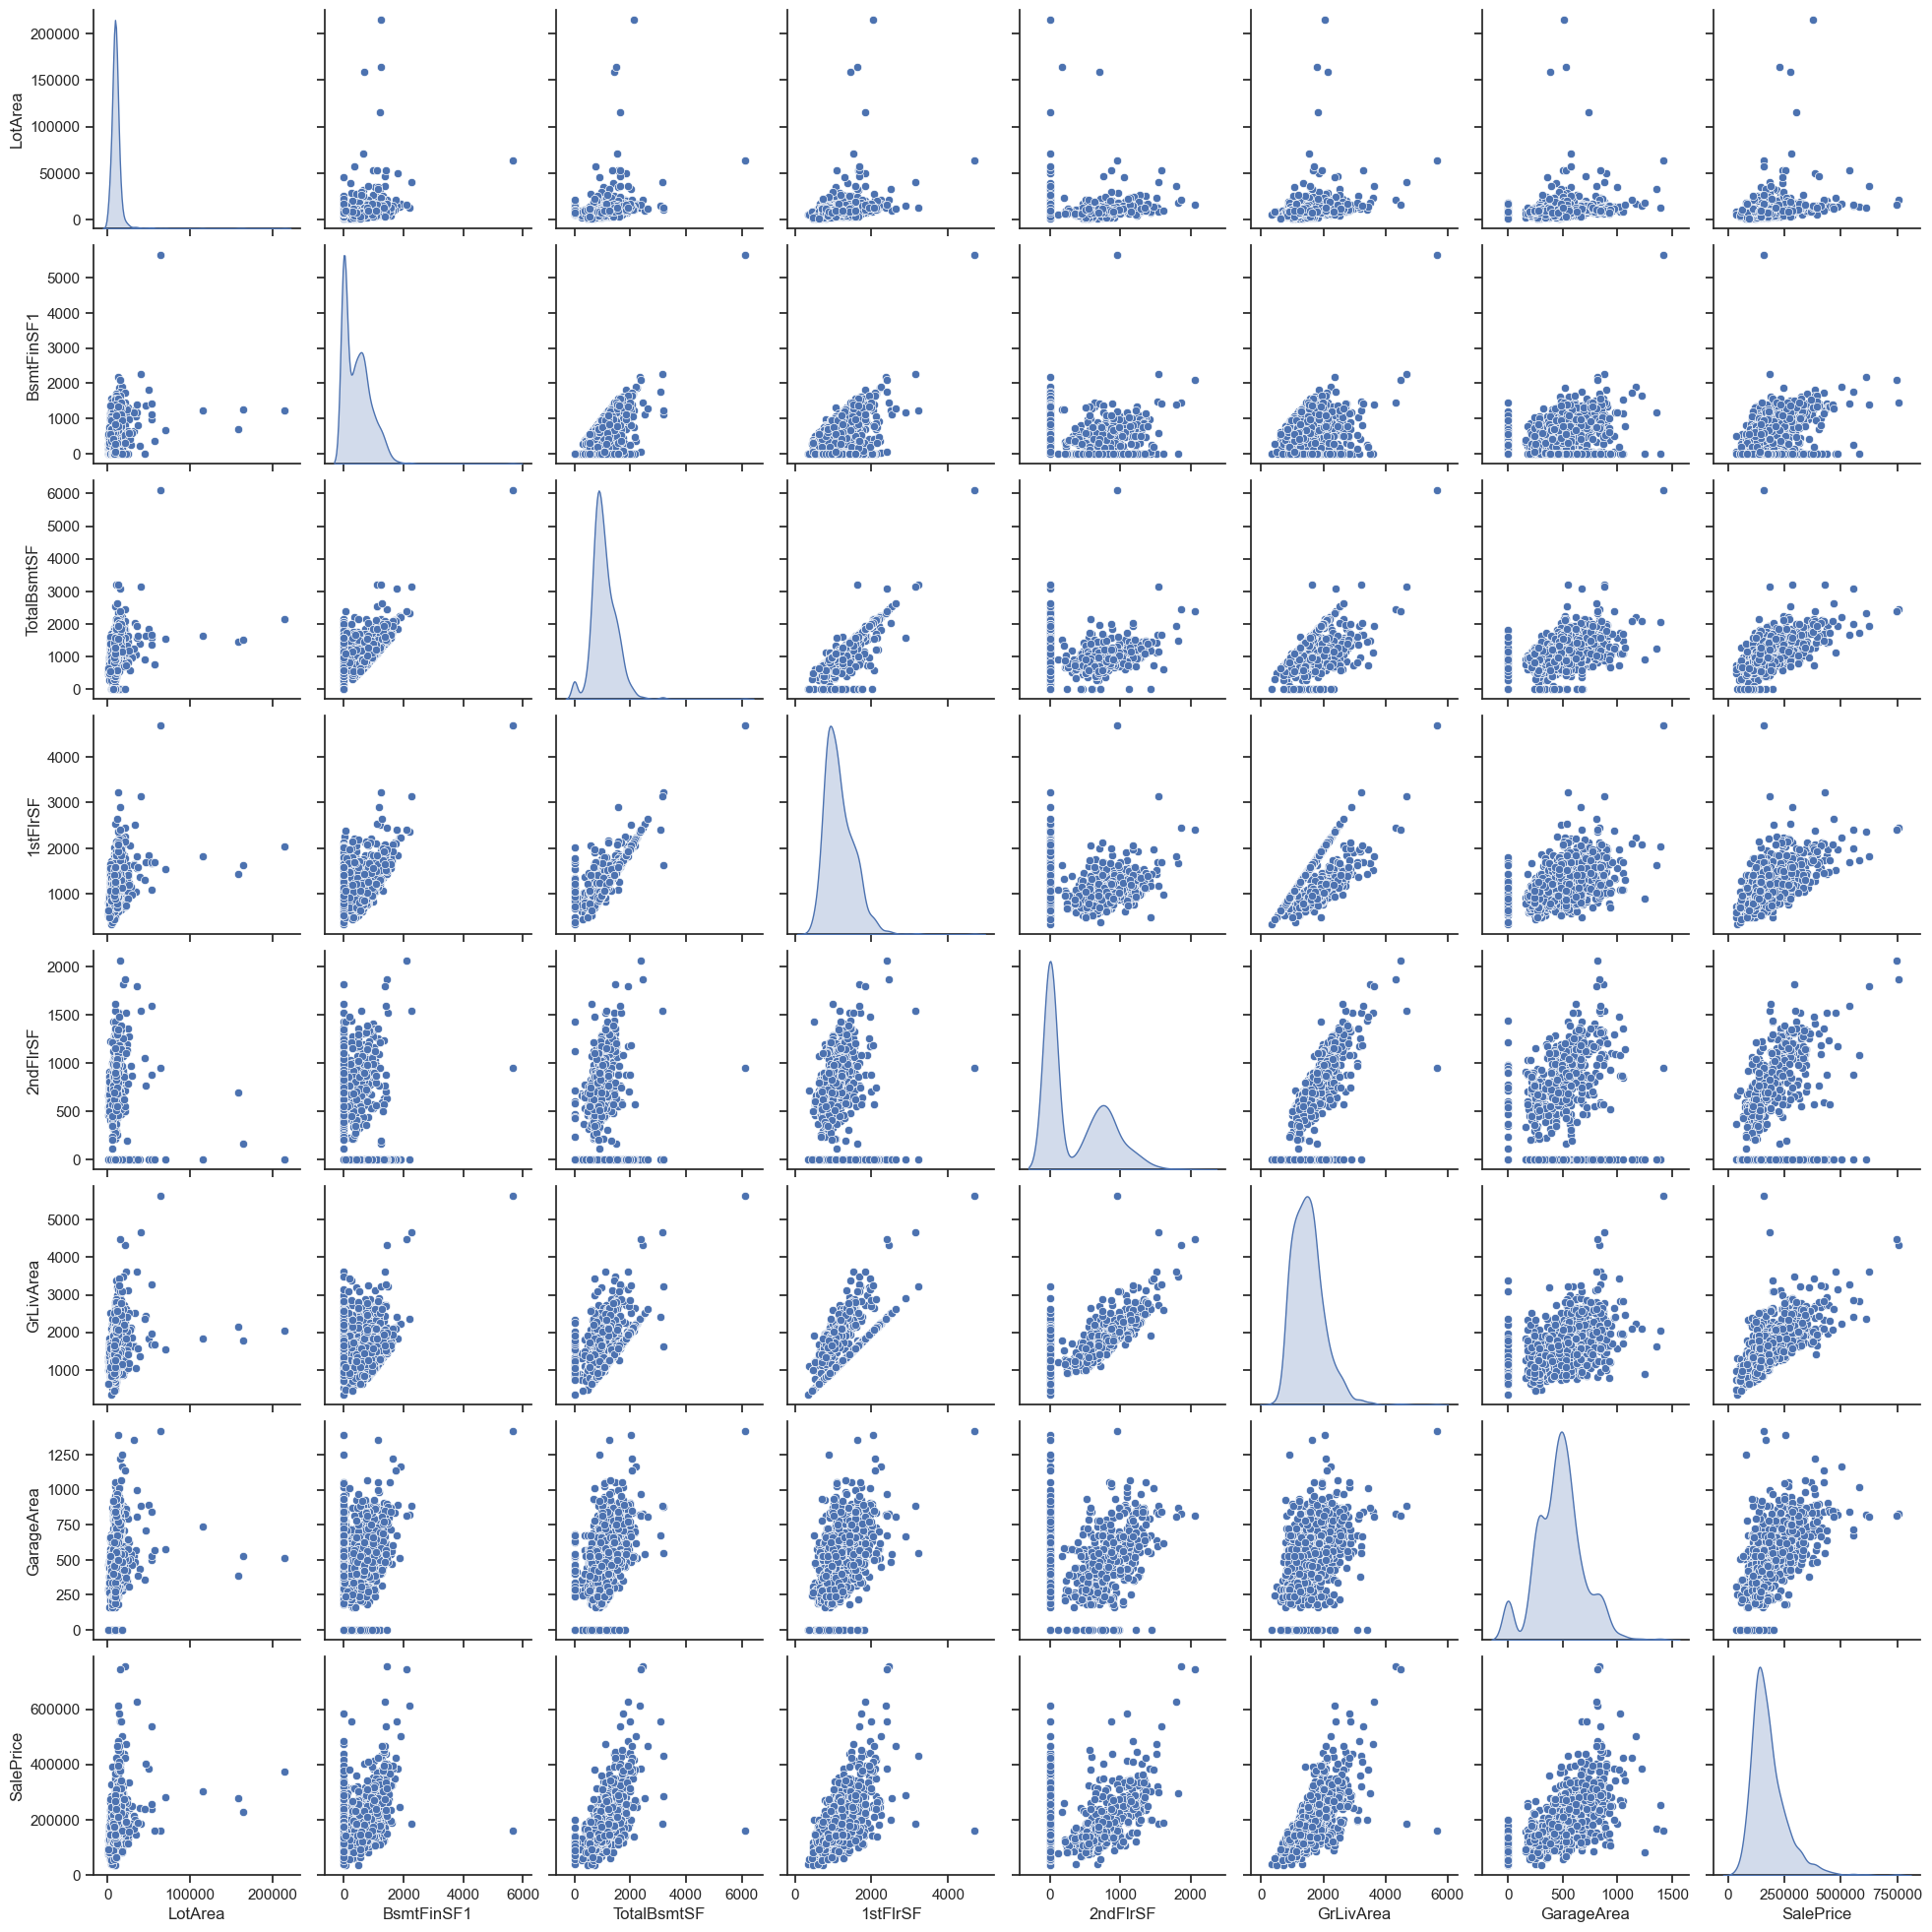

In [35]:
sns.set(style = 'ticks')
sns.pairplot(sub_of_continous, diag_kind = 'kde')

In [36]:
sub_of_continous.corr()

LotArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
LotArea      1.000000    0.214103     0.260833  0.299475  0.050986   0.263116   
BsmtFinSF1   0.214103    1.000000     0.522396  0.445863 -0.137079   0.208171   
TotalBsmtSF  0.260833    0.522396     1.000000  0.819530 -0.174512   0.454868   
1stFlrSF     0.299475    0.445863     0.819530  1.000000 -0.202646   0.566024   
2ndFlrSF     0.050986   -0.137079    -0.174512 -0.202646  1.000000   0.687501   
GrLivArea    0.263116    0.208171     0.454868  0.566024  0.687501   1.000000   
GarageArea   0.180403    0.296970     0.486665  0.489782  0.138347   0.468997   
SalePrice    0.263843    0.386420     0.613581  0.605852  0.319334   0.708624   

             GarageArea  SalePrice  
LotArea        0.180403   0.263843  
BsmtFinSF1     0.296970   0.386420  
TotalBsmtSF    0.486665   0.613581  
1stFlrSF       0.489782   0.605852  
2ndFlrSF       0.138347   0.319334  
GrLivArea      0.468997   0.708624  
GarageArea     1.000000   0.623431  
SalePrice      0.623431   1.000000

#### insights:

High Correlations with SalePrice:
Features with relatively high positive correlations with SalePrice include:


TotalBsmtSF (0.613581)
GrLivArea (0.708624)
GarageArea (0.623431)
These features might have a strong influence on the SalePrice. Consider exploring these relationships further, and they could potentially be important predictors.



Correlation between Features:
TotalBsmtSF and 1stFlrSF show a high correlation of 0.819530. This is not surprising, as the total basement area and the first floor area are likely to be correlated.

GrLivArea and 2ndFlrSF also exhibit a strong correlation of 0.687501. This makes sense since the living area above ground and the second floor area are related.

GarageArea and TotalBsmtSF, as well as GarageArea and 1stFlrSF, show notable correlations. It suggests that the garage area is correlated with both the total basement area and the first floor area.



Low Correlations:
LotArea shows relatively low correlations with the other features. It might not have a strong linear relationship with the other variables.


Potential Multicollinearity:
TotalBsmtSF, 1stFlrSF, and GarageArea all have relatively high correlations with each other. When using these features in a predictive model, multicollinearity might need to be considered.


Negative Correlation:
2ndFlrSF has a negative correlation with BsmtFinSF1 (-0.137079). This suggests that as the finished square feet of the basement increase, the second floor square footage tends to decrease

# Data Preprocessing 

In [37]:
# handling null values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Handling missing values in categorical columns using mode:>:

The mode is the most common value in a set of data. Imputing with the mode means filling in missing values with this most frequently occurring value. It's often used for categorical data and is quick and simple. This helps maintain the overall pattern of categories in the dataset. 

In [40]:
categorical_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [41]:
column_to_impute=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType',
   'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [44]:
for column in column_to_impute:
    mode_value= data[column].mode().iloc[0]
    data[column].fillna(mode_value, inplace = True)
    

In [45]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

### Handling values in continous feature and imputing it with median because wwe have skewed data:

The median is the middle value in a sorted list of numbers. Replacing missing values with the median in continuous features is a good idea because it's less sensitive to extreme values (outliers), providing a robust measure of central tendency. This helps maintain the typical value in the dataset and reduces the impact of extreme values on statistical analyses.

In [47]:
continous_data.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [48]:
col_to_impute = ['LotFrontage','MasVnrArea','GarageYrBlt']

for column in col_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace = True)

In [49]:
data.drop('Id', axis = 1, inplace = True)
print(data.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Always Remember:
    

if you have categorical data, first handle missing values, then encode the categorical variables before addressing outliers

we should encode the categorical data before handling outliers

# Encoding of above Categorical features

Encoding in the context of machine learning involves converting categorical data into a numerical format that
machine learning algorithms can understand. It's necessary because many algorithms work with numerical inputs.
Two common methods are:

Label Encoding: 
    Assigns a unique numerical label to each category, useful when there's an ordinal relationship among categories.

One-Hot Encoding: 
    Creates binary columns for each category, representing their presence or absence, suitable for nominal data
    with no inherent order.

Manual encoding involves assigning numerical values to categorical data based on subjective decisions or domain knowledge.
Unlike automated encoding methods, it lacks the systematic approach of algorithms like Label Encoding or One-Hot Encoding.
Manual encoding may introduce biases and is less common in standard machine learning practices.

In [53]:
categorical_data.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

#### Laber Encoder:

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [56]:
column_to_encode = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [57]:
for column in column_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [58]:
# All categorical values is encoded to numerical values
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      0         3   
1          20         3         80.0     9600       1      0         3   
2          60         3         68.0    11250       1      0         0   
3          70         3         60.0     9550       1      0         0   
4          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           1   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           1   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             5           0   
1             1             0         978             5           0   
2             2             2         486             5           0   
3             3             0         216             5           0   
4             0             2         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           4   
1        284         1262        1          0           1           4   
2        434          920        1          0           1           4   
3        540          756        1          2           1           4   
4        490         1145        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4      

In [60]:
data.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32


In [61]:
cate_encod_column = []

for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 60:
        cate_encode_column.append(column)
        print(f'{column}: {data[column].unique()}')
        print("*******************")
  

In [62]:
cate_encod_column

[]

#### Varaince :

In [63]:
variance = np.var(data)
print('Variance ::',variance)

Variance :: MSSubClass       1.788113e+03
MSZoning         3.991725e-01
LotFrontage      4.848862e+02
LotArea          9.955741e+07
Street           4.092700e-03
Alley            2.729358e-02
LotShape         1.984361e+00
LandContour      5.004480e-01
Utilities        6.844624e-04
LotConfig        2.631139e+00
LandSlope        7.625211e-02
Neighborhood     3.614024e+01
Condition1       7.538018e-01
Condition2       6.705573e-02
BldgType         1.434885e+00
HouseStyle       3.650584e+00
OverallQual      1.911369e+00
OverallCond      1.237474e+00
YearBuilt        9.115906e+02
YearRemodAdd     4.259409e+02
RoofStyle        6.967438e-01
RoofMatl         3.587071e-01
Exterior1st      1.021802e+01
Exterior2nd      1.252705e+01
MasVnrType       9.195487e-02
MasVnrArea       3.264146e+04
ExterQual        4.812986e-01
ExterCond        5.351750e-01
Foundation       5.214951e-01
BsmtQual         7.468657e-01
BsmtCond         4.234054e-01
BsmtExposure     1.295231e+00
BsmtFinType1     3.374278e+0

#### checking for constant features:

Constant features, with the same value across all instances, don't contribute meaningful information for predictive modeling as they lack variability. Identifying and dropping these features is essential to reduce model complexity, improve computational efficiency, and prevent potential issues related to multicollinearity in regression models.

In [64]:
constant_feature = [col for col in data.columns if data[col].std == 0]
constant_feature

[]

### Handling Outliers:

Outliers are data points that significantly differ from the majority of the dataset. They can distort statistical analyses and machine learning models, affecting their accuracy. Identifying and handling outliers is crucial for maintaining the integrity and reliability of data-driven analyses.

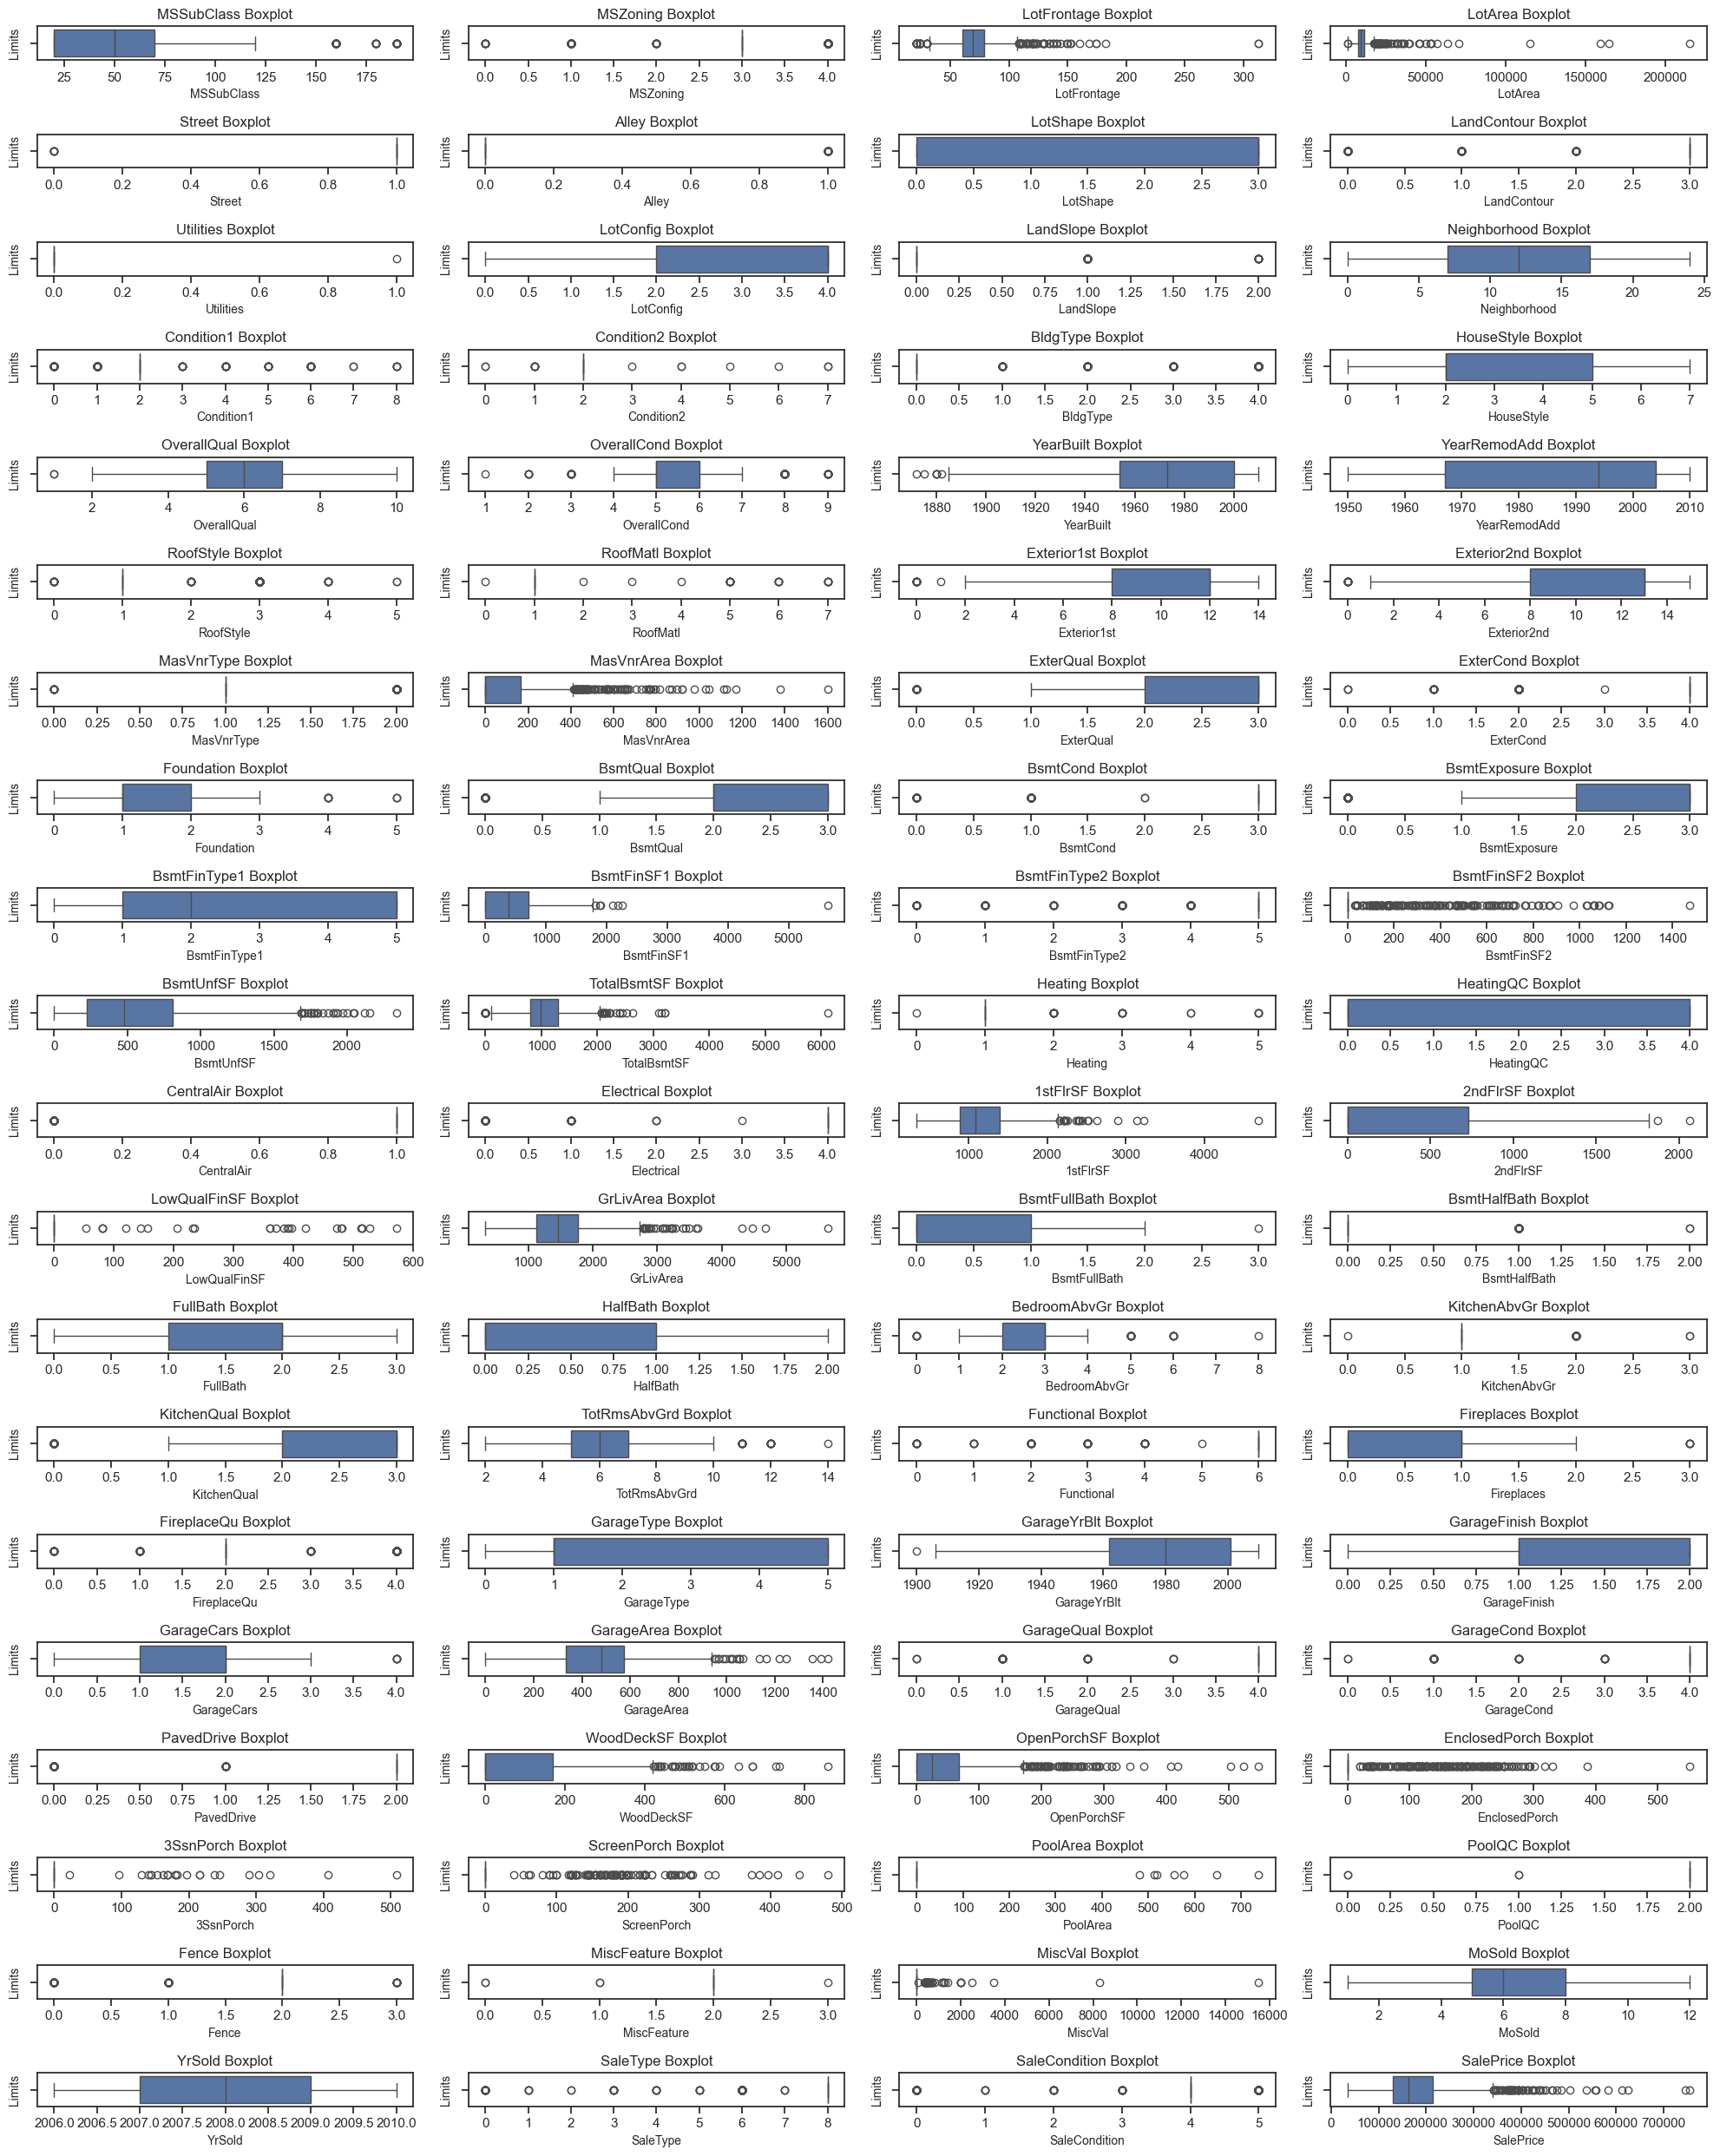

In [67]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in data.columns:
    if plotnumber <= 80:
        plt.subplot(20, 4, plotnumber)
        sns.boxplot(x = data[column])
        
        plt.title(f'{column} Boxplot')
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Limits', fontsize = 10)
        plotnumber += 1
        
plt.tight_layout()

#### we can`t see clearly the above boxplot lets plot the box plot in sequence :

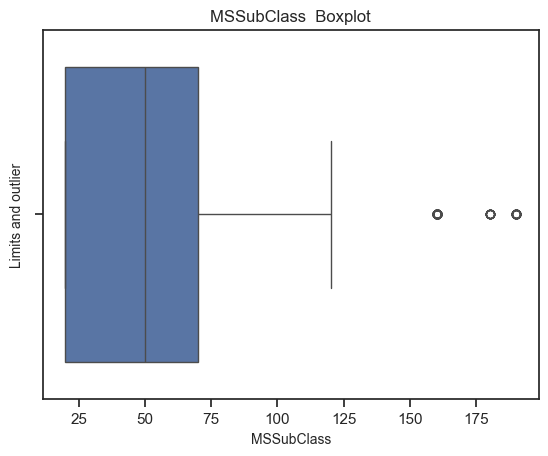

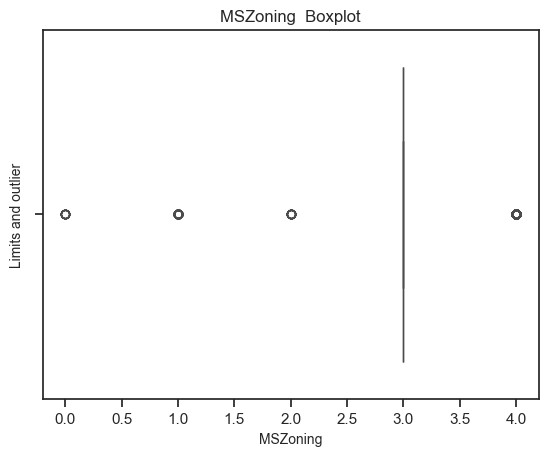

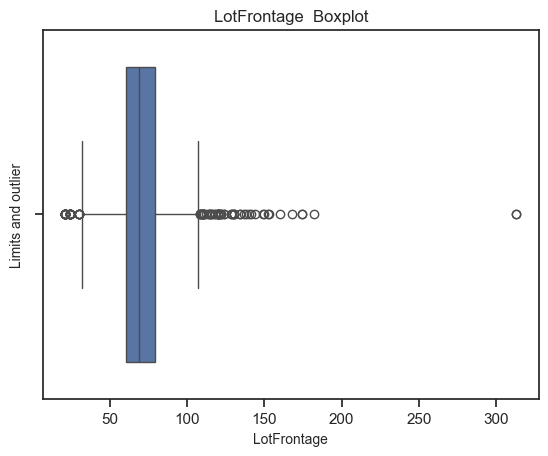

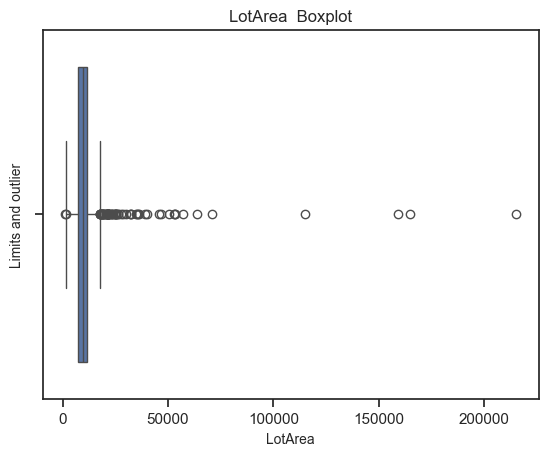

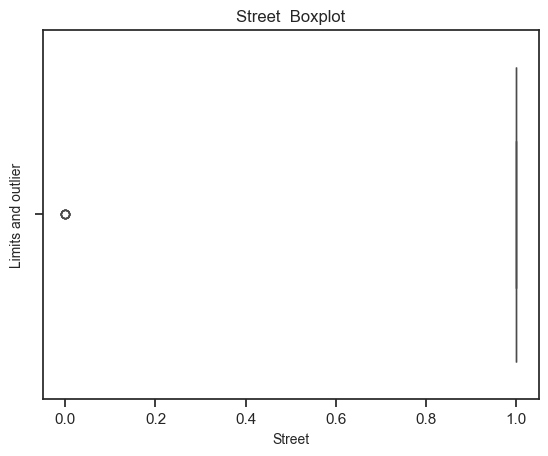

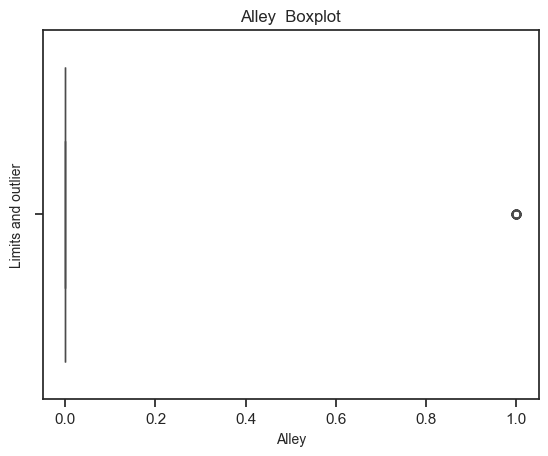

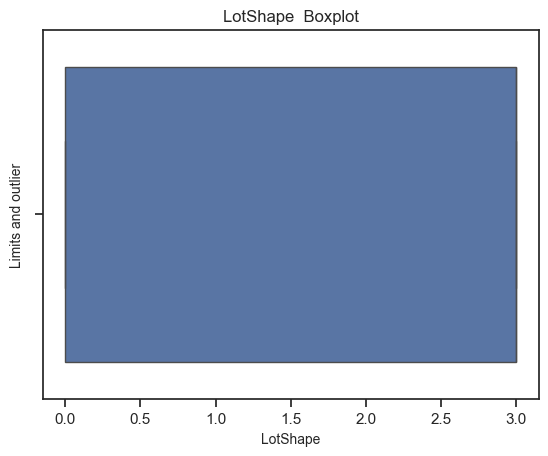

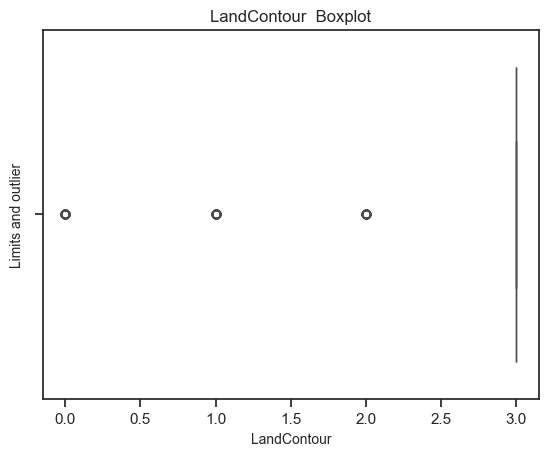

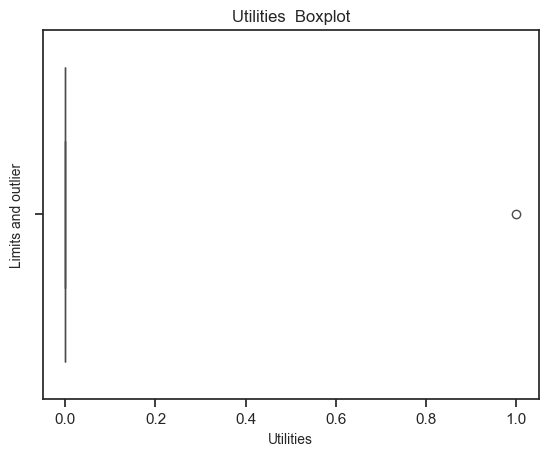

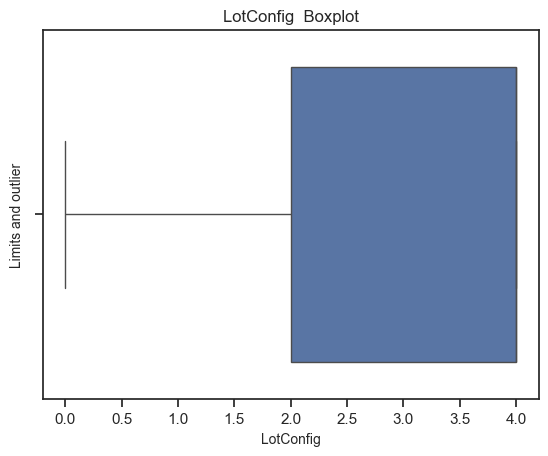

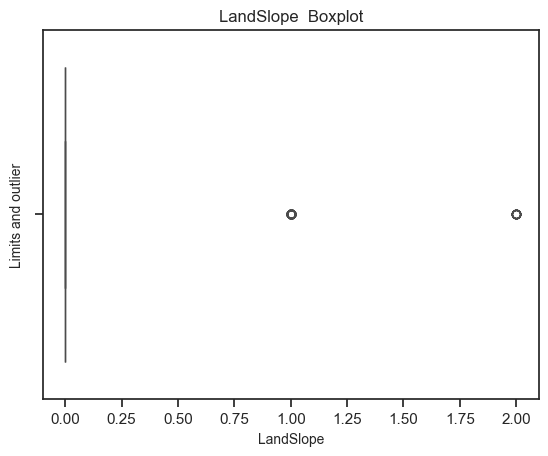

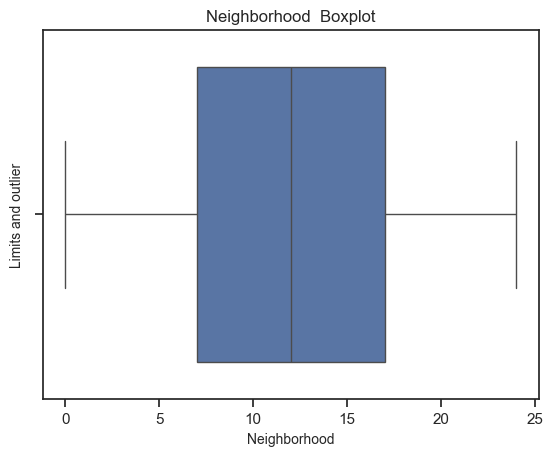

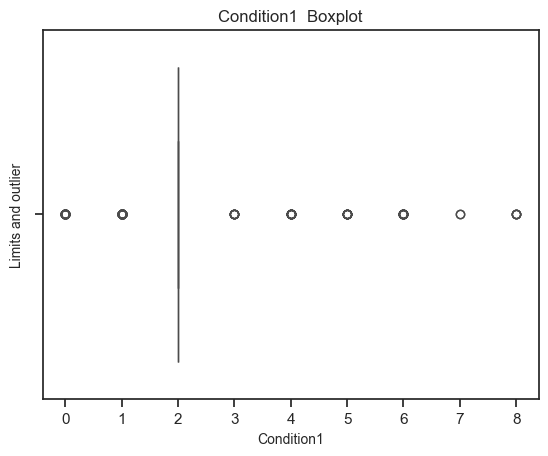

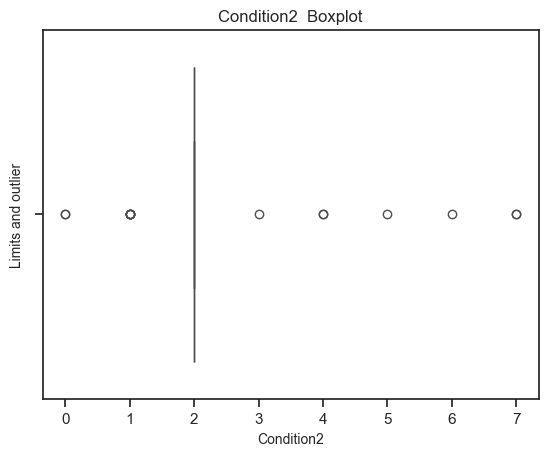

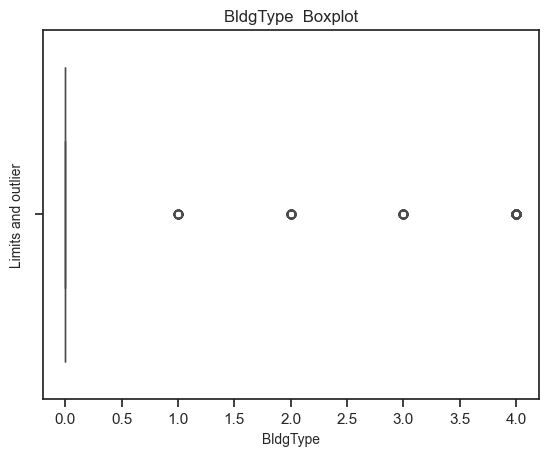

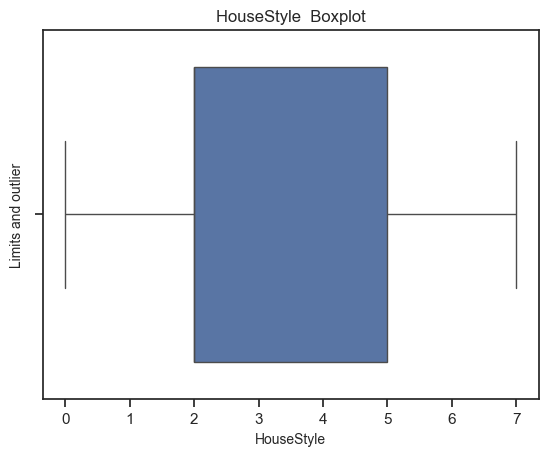

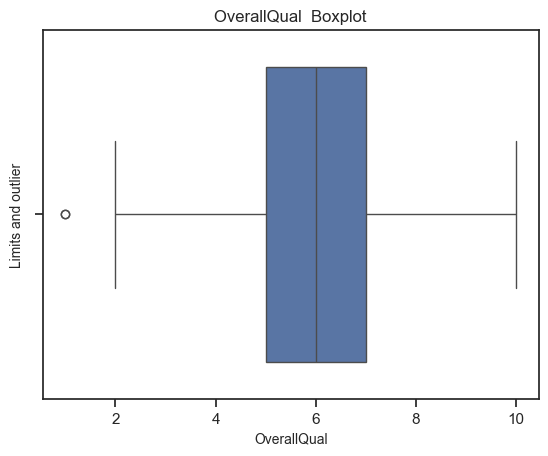

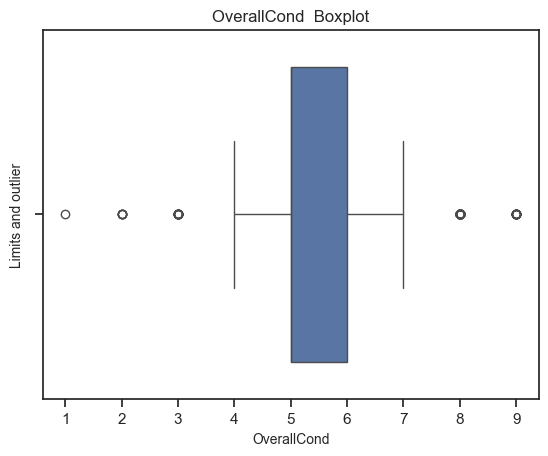

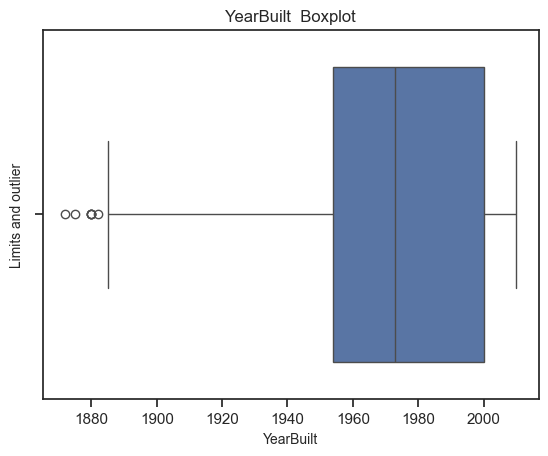

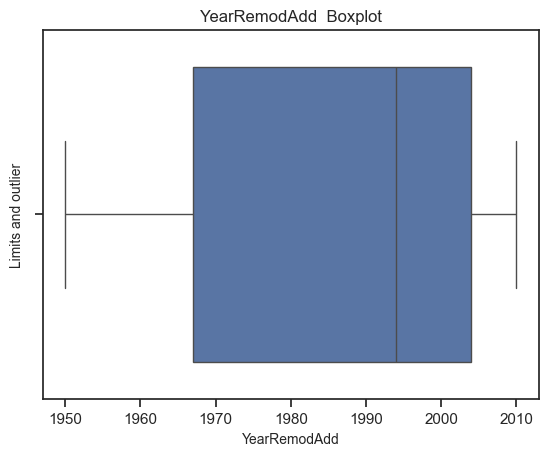

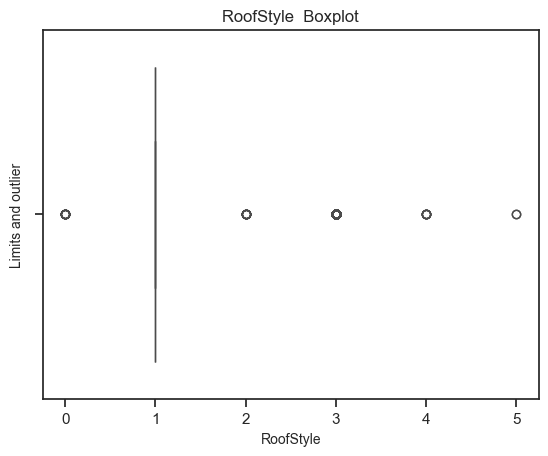

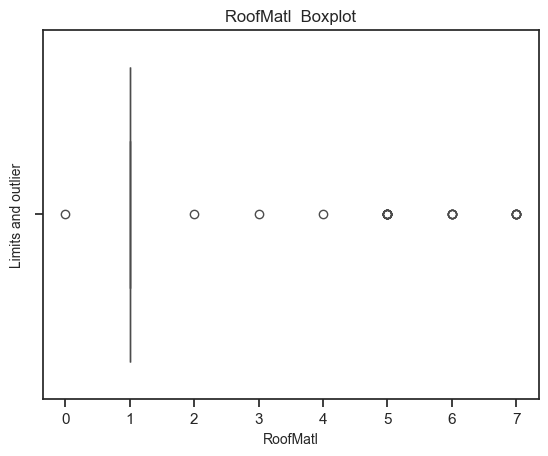

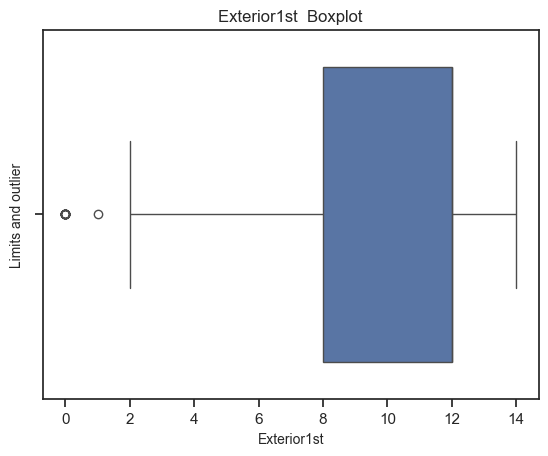

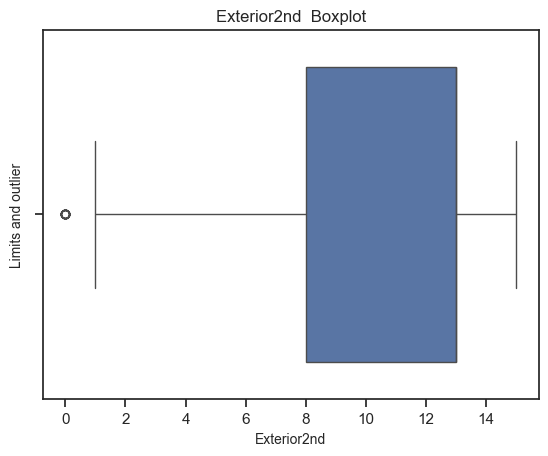

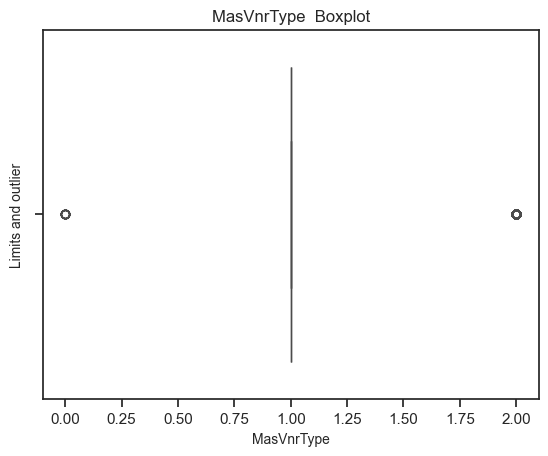

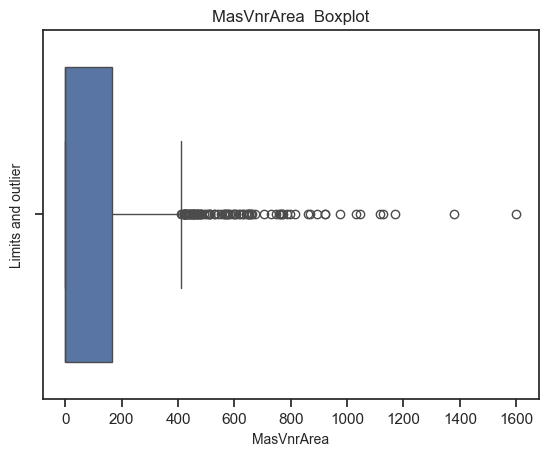

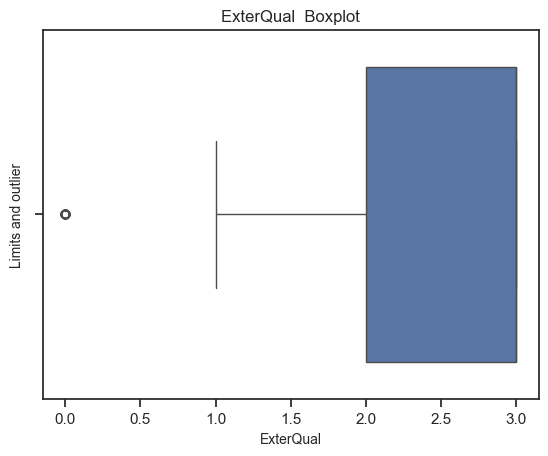

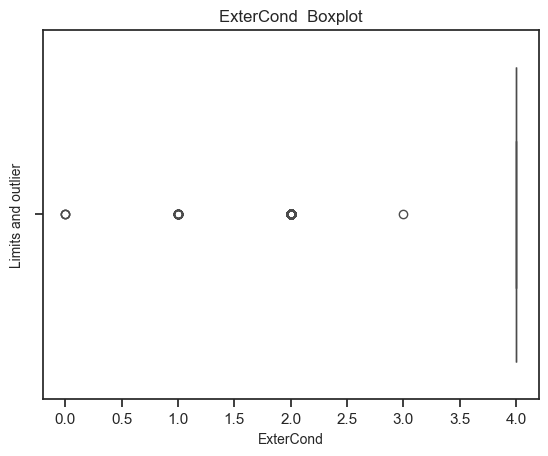

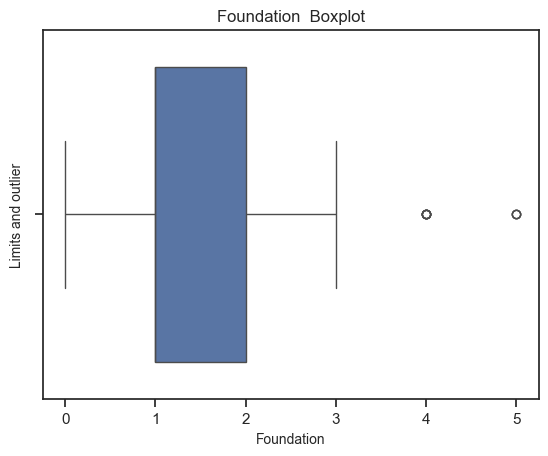

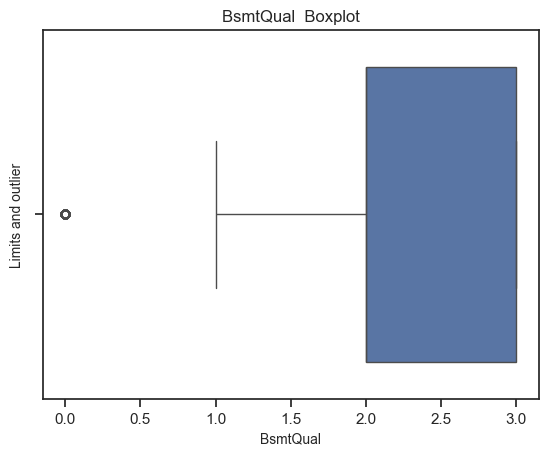

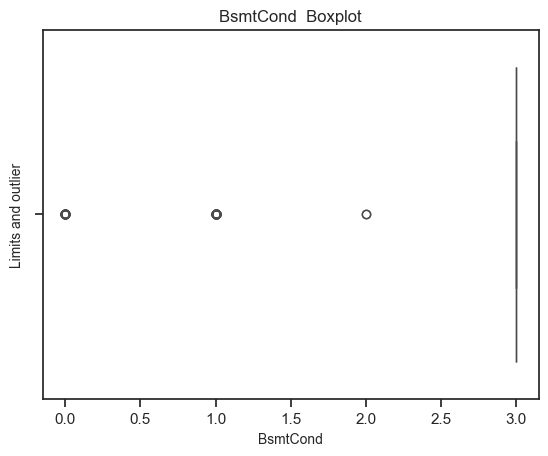

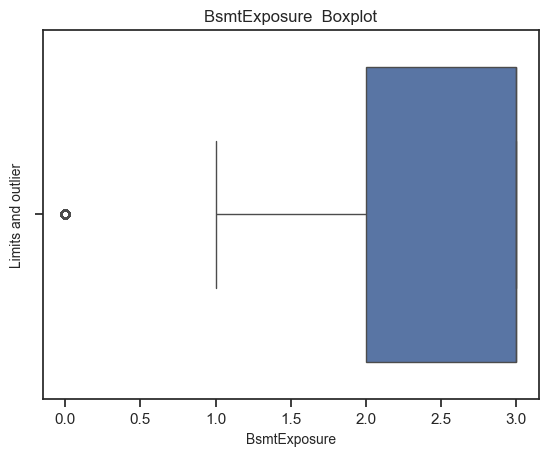

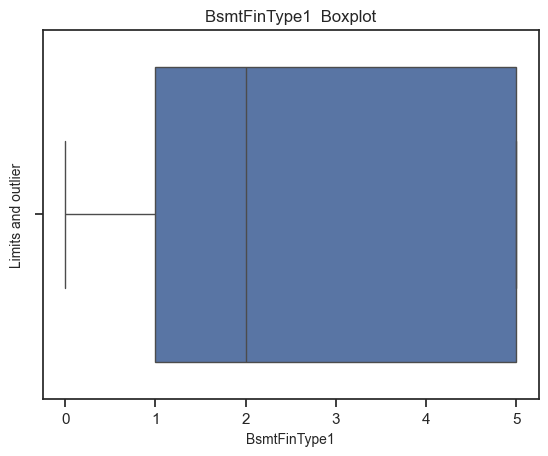

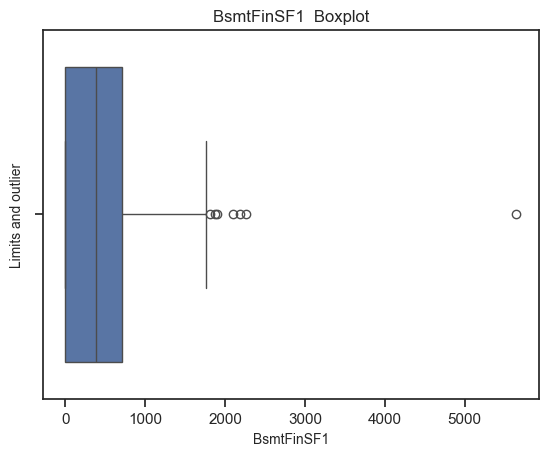

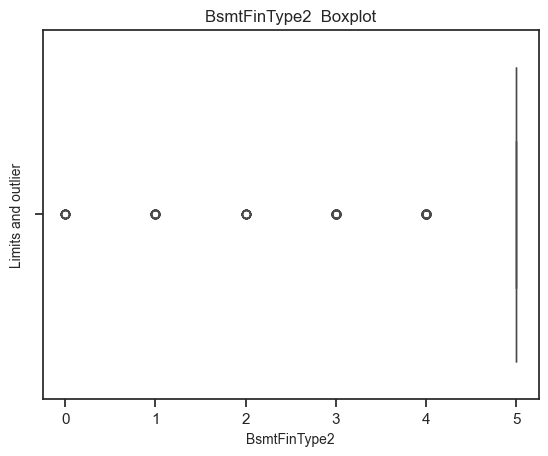

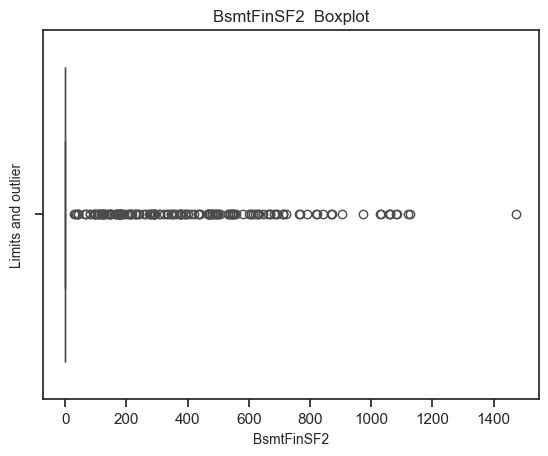

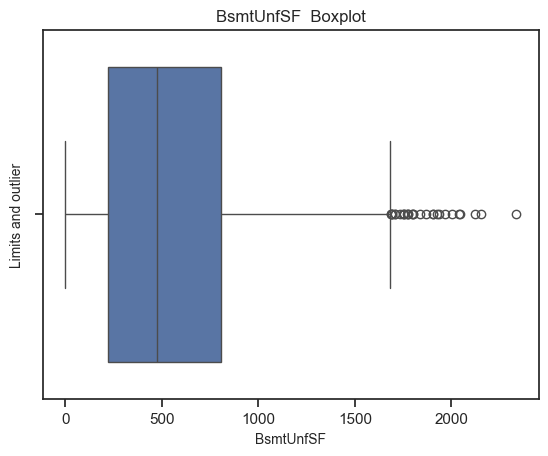

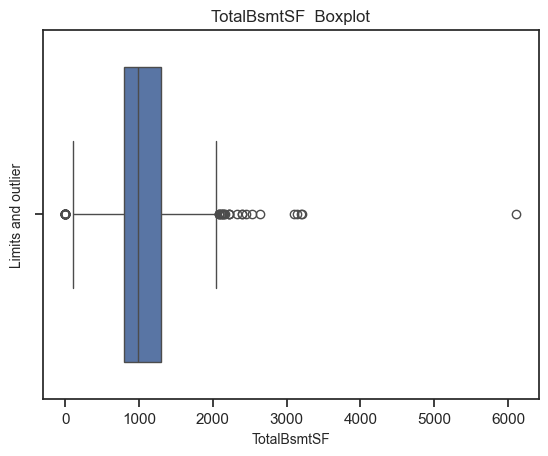

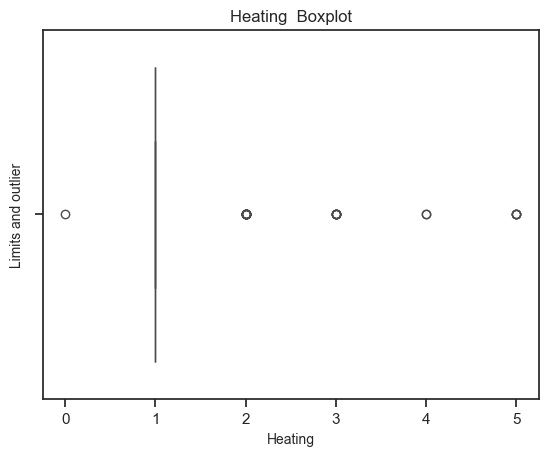

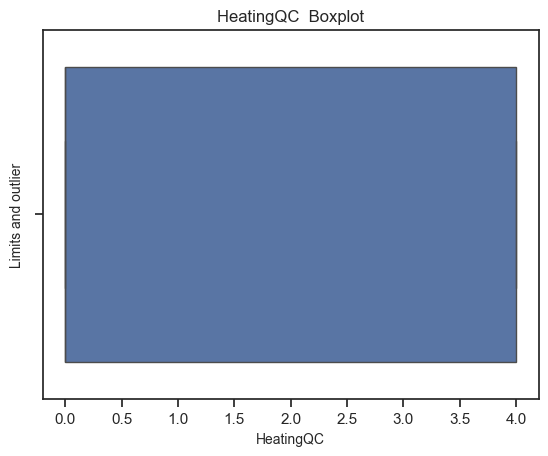

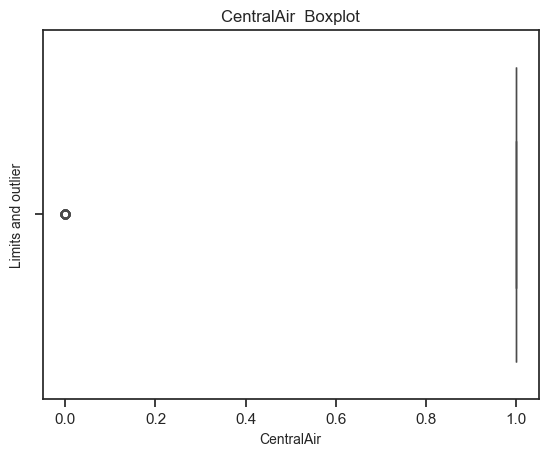

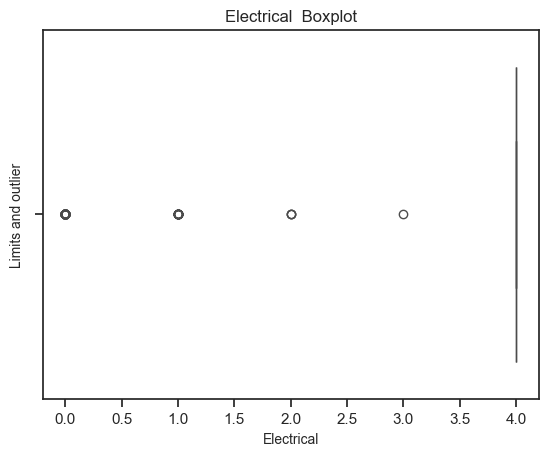

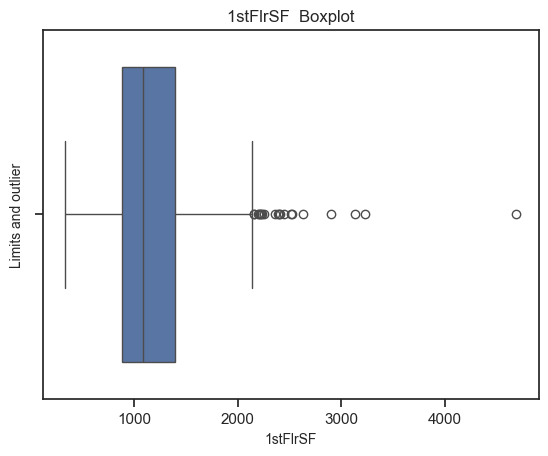

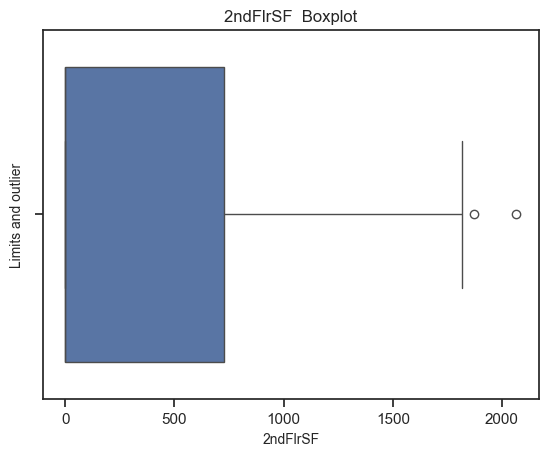

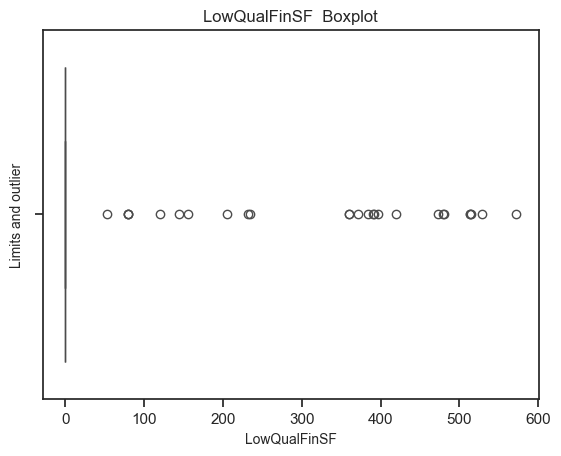

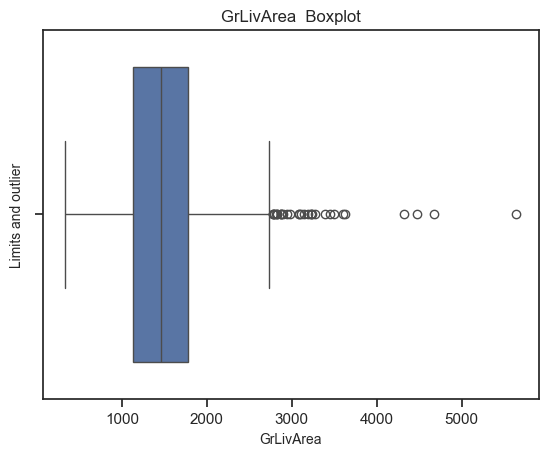

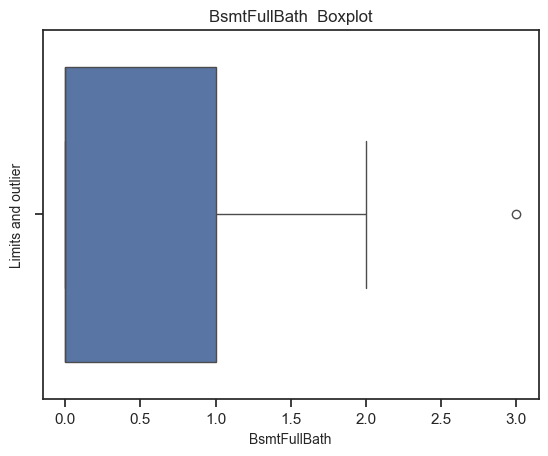

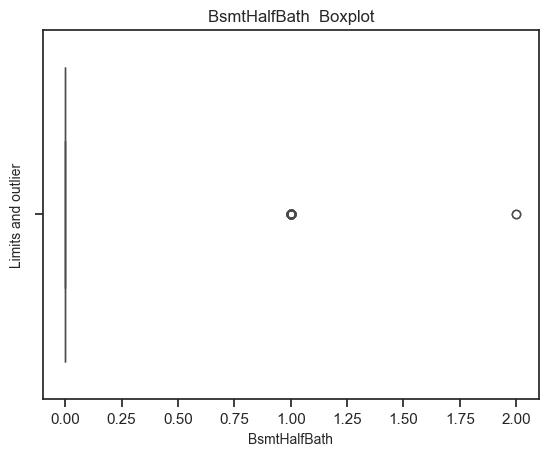

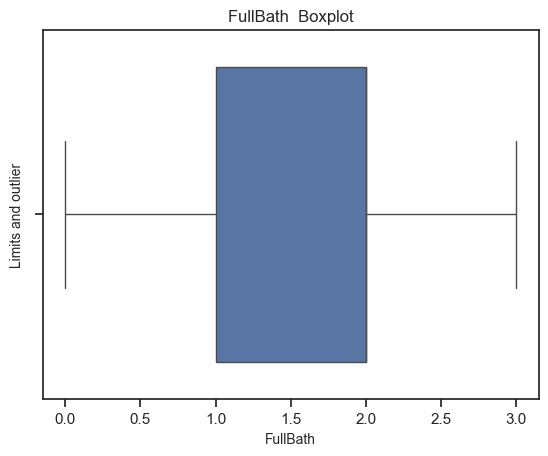

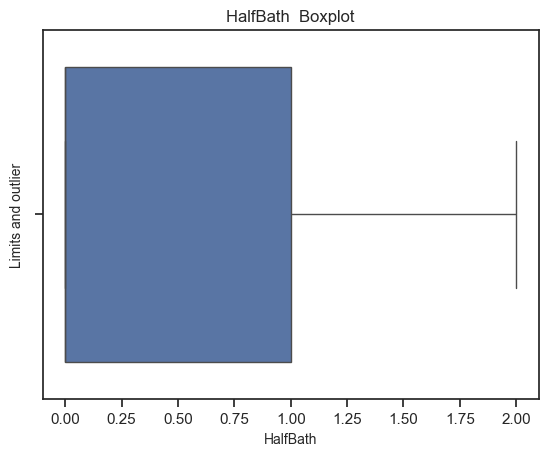

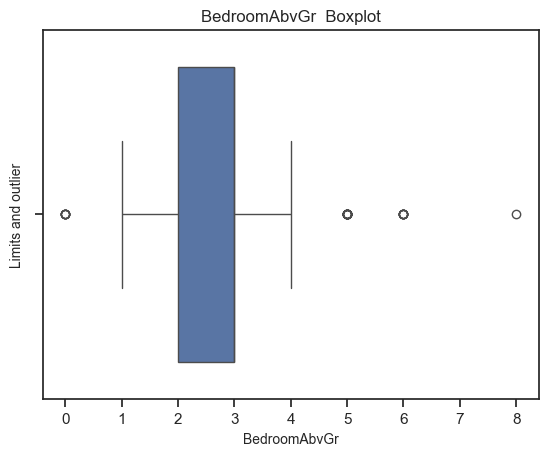

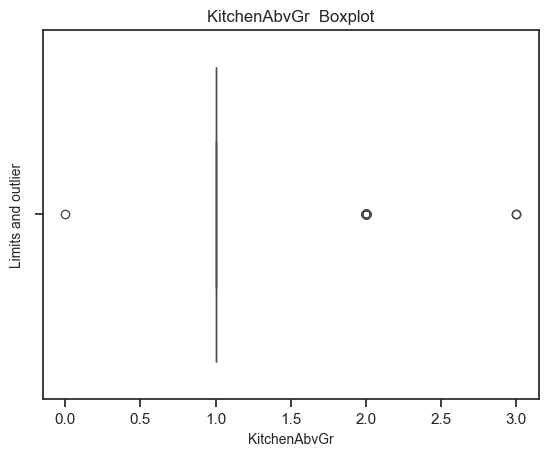

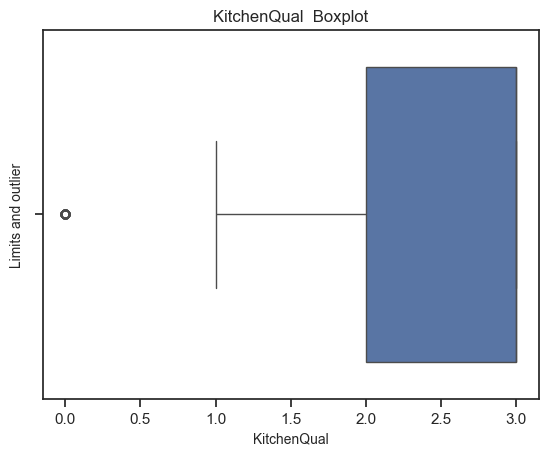

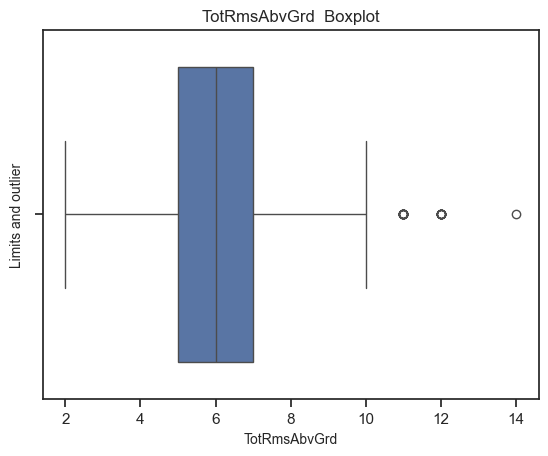

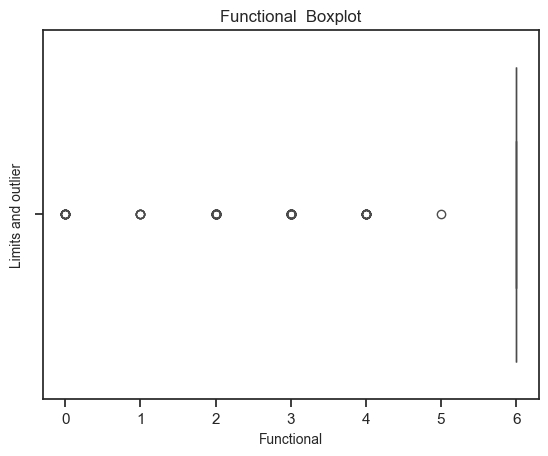

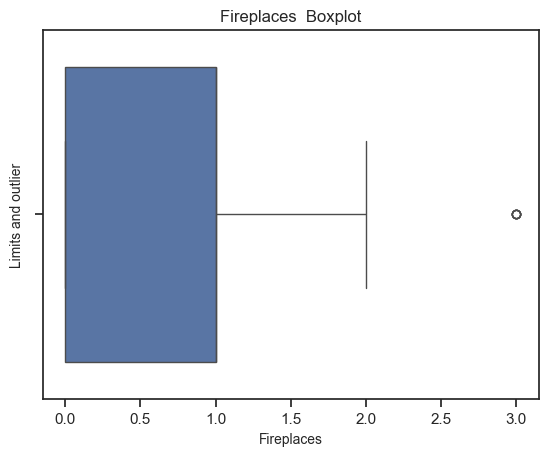

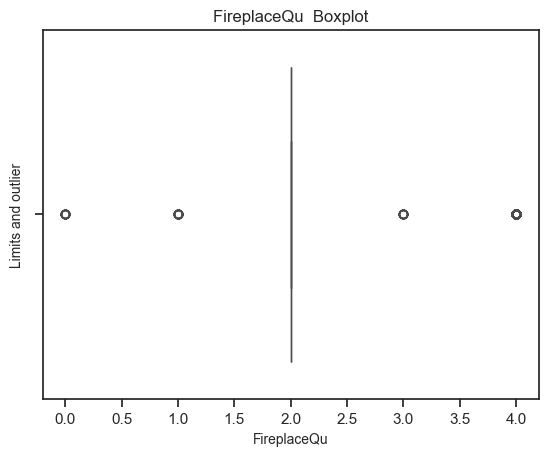

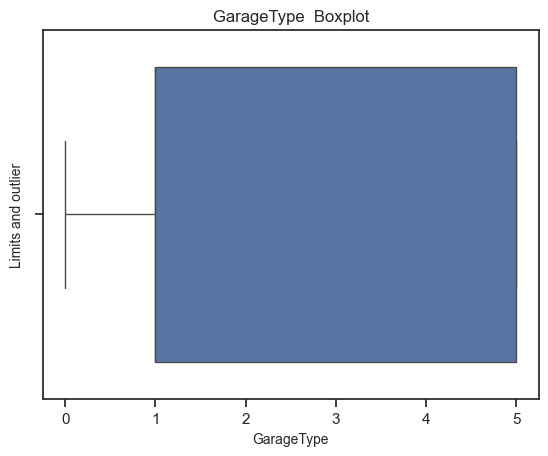

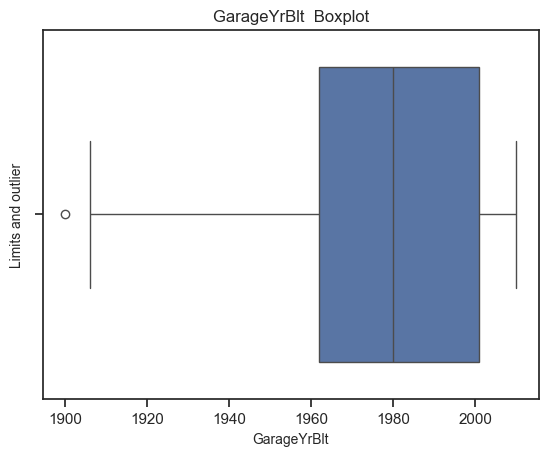

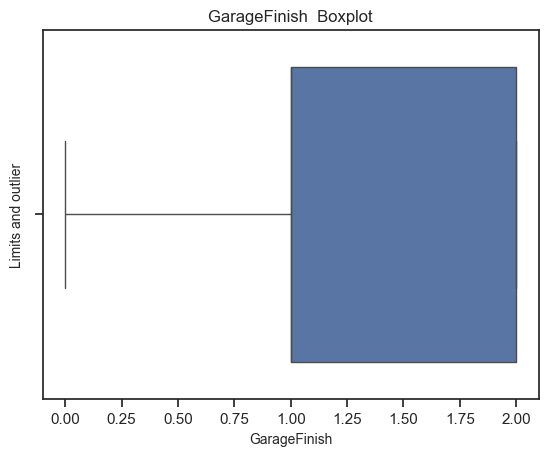

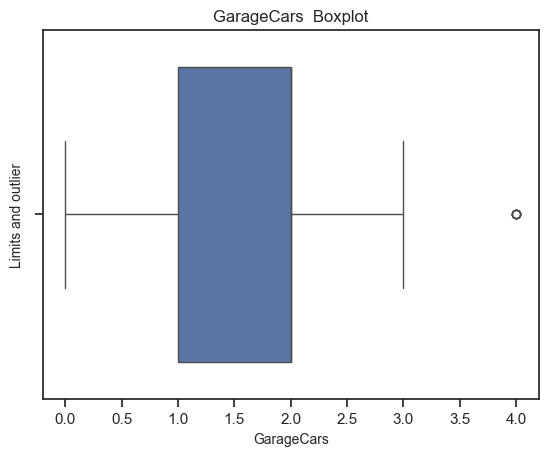

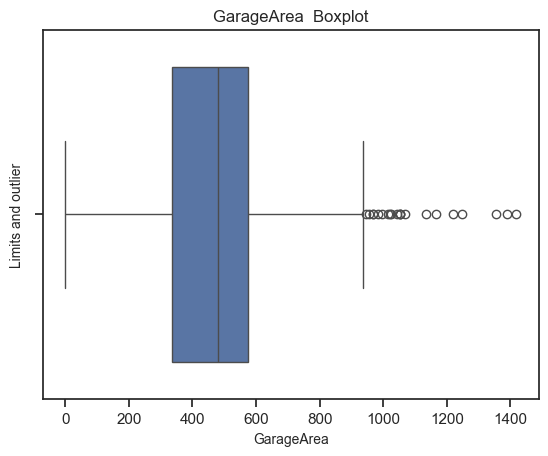

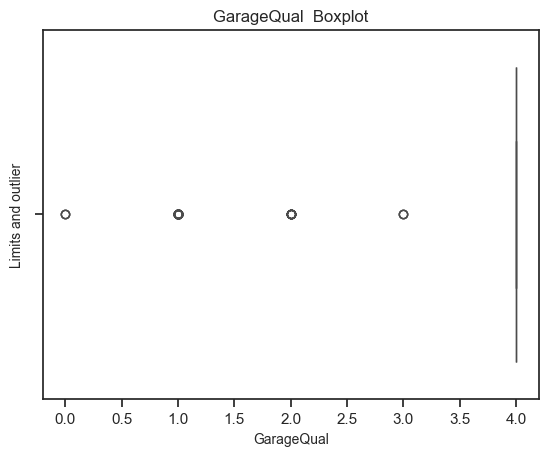

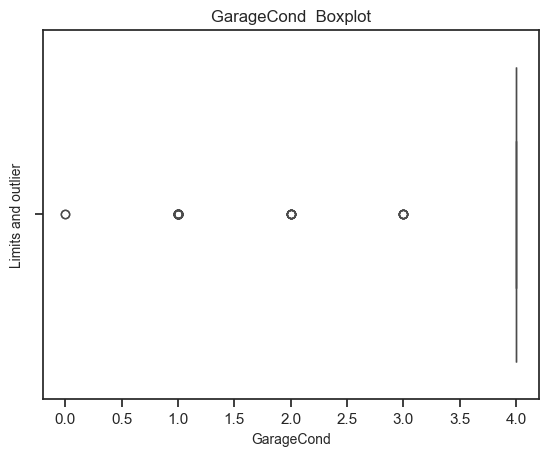

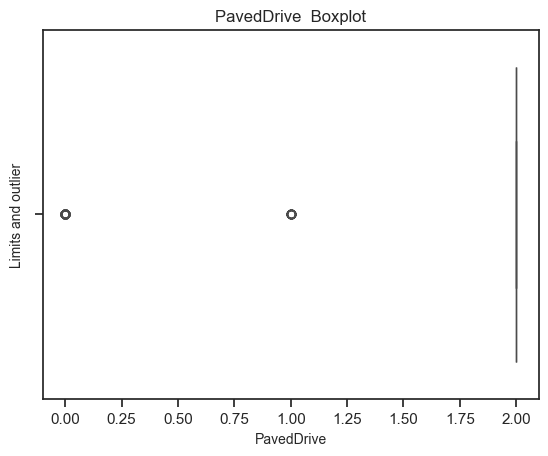

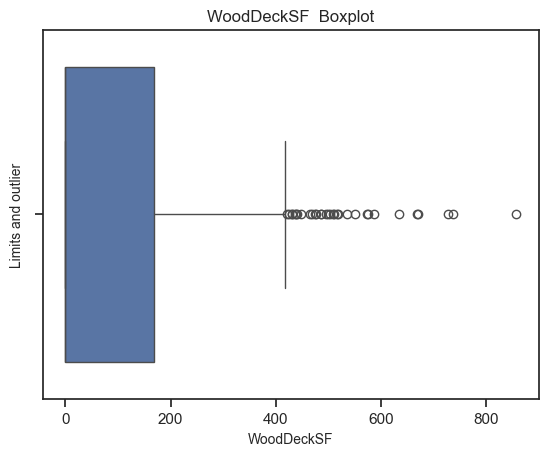

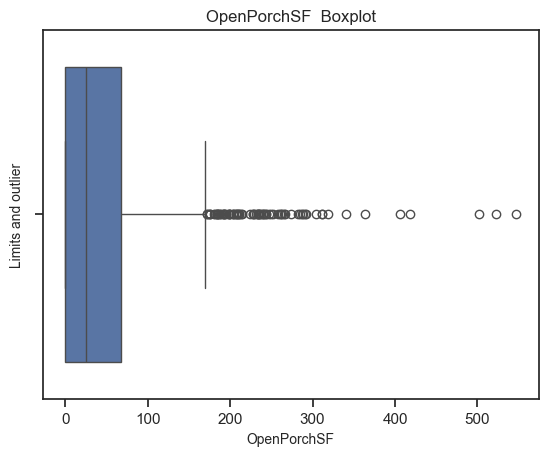

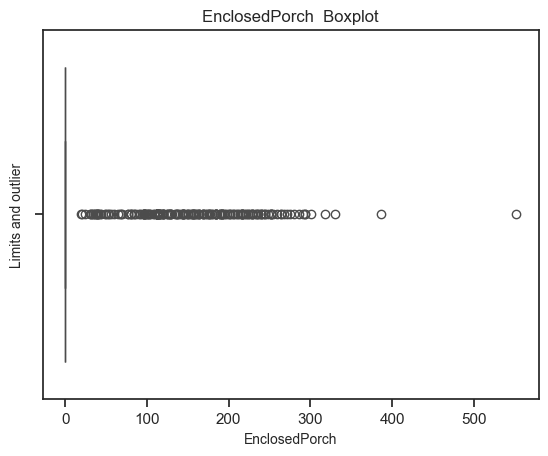

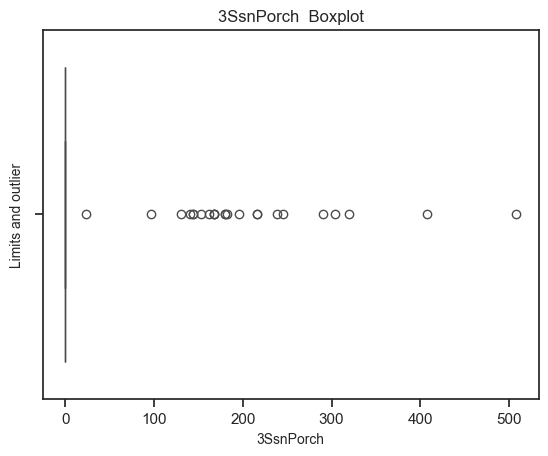

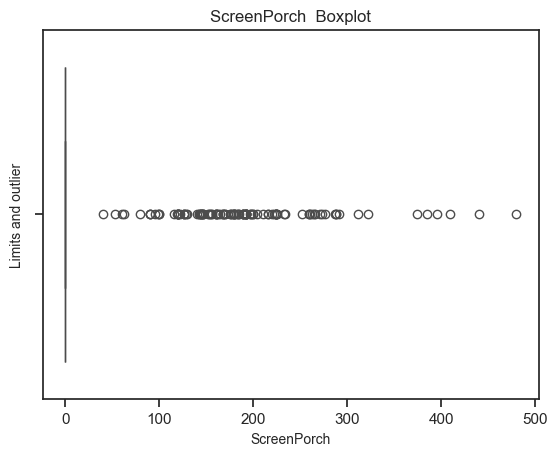

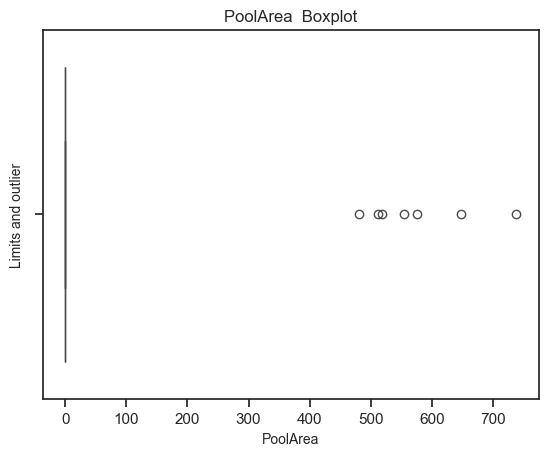

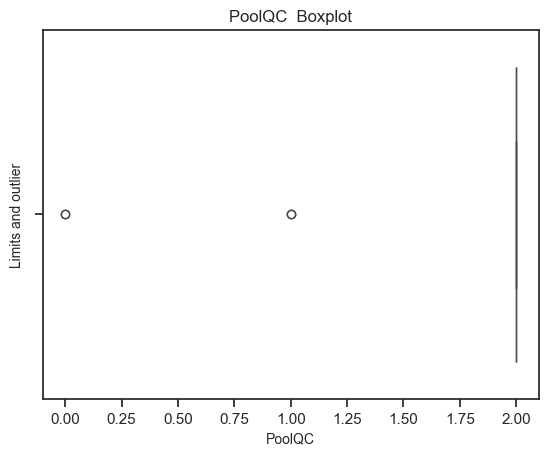

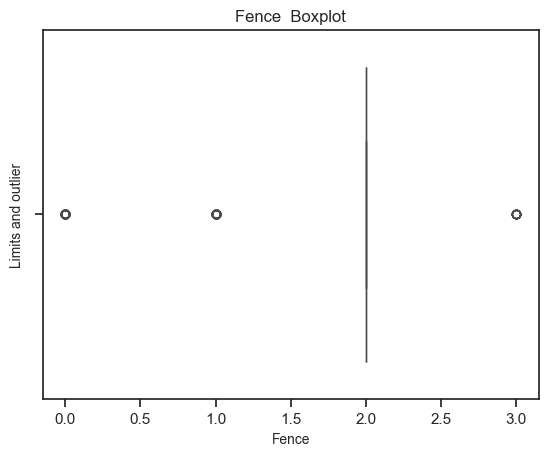

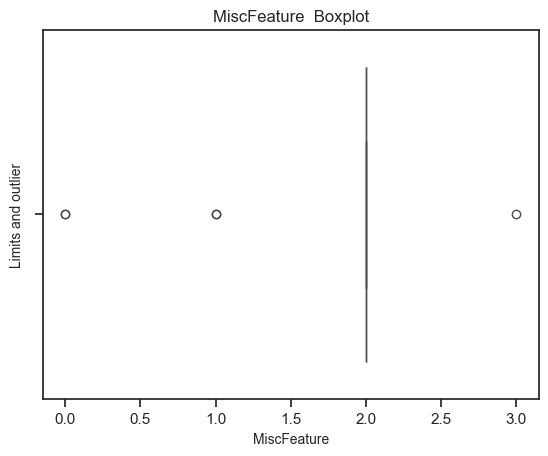

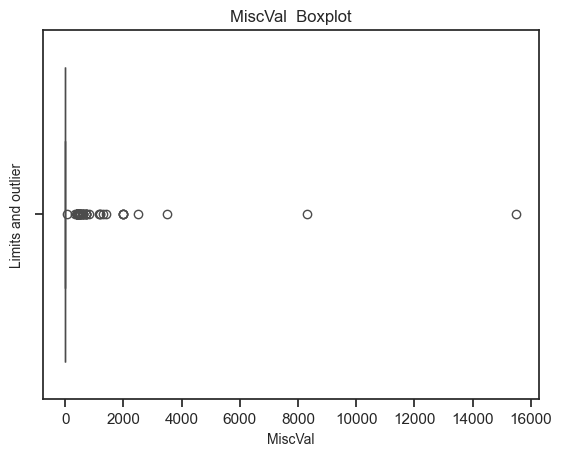

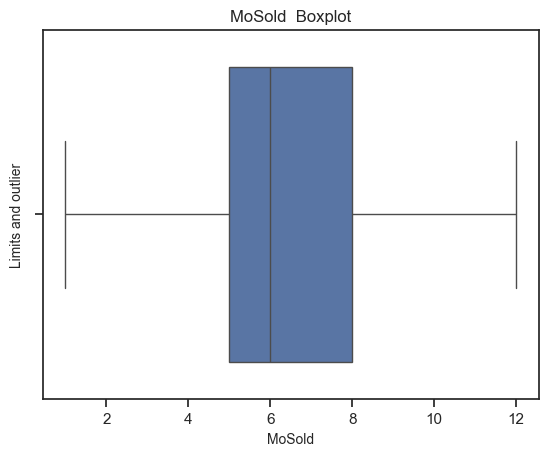

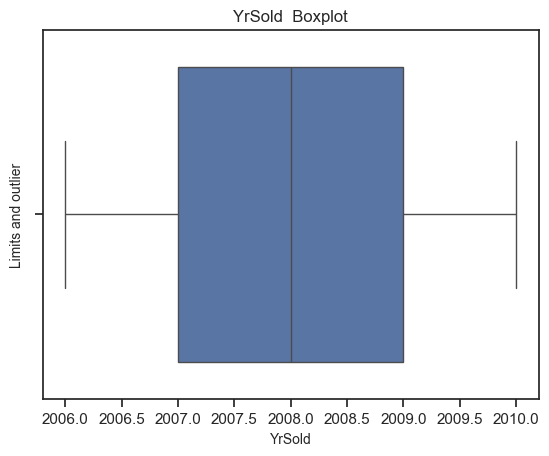

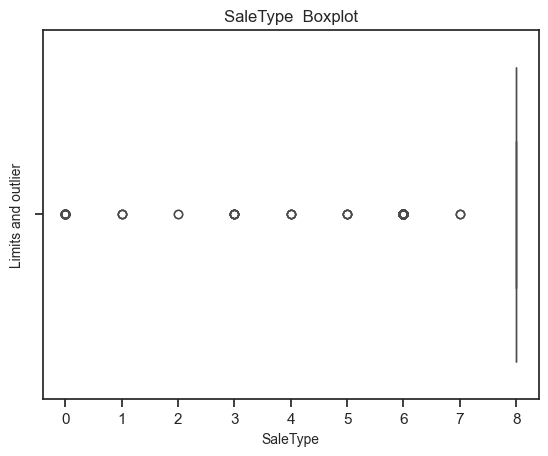

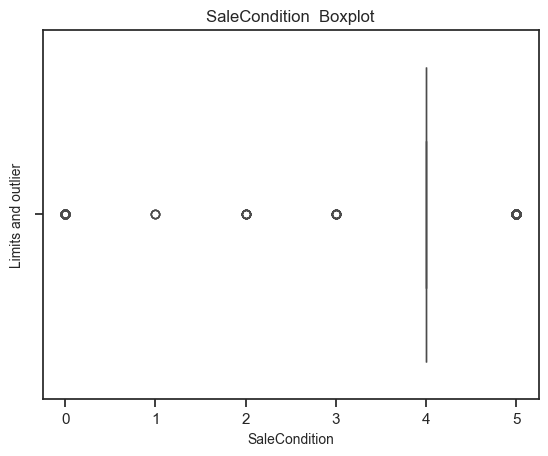

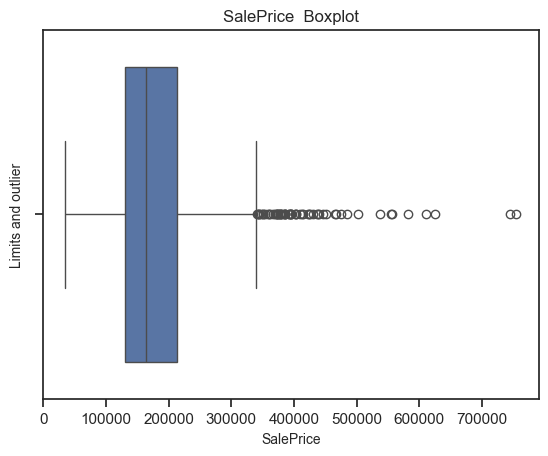

In [68]:
for column in data.columns:
    sns.boxplot(x = data[column])
    plt.title(f'{column}  Boxplot')
    plt.xlabel(column, fontsize = 10)
    plt.ylabel('Limits and outlier', fontsize = 10)
    plt.show()

Lets create a dictionary which will contain all information about above boxplot

In [69]:
# boxplot_info is  diction which will store info about boxplot
boxplot_info = {}

for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
#     Limts of boxplots
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    
#     storing info in dictionary
    boxplot_info[column] = {
        'Min Limit' :min_limit,
        'Max Limit' :max_limit,
        'IQR' :IQR
    }
    
for column, info in boxplot_info.items():
    print(f"coumn : {column}")
    print(f"Min Limit : {info['Min Limit']}")
    print(f"Max Limit : {info['Max Limit']}")
    print(f"IQR : {info['IQR']}")
    print()

coumn : MSSubClass
Min Limit : -55.0
Max Limit : 145.0
IQR : 50.0

coumn : MSZoning
Min Limit : 3.0
Max Limit : 3.0
IQR : 0.0

coumn : LotFrontage
Min Limit : 31.5
Max Limit : 107.5
IQR : 19.0

coumn : LotArea
Min Limit : 1481.5
Max Limit : 17673.5
IQR : 4048.0

coumn : Street
Min Limit : 1.0
Max Limit : 1.0
IQR : 0.0

coumn : Alley
Min Limit : 0.0
Max Limit : 0.0
IQR : 0.0

coumn : LotShape
Min Limit : -4.5
Max Limit : 7.5
IQR : 3.0

coumn : LandContour
Min Limit : 3.0
Max Limit : 3.0
IQR : 0.0

coumn : Utilities
Min Limit : 0.0
Max Limit : 0.0
IQR : 0.0

coumn : LotConfig
Min Limit : -1.0
Max Limit : 7.0
IQR : 2.0

coumn : LandSlope
Min Limit : 0.0
Max Limit : 0.0
IQR : 0.0

coumn : Neighborhood
Min Limit : -8.0
Max Limit : 32.0
IQR : 10.0

coumn : Condition1
Min Limit : 2.0
Max Limit : 2.0
IQR : 0.0

coumn : Condition2
Min Limit : 2.0
Max Limit : 2.0
IQR : 0.0

coumn : BldgType
Min Limit : 0.0
Max Limit : 0.0
IQR : 0.0

coumn : HouseStyle
Min Limit : -2.5
Max Limit : 9.5
IQR : 3.0



In [70]:
continous_data =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [74]:
Q1= data[continous_data].quantile(0.25)
Q3 = data[continous_data].quantile(0.75)
IQR = Q3- Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR
# Replace outliers with the median for the specified continuous feature
data[continous_data] = np.where ((data[continous_data] < min_limit) | (data[continous_data] > max_limit),
                              data[continous_data].median(), data[continous_data])
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3         65.0   8450.0       1      0         3   
1        20.0         3         80.0   9600.0       1      0         3   
2        60.0         3         68.0  11250.0       1      0         0   
3        70.0         3         60.0   9550.0       1      0         0   
4        60.0         3         84.0  14260.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0     2003.0   
1           2         0           2          6.0          5.0     1976.0   
2           2         0           5          7.0          5.0     2001.0   
3           2         0           5          7.0          5.0     1915.0   
4           2         0           5          8.0          5.0     2000.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        2003.0          1         1           12           13           1   
1        1976.0          1         1            8            8           1   
2        2002.0          1         1           12           13           1   
3        1970.0          1         1           13           15           1   
4        2000.0          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4         0.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   
3      540.0        756.0        1          2           1           4   
4      490.0       1145.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           0.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0           1.0            2           8.0   
1       2.0       0.0           3.0           1.0            3           6.0   
2       2.0       1.0           3.0           1.0            2           6.0   
3       1.0       0.0           3.0           1.0            2           7.0   
4      

###### Outlier handling in categorical data:

In [75]:
discrete_data = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
            'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
            'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
            'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [76]:
Q1 = data[discrete_data].quantile(0.25)
Q3 = data[discrete_data].quantile(0.75)
IQR =Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Replace values outside the range with the mode of the column
data[discrete_data] = np.where((data[discrete_data] < min_limit) | (data[discrete_data]> max_limit),
                            data[discrete_data].mode().iloc[0], data[discrete_data])


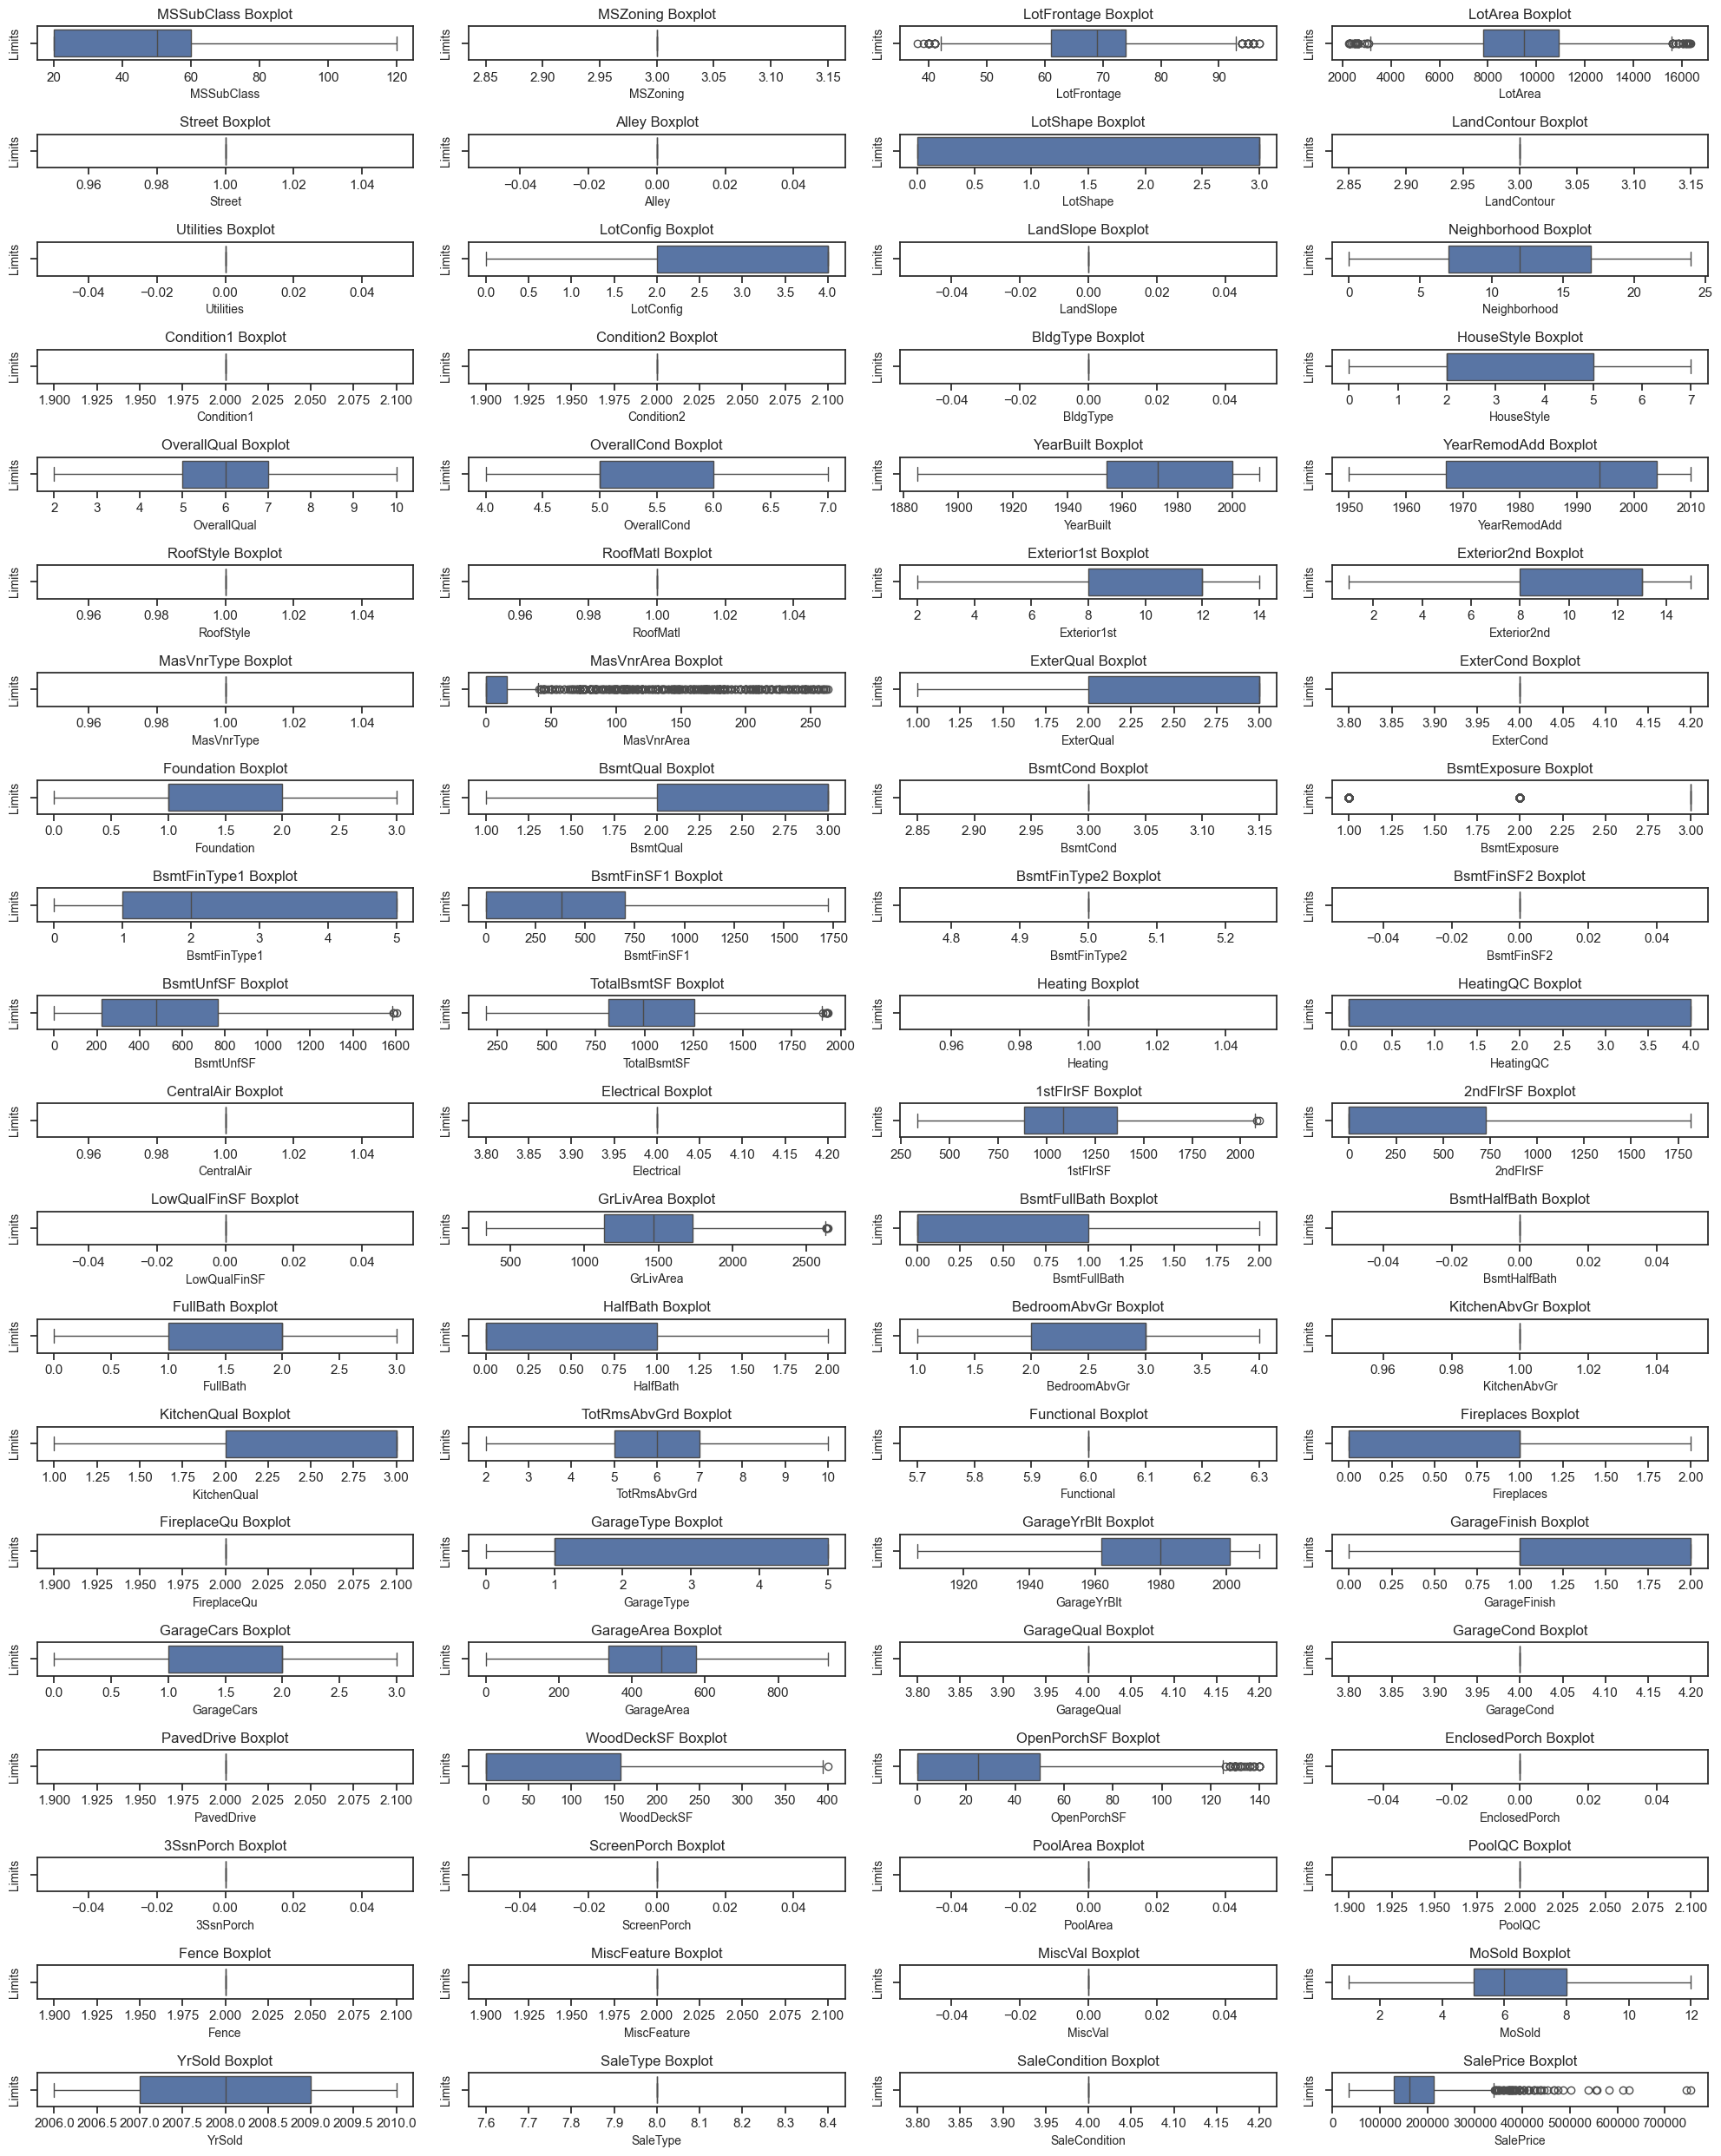

In [78]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in data.columns:
    if plotnumber <= 80:
        plt.subplot(20, 4, plotnumber)
        sns.boxplot(x = data[column])
        
        plt.title(f'{column} Boxplot')
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Limits', fontsize = 10)
        plotnumber += 1
        
plt.tight_layout()

# Feature_Engineering

Definition:
Feature engineering involves transforming or creating new features from raw data to enhance machine learning model performance.

Simplification:
Simplify complex relationships in the data, making it easier for models to understand.

Improved Model Performance:
Enhance model accuracy and predictive power by providing more relevant and informative input features.


Addressing Non-Linearity:
Capture non-linear relationships between features and the target variable, enabling models to learn more complex patterns.

Handling Missing Data:
Fill or transform missing values in a meaningful way to prevent information loss during model training.

Dimensionality Reduction:
Reduce the number of features, especially in high-dimensional datasets, to avoid overfitting and speed up model training.

Creating Composite Features:
Generate new features by combining or interacting existing ones, providing additional information to the model.

Temporal and Spatial Insights:
Incorporate time or spatial components to reveal trends, patterns, or seasonality in the data.

Enhanced Interpretability:
Make models more interpretable by transforming features into more understandable or representative formats.

Optimizing Model Resources:
Save computational resources by excluding irrelevant or redundant features, making models more efficient.

In [80]:
data.head(3)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3         65.0   8450.0       1      0         3   
1        20.0         3         80.0   9600.0       1      0         3   
2        60.0         3         68.0  11250.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           2   
2            3          0          4          0             5           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0     2003.0   
1           2         0           2          6.0          5.0     1976.0   
2           2         0           5          7.0          5.0     2001.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        2003.0          1         1           12           13           1   
1        1976.0          1         1            8            8           1   
2        2002.0          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           0.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0           1.0            2           8.0   
1       2.0       0.0           3.0           1.0            3           6.0   
2       2.0       1.0           3.0           1.0            2           6.0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           6         0.0            2           1       2003.0             1   
1           6         1.0            2           1       1976.0             1   
2           6         1.0            2           1       2001.0             1   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0       548.0           4           4           2         0.0   
1         2.0       460.0           4           4           2       298.0   
2         2.0       608.0           4           4           2         0.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0         61.0            0.0        0.0          0.0       0.0       2   
1          0.0            0.0        0.0          0.0       0.0       2   
2         42.0            0.0        0.0          0.0       0.0       2   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0      2            2      0.0     2.0  2008.0         8              4   
1      2            2      0.0     5.0  2007.0         8              4   
2      2            2      0.0     9.0  2008.0         8              4   

   SalePrice  Remodeld  
0     208500         

##### Age of House at Sale time

In [81]:
data['Age_at_sale'] = data['YrSold'] - data['YearBuilt']

In [82]:
# Retain both 'YrSold' and 'YearBuilt' for context and potential further analysis.
data.head(3)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3         65.0   8450.0       1      0         3   
1        20.0         3         80.0   9600.0       1      0         3   
2        60.0         3         68.0  11250.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           2   
2            3          0          4          0             5           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0     2003.0   
1           2         0           2          6.0          5.0     1976.0   
2           2         0           5          7.0          5.0     2001.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        2003.0          1         1           12           13           1   
1        1976.0          1         1            8            8           1   
2        2002.0          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           0.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0           1.0            2           8.0   
1       2.0       0.0           3.0           1.0            3           6.0   
2       2.0       1.0           3.0           1.0            2           6.0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           6         0.0            2           1       2003.0             1   
1           6         1.0            2           1       1976.0             1   
2           6         1.0            2           1       2001.0             1   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0       548.0           4           4           2         0.0   
1         2.0       460.0           4           4           2       298.0   
2         2.0       608.0           4           4           2         0.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0         61.0            0.0        0.0          0.0       0.0       2   
1          0.0            0.0        0.0          0.0       0.0       2   
2         42.0            0.0        0.0          0.0       0.0       2   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0      2            2      0.0     2.0  2008.0         8              4   
1      2            2      0.0     5.0  2007.0         8              4   
2      2            2      0.0     9.0  2008.0         8              4   

   SalePrice  Remodeld  Age_at_sale  
0     20

<Axes: xlabel='Age_at_sale', ylabel='SalePrice'>

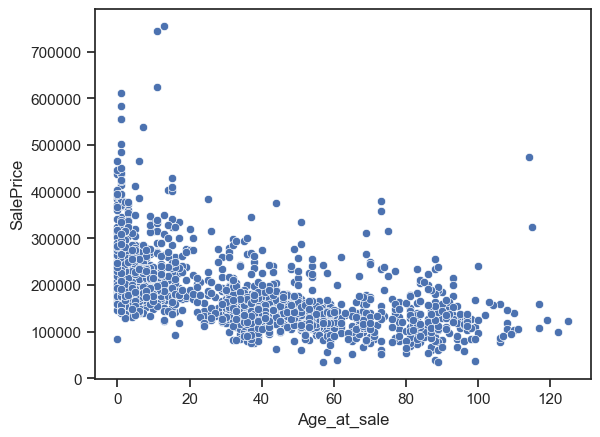

In [83]:
sns.scatterplot(x = data.Age_at_sale, y = data.SalePrice)

The code creates a new binary column 'Remodeled' in the DataFrame df, where the value is 1 if the house has been 
remodeled (if 'YearBuilt' is different from 'YearRemodAdd'), and 0 otherwise

Finding whether a house has been remodeled is essential as it provides insights into property history and 
condition, impacting sale price by influencing perceived value and desirability.

In [84]:
data['Remodeld'] = (data['YearBuilt'] != data['YearRemodAdd']).astype(int)

<Axes: xlabel='Remodeld', ylabel='SalePrice'>

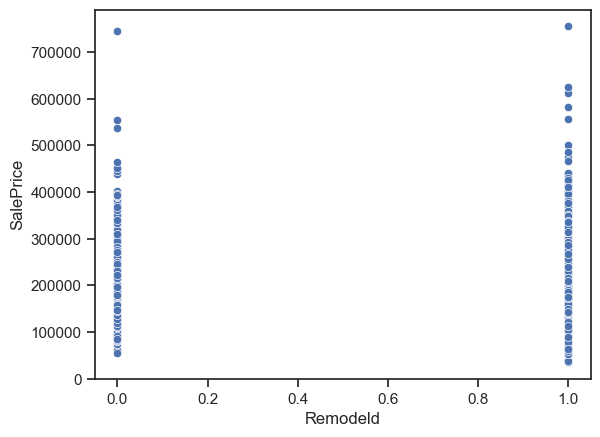

In [87]:
sns.scatterplot(x = data.Remodeld, y = data.SalePrice)

##### Total square footage:

Finding the total square footage combines the areas of the first and second floors, providing a comprehensive measure of
living space that influences the property's size and, consequently, its sale price.

In [91]:
data['totalSF'] =data['1stFlrSF'] + data['2ndFlrSF']

<Axes: xlabel='totalSF', ylabel='SalePrice'>

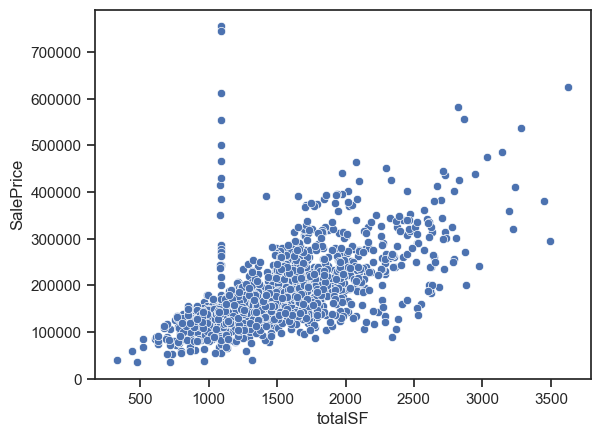

In [92]:
sns.scatterplot(x = data.totalSF, y= data.SalePrice)

#### Outdoor living area:

In [93]:
porch_deck_features = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
data['Outdoor_LA'] = data[porch_deck_features].sum(axis = 1)


# # lets check correlation of above created column
cr = data['Outdoor_LA'].corr(data['SalePrice'])
print(cr)

0.39886876583065917


<Axes: xlabel='Outdoor_LA', ylabel='SalePrice'>

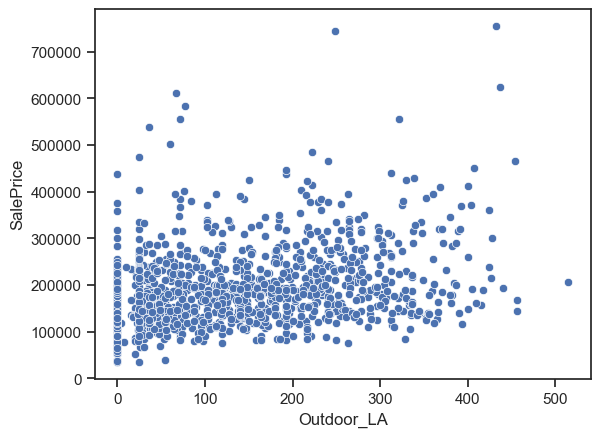

In [94]:
sns.scatterplot(x = data.Outdoor_LA , y= data.SalePrice)

##### Over condition score:

In [95]:
data['quality_condition_score'] = data['OverallQual'] + data['OverallCond']

In [96]:
# lets the corelation of quality_condition_score with target variable 
corr = data['quality_condition_score'].corr(data['SalePrice'])
print('Quality_condition_score correlation with target variable ::',corr)

Quality_condition_score correlation with target variable :: 0.6761730278650565


<Axes: xlabel='quality_condition_score', ylabel='SalePrice'>

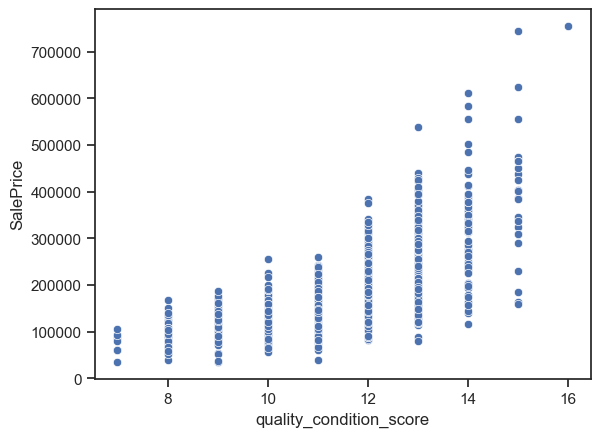

In [97]:
sns.scatterplot(x =data.quality_condition_score, y = data.SalePrice)

In [98]:
cr1 = data['OverallQual'].corr(data['SalePrice'])
print(cr1)

0.7902286272694434


A correlation coefficient of 0.67 is generally considered a strong positive correlation, indicating a substantial relationship between the two variables

##### Total Basement Area:

In [99]:
bsmt_area_feature = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
data['Total_bmt_area'] = data[bsmt_area_feature].sum(axis = 1)

<Axes: xlabel='Total_bmt_area', ylabel='SalePrice'>

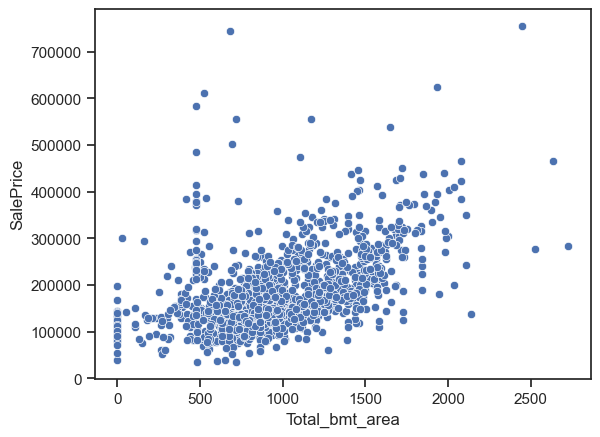

In [100]:
sns.scatterplot( x =data.Total_bmt_area, y= data.SalePrice )

### Created_feature:

In [101]:
created_feature = data[['Age_at_sale','totalSF','Outdoor_LA','quality_condition_score','Total_bmt_area','Remodeld']]

In [102]:
created_feature.head()

Age_at_sale  totalSF  Outdoor_LA  quality_condition_score  Total_bmt_area  \
0          5.0   1710.0        61.0                     12.0           856.0   
1         31.0   1262.0       298.0                     11.0          1262.0   
2          7.0   1786.0        42.0                     12.0           920.0   
3         91.0   1717.0        35.0                     12.0           756.0   
4          8.0   2198.0       276.0                     13.0          1145.0   

   Remodeld  
0         0  
1         0  
2         1  
3         1  
4         0

In [103]:
# plt.figure(figsize = (20, 25), facecolor = 'white')
# plotnumber = 1
# for column in created_feature.columns:
#     if plotnumber <= 7:
#         plt.subplot(4,2, plotnumber)
#         sns.scatterplot(x = created_feature[column], y =df.SalePrice)
        
#         plt.title(f'{column} vs SalePrice')
#         plt.xlabel(column, fontsize = 10)
#         plt.ylabel('SalePrice', fontsize = 10)
#         plotnumber += 1
        
# plt.tight_layout()
# plt.show()

In [104]:
y = data.SalePrice

In [105]:
data2  = pd.concat([created_feature , y], axis = 1)

In [106]:
data2.corr()

Age_at_sale   totalSF  Outdoor_LA  \
Age_at_sale                 1.000000 -0.231043   -0.352403   
totalSF                    -0.231043  1.000000    0.261011   
Outdoor_LA                 -0.352403  0.261011    1.000000   
quality_condition_score    -0.379844  0.445961    0.280629   
Total_bmt_area             -0.338360  0.261875    0.228349   
Remodeld                    0.408964  0.073993   -0.050080   
SalePrice                  -0.533332  0.635802    0.398869   

                         quality_condition_score  Total_bmt_area  Remodeld  \
Age_at_sale                            -0.379844       -0.338360  0.408964   
totalSF                                 0.445961        0.261875  0.073993   
Outdoor_LA                              0.280629        0.228349 -0.050080   
quality_condition_score                 1.000000        0.328870  0.035932   
Total_bmt_area                          0.328870        1.000000 -0.061120   
Remodeld                                0.035932       -0.061120  1.000000   
SalePrice                               0.676173        0.483715 -0.021933   

                         SalePrice  
Age_at_sale              -0.533332  
totalSF                   0.635802  
Outdoor_LA                0.398869  
quality_condition_score   0.676173  
Total_bmt_area            0.483715  
Remodeld                 -0.021933  
SalePrice                 1.000000

### insights:

Age_at_sale and SalePrice: There is a negative correlation (-0.53), indicating that as the age at sale increases, the sale price tends to decrease.

TotalSF and SalePrice: There is a positive correlation (0.64), suggesting that as the total square footage increases, the sale price tends to increase.

TotalBath and SalePrice: Positive correlation (0.62), indicating that houses with more bathrooms tend to have higher sale prices.

Outdoor_LA and SalePrice: Positive correlation (0.41), suggesting that a larger outdoor living area is associated with higher sale prices.

Quality_Condition_Score and SalePrice: Strong positive correlation (0.68), indicating that houses with higher quality and condition scores tend to have higher sale prices.

Total_bmt_area and SalePrice: Positive correlation (0.50), suggesting that a larger basement area is associated with higher sale prices.

Remodeled and SalePrice: Positive correlation (although weak) (0.02), suggesting that remodeled houses might have slightly higher sale prices.

In [107]:
y = data.SalePrice

In [108]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [110]:
x = data.drop('SalePrice', axis = 1)

In [111]:
x.head(4)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        60.0         3         65.0   8450.0       1      0         3   
1        20.0         3         80.0   9600.0       1      0         3   
2        60.0         3         68.0  11250.0       1      0         0   
3        70.0         3         60.0   9550.0       1      0         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           2   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5          7.0          5.0     2003.0   
1           2         0           2          6.0          5.0     1976.0   
2           2         0           5          7.0          5.0     2001.0   
3           2         0           5          7.0          5.0     1915.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0        2003.0          1         1           12           13           1   
1        1976.0          1         1            8            8           1   
2        2002.0          1         1           12           13           1   
3        1970.0          1         1           13           15           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   
3      540.0        756.0        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           0.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0       2.0       1.0           3.0           1.0            2           8.0   
1       2.0       0.0           3.0           1.0            3           6.0   
2       2.0       1.0           3.0           1.0            2           6.0   
3       1.0       0.0           3.0           1.0            2           7.0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           6         0.0            2           1       2003.0             1   
1           6         1.0            2           1       1976.0             1   
2           6         1.0            2           1       2001.0             1   
3           6         1.0            2           5       1998.0             2   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0       548.0           4           4           2         0.0   
1         2.0       460.0           4       

In [112]:
x.isnull().sum()

MSSubClass                 0
MSZoning                   0
LotFrontage                0
LotArea                    0
Street                     0
Alley                      0
LotShape                   0
LandContour                0
Utilities                  0
LotConfig                  0
LandSlope                  0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
HouseStyle                 0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Exterior1st                0
Exterior2nd                0
MasVnrType                 0
MasVnrArea                 0
ExterQual                  0
ExterCond                  0
Foundation                 0
BsmtQual                   0
BsmtCond                   0
BsmtExposure               0
BsmtFinType1               0
BsmtFinSF1                 0
BsmtFinType2  

### Feature Selection ::

#### Lasso Feature selection Method:

Definition: L1 regularization, or LASSO (Least Absolute Shrinkage and Selection Operator), is a technique in machine learning used for linear regression. It introduces a penalty proportional to the absolute values of feature coefficients, forcing some coefficients to be exactly zero, facilitating feature selection.

Feature Selection: L1 regularization promotes sparsity in models, driving certain feature coefficients to zero. This aids in feature selection, identifying crucial features and discarding irrelevant ones for enhanced model interpretability.

Preventing Overfitting: By penalizing complexity, L1 regularization helps prevent overfitting. The penalty constrains the sum of absolute coefficients, promoting a more generalized model capable of handling new, unseen data.

Automatic Feature Engineering: L1 regularization acts as a form of automatic feature engineering. It systematically removes less important features by setting their coefficients to zero, simplifying the model structure.

Benefits: L1 regularization brings benefits such as sparsity, aiding interpretability and reducing overfitting risk. It performs automatic feature selection, improves generalization on new data, and effectively handles collinearity among features by selecting one from correlated groups. Overall, it is a potent tool for feature selection and model regularization.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor(n_estimators=10)

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=10)

In [119]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=10,random_state=10))

In [120]:
sel_.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=10,
                                                random_state=10))

In [121]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True])

In [122]:
select_feat = x_train.columns[(sel_.get_support())]

In [123]:
select_feat

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'totalSF', 'Outdoor_LA',
       'Total_bmt_area'],
      dtype='object')

In [124]:
len(select_feat)

11

In [125]:
X = x[['OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea','LotArea' ,'FullBath', 'GarageCars', 'GarageArea',
       'totalSF', 'Total_bmt_area']]

In [126]:
X.head(4)

OverallQual  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  \
0          7.0        2003.0       706.0        856.0     856.0     1710.0   
1          6.0        1976.0       978.0       1262.0    1262.0     1262.0   
2          7.0        2002.0       486.0        920.0     920.0     1786.0   
3          7.0        1970.0       216.0        756.0     961.0     1717.0   

   LotArea  FullBath  GarageCars  GarageArea  totalSF  Total_bmt_area  
0   8450.0       2.0         2.0       548.0   1710.0           856.0  
1   9600.0       2.0         2.0       460.0   1262.0          1262.0  
2  11250.0       2.0         2.0       608.0   1786.0           920.0  
3   9550.0       1.0         3.0       642.0   1717.0           756.0

In [127]:
data1 = pd.concat([X,y], axis = 1)

<Axes: >

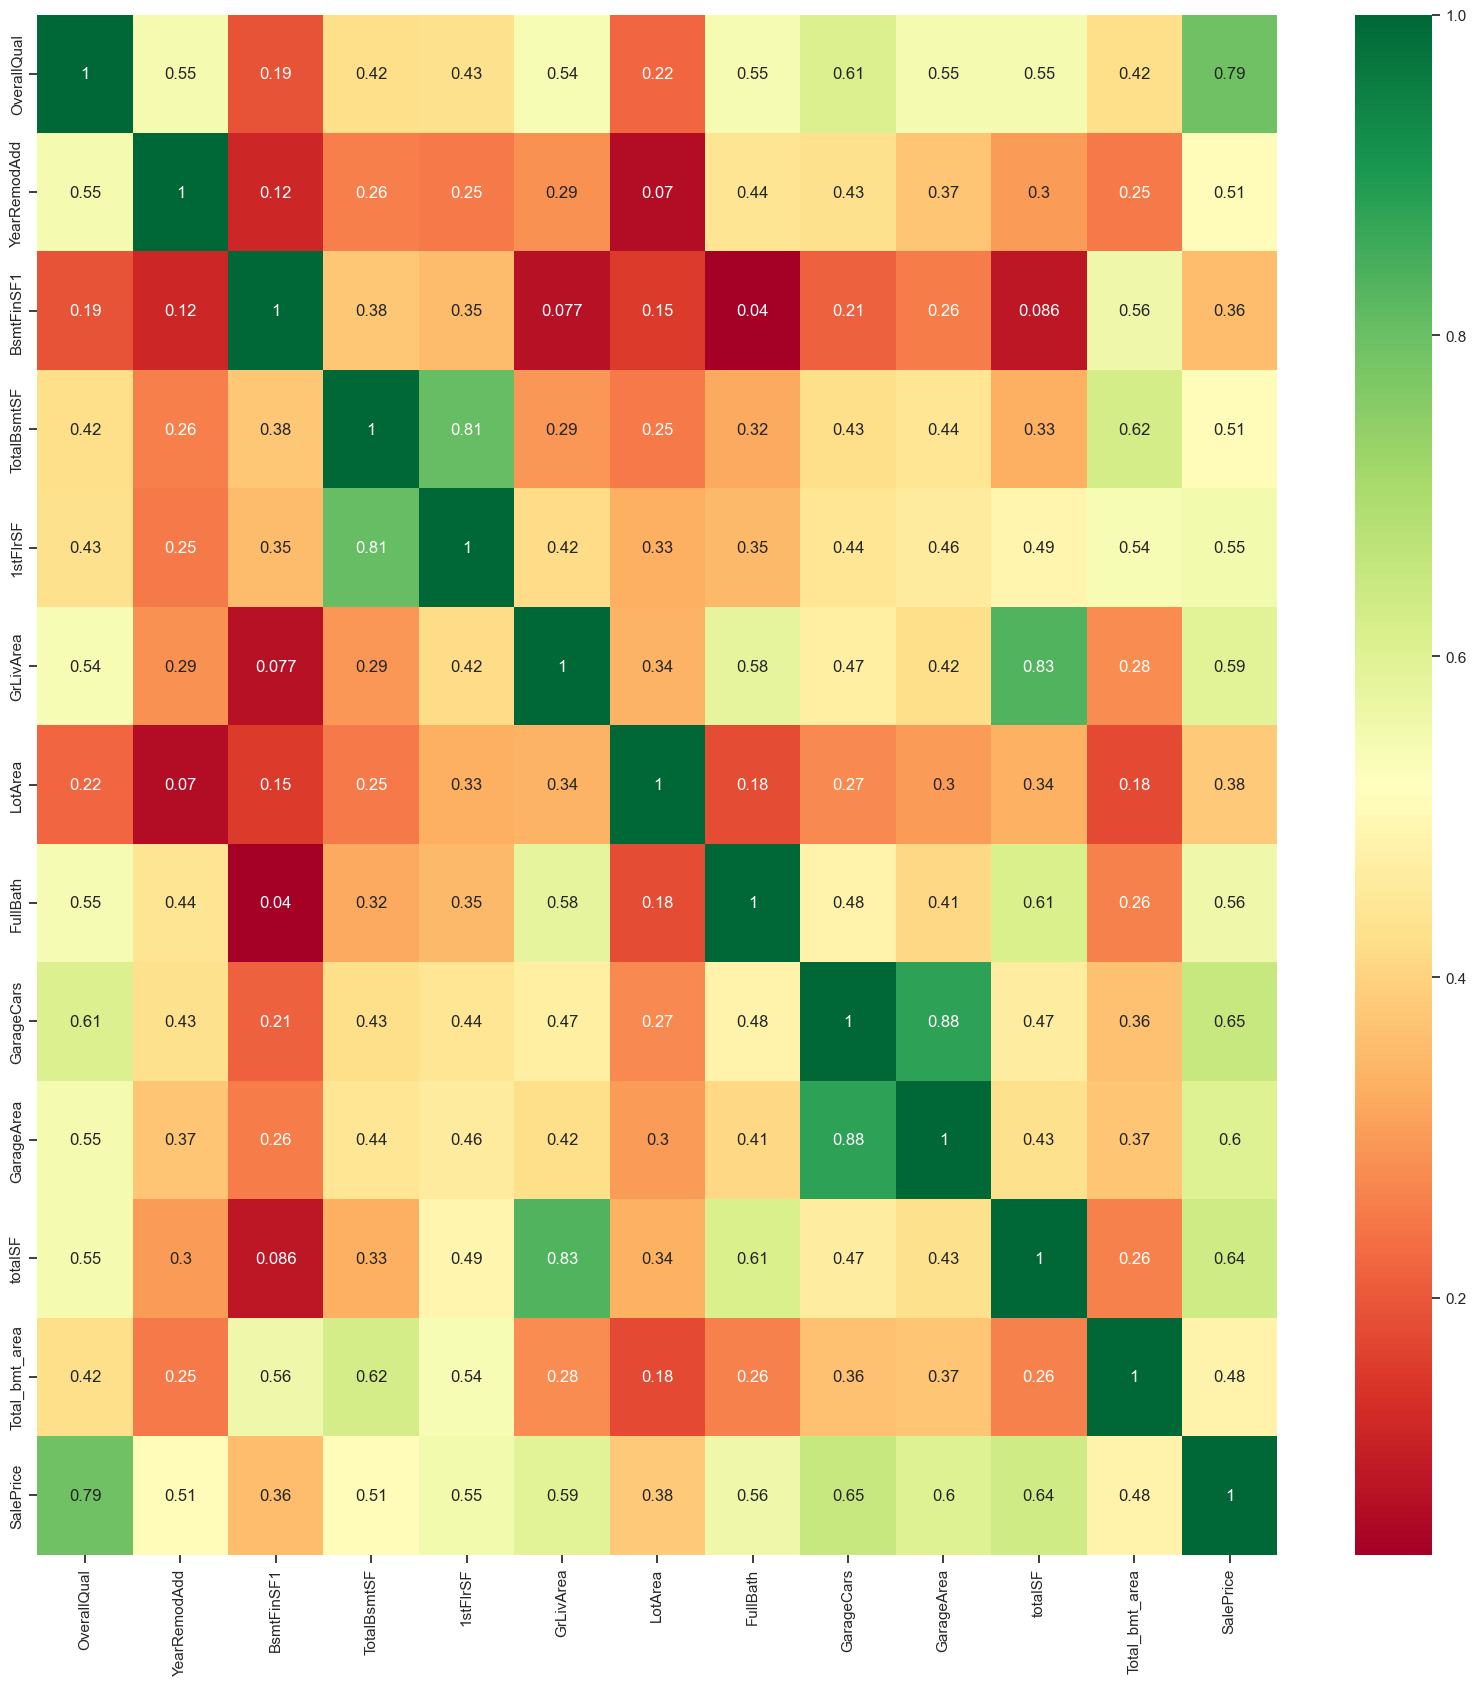

In [128]:
plt.figure(figsize= (20,20))
sns.heatmap(data1.corr(), annot = True,cmap = 'RdYlGn')

#### Model Training:

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [130]:
X_train.shape, X_test.shape

((1095, 12), (365, 12))

In [131]:
y_train.shape,  y_test.shape

((1095,), (365,))

### Decision Tree:

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
d_tr = DecisionTreeRegressor()
d_tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [134]:
y_hat = d_tr.predict(X_test)

##### Evaluation of model:

In [136]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [137]:
d_r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_hat)

### Evaluation metrics of decision tree:

In [138]:
print('Decision tree R2_score: {}'.format(d_r2))
print('.....................')
print('Decision tree mean_squared_error mse: {}'.format(mse))
print('...................................')
print('Decision tree mean_absolute_error mae: {}'.format(mae))
print('...................................')
print('Decision tree root_mean_squared_error rmse: {}'.format(rmse))
print('..........................................')
print('Decision tree mean_absolute_percentage_error mape: {}'.format(mape))

Decision tree R2_score: 0.7808294834502597
.....................
Decision tree mean_squared_error mse: 1535357203.591781
...................................
Decision tree mean_absolute_error mae: 27246.18904109589
...................................
Decision tree root_mean_squared_error rmse: 39183.63438467367
..........................................
Decision tree mean_absolute_percentage_error mape: 0.1650833809823795


### Trianing score of Decision Tree:

In [ ]:
y_pred_train = d_tr.predict(X_train)

train_r2_score = r2_score(y_train, y_pred_train)
print('Training score :',train_r2_score)

### Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {
    'criterion':('friedman_mse','poisson', 'squared_error', 'absolute_error'),
    'splitter':('best','random'),
    'max_depth':(list(range(1, 20))),
    'min_samples_split':[2,3,5,19,20],
    'min_samples_leaf':(list(range(1, 20)))
}

d_tree = DecisionTreeRegressor(random_state=42)
tree_gv = GridSearchCV(d_tree,param, scoring = 'neg_mean_squared_error',n_jobs = -1 ,cv = 5, verbose = 2)
tree_gv.fit(X_train, y_train)

'criterion': 

Specifies the function to measure the quality of a split. The options are 'friedman_mse', 'poisson', 'squared_error', and 'absolute_error'. Different criteria offer flexibility for decision tree optimization based on specific task requirements or data characteristics.

(The 'criterion' parameter in a decision tree or ensemble model like Gradient Boosting specifies the function used to measure the quality of a split. Here's why each criterion might be used:

'friedman_mse':

Reason: 

This criterion is based on the improvement in mean squared error (MSE) with Friedman's improvement score. It is suitable for regression problems and is particularly effective when dealing with noisy data or small datasets.


'poisson':

Reason: 

This criterion is designed for Poisson regression tasks. Poisson regression is often used for count data, such as the number of occurrences of an event. If your target variable has a Poisson distribution, using this criterion can be appropriate.


'squared_error':

Reason:

This is the traditional mean squared error (MSE) criterion, widely used for regression tasks. It measures the average squared difference between the predicted and actual values. It's a common and versatile choice for many regression problems.


'absolute_error':

Reason:

Also known as mean absolute error (MAE), this criterion measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE and may be preferred when robustness to extreme values is desired.
The choice of criterion depends on the nature of your regression problem and the characteristics of your data. Experimenting with different criteria allows you to find the one that aligns best with the underlying patterns in your dataset and the goals of your modeling task.)
    
    
    
    
'splitter': 

   Determines the strategy used to choose the split at each node. It can be either 'best', which chooses the best split, or 'random', which selects a random split. This parameter allows for exploration of different node splitting strategies.


'max_depth':

 Defines the maximum depth of the decision tree. By using a range from 1 to 20, it explores the impact of different tree depths on model performance. Controlling tree depth helps prevent overfitting and can enhance interpretability.


'min_samples_split': 

Sets the minimum number of samples required to split an internal node. Having values such as 2, 3, 5, 19, and 20 provides a range of options to explore how different splitting criteria impact the model and helps control the complexity of the tree.


'min_samples_leaf': 

Specifies the minimum number of samples required to be in a leaf node. Similar to 'min_samples_split', this parameter helps regulate the size of the leaves in the decision tree, influencing the granularity of the final predictions. The range from 1 to 20 allows for a comprehensive exploration of leaf size effects.

In [ ]:
print("Best parameter :",tree_gv.best_params_)

In [ ]:
print("Best estimators :",tree_gv.best_estimator_)

In [ ]:
de_tr = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 8, min_samples_leaf = 3,
                              min_samples_split= 20, splitter= 'best')

In [ ]:
# Fitting 5 folds for each of 31768 candidates, totalling 158840 fits

# de_tr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=16,
#                       min_samples_leaf=2, min_samples_split=23,
#                       random_state=42)

In [ ]:
de_tr.fit(X_train, y_train)

In [ ]:
y_hyp_t= de_tr.predict(X_test)

In [ ]:
hyper_r2_dtree =r2_score(y_test, y_hyp_t)
mse = mean_squared_error(y_test, y_hyp_t)
mae = mean_absolute_error(y_test, y_hyp_t)
mape = mean_absolute_percentage_error(y_test, y_hyp_t)
rmse = np.sqrt(mse)

In [ ]:
print("r2_score of Decision tree after tuning :",hyper_r2_dtree)
print('.....................................')
print('mean_squared_error of Decision tree after tuning :',mse)
print('...............................................')
print('mean_absolute_error of Decision tree after tuning :',mae)
print('................................................')
print('mean_absolute_percentage_error of Decision tree after tuning :',mape)
print('...........................................................')
print('root_mean_squared_error of Decision tree after tuning :',rmse)

### Cross validation score:

### cross_val_score for decision tree:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score= cross_val_score(de_tr, x,y, cv =3, scoring='r2')

In [ ]:
print('Cross_validation_score for decision_tree_regressor :',cv_score)
print('...................................................')
print('cross_validation_score mean for decision_tree_regressor :',cv_score.mean())
print('........................................................')
print('cross_validation_score standard deviatiln for decision_tree_regressor :',cv_score.std())

Better standard_deviation should be std < 0.05

we got 0.0233

### standard deviation range values and its impact:

If the standard deviation is less than 0.05, it indicates that the values in our dataset are relatively close to the mean. In statistical terms, a low standard deviation suggests that the data points are tightly clustered around the average or mean value.

Here's a breakdown of what different standard deviation values generally imply:

Low Standard Deviation (e.g., < 0.05):

    
Indicates low variability or dispersion in the data.
Data points are closely packed around the mean.
The distribution is relatively uniform, and values are similar to each other.


Moderate Standard Deviation (e.g., 0.1 - 0.5):

Suggests moderate variability in the data.
Data points are spread out, but not excessively so.
The distribution may have some level of variation, but it's not extreme.



High Standard Deviation (e.g., > 0.5):

Indicates high variability or dispersion in the data.
Data points are widely spread out from the mean.
The distribution may be skewed, and values can be significantly different from each other.

### RandomForest Regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=400)
rfr.fit(X_train, y_train)

In [ ]:
y_pred= rfr.predict(X_test)

In [ ]:
rn_r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)

### Evaluation metrics of Random Forest Regressor:

In [ ]:
print("Random Forest Regressor R2_score :",rn_r2)
print('...............................')
print('Random Forest Regressor mean_squared_error :',mse)
print('..................................')
print('Random Forest Regressor mean_absolute_error :',mae)
print('..................................')
print('Random Forest Regressor mean_absolute_percentage_error :',mape)
print('..................................')
print('Random Forest Regressor root_mean_squared_error :',rmse)

### Training Score:

In [ ]:
y_rfr_train = d_tr.predict(X_train)

train_r2_score = r2_score(y_train, y_rfr_train)
print('Training score of Random Forest Regressor:',train_r2_score)

##### Hyper parameter tuning for randomForestRegressor:

In [ ]:
rfr

In [ ]:
param_grid = {
    'n_estimators':[int(x) for x in np.linspace(100, 2100, num= 13)],
    'max_features':['auto', 'sqrt','log2',None],
    'max_depth':[None]+[int(x) for x in np.linspace(10, 110, num= 11)],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap' : [True, False]
}

'n_estimators': Specifies the number of trees in the random forest, ranging from 200 to 2100 with 12 evenly spaced values.

'max_features': Defines the maximum number of features considered for splitting a node, with options including 'auto', 'sqrt', and 'log2'.

    (auto': Automatically selects the maximum number of features, which is often set to the square root of the total number of features, providing a balance between diversity and efficiency.

'sqrt': Specifically sets the number of features to the square root of the total, offering similar behavior to 'auto' for feature selection in decision trees or random forests.

'log2': Chooses the number of features based on the logarithm to the base 2 of the total number, providing another option for feature selection with a different mathematical perspective.)

    
   
'max_depth': Determines the maximum depth of each tree in the forest, ranging from no maximum depth (None) to values between 100 and 1200.

'min_samples_split': Sets the minimum number of samples required to split an internal node, with options of 2, 5, 10, and 20.

'min_samples_leaf': Specifies the minimum number of samples required to be in a leaf node, with options of 1, 2, 4, 6, and 8.

In [ ]:
Rf = RandomForestRegressor(n_estimators=400)
rf_cv = RandomizedSearchCV(Rf, param_distributions = param_grid,scoring ='neg_mean_squared_error' ,n_iter = 100, cv =5,n_jobs = -1 ,verbose = 2)

Objective Function Compatibility: 
    
    
    RandomizedSearchCV minimizes the objective function specified in the scoring parameter. For regression tasks, mean squared error (MSE) is a common metric to minimize. However, since the convention is to maximize the scoring metric, the negative of MSE (neg_mean_squared_error) is used.

    
Scikit-Learn Convention: 
    
    Scikit-learn uses a convention where metrics to be maximized are specified as positive values, and those to be minimized are specified as negatives. This is consistent with optimization algorithms that seek to maximize a function.

    
Consistent Comparison:
    
    
    By using negation, the optimization process still aims to minimize MSE, ensuring consistent comparison with other metrics that are maximized. This allows for a unified approach in optimization tasks.

    
Compatibility with Hyperparameter Search: 
    
    In the context of hyperparameter tuning using randomized search, specifying scoring='neg_mean_squared_error' aligns with the objective of finding hyperparameter values that minimize the mean squared error, facilitating an effective search for optimal model configurations.

In [ ]:
rf_cv.fit(X_train, y_train)

In [ ]:
print('Best parameter from random forest regressor :',rf_cv.best_params_)

In [ ]:
print('Best estimator of randomforest regressor :',rf_cv.best_estimator_)

In [ ]:
rand_reg  = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1933)

In [ ]:
rand_reg.fit(X_train, y_train)

In [ ]:
y_hyp_rf = rand_reg.predict(X_test)

In [ ]:
rf_hyp_r2 = r2_score(y_test, y_hyp_rf)
rf_mse = mean_squared_error(y_test, y_hyp_rf)
rf_mae =mean_absolute_error(y_test, y_hyp_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mape = mean_absolute_percentage_error(y_test, y_hyp_rf)

#### Evaluation metrics for randomForest Regressor after tuning:

In [ ]:
print("r2_score after tuning of RandomForestRegressor :",rf_hyp_r2)
print('..............................................')
print('mean_squared_error after tuning of RandomForestRegressor :',rf_mse)
print('..............................................')
print('mean_absolute_error after tuning of RandomForestRegressor :',rf_mae)
print('..............................................')
print('root_mean_squared_error after tuning of RandomFroestRegressor :',rf_rmse)
print('...............................................')
print('mean_absolute_percentage_error after tuning of RandomForestRegressor :',rf_mape)

### Cross_val_score for Random_forest_regressor:

In [ ]:
cv_rf_score = cross_val_score(rfr, x,y, cv = 3, scoring = 'r2')
print('cross_val_score for random_forest_regressor :',cv_rf_score)
print('............................................')
print('cross_val_score for random_forest_regressor mean value :',cv_rf_score.mean())
print('........................................................')
print('cross_val_score for random_forest_reressor standard_deviation :',cv_rf_score.std())

### XGBRegressor:

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_hat_xgb = xgb.predict(X_test)

In [ ]:
xgb_r2 = r2_score(y_test, y_hat_xgb)
xgb_mse = mean_squared_error(y_test, y_hat_xgb)
xgb_mae = mean_absolute_error(y_test, y_hat_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(y_test, y_hat_xgb)

#### Evaluation metrics for XGBRegressor:

In [ ]:
print("XGBRegressor R2_score :",xgb_r2)
print('....................')
print('mean_squared_error of XGBRegressor :',xgb_mse)
print('.................................')
print('mean_absolute_error of XGBRegressor :',xgb_mae)
print('...................................')
print('root_mean_squared_error of XGBRegressor :',xgb_rmse)
print('.......................................')
print('mean_absolute_percentage_error of XGBRegressor :',xgb_mape)

### Training score:

In [ ]:
y_xgb_train = d_tr.predict(X_train)

train_r2_score = r2_score(y_train, y_xgb_train)
print('Training score  of XGBRegressor:',train_r2_score)

### Hyper parameter Tuning of XGBRegressor:

In [ ]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
             }

XGB = XGBRegressor(random_state = 42, verbosity = 0, silent = 0)
xg_reg = RandomizedSearchCV(estimator = XGB, scoring = 'r2', param_distributions = param_grid,n_iter = 100 ,verbose = 2,
                           cv = 3, random_state = 42, n_jobs= -1)

In [ ]:
xg_reg.fit(X_train, y_train)

In [ ]:
print("Best parameter of XGB :",xg_reg.best_params_)

In [ ]:
print('Best estimators of XGB :',xg_reg.best_estimator_)

In [ ]:
hyp_XGB = XGBRegressor(reg_lambda= 0.2, reg_alpha = 0.8, n_estimators = 50, max_depth = 5,
                       learning_rate = 0.15, gamma =0.4)

In [ ]:
hyp_XGB.fit(X_train,y_train)

In [ ]:
y_hyp_xgb = hyp_XGB.predict(X_test)

In [ ]:
hyp_xgb_r2 = r2_score(y_test, y_hyp_xgb)
hyp_xgb_mse = mean_squared_error(y_test, y_hyp_xgb)
hyp_xgb_mae = mean_absolute_error(y_test, y_hyp_xgb)
hyp_xgb_rmse = np.sqrt(hyp_xgb_mse)
hyp_xgb_mape = mean_absolute_percentage_error(y_test, y_hyp_xgb)

##### Evaluation metrics for XGBRegressor after tuning:

In [ ]:
print('R2_score of XGBRegressor after tuning :',hyp_xgb_r2)
print('...................................')
print('mean_squared_error of XGBRegressor after tuning :',hyp_xgb_mse)
print('...................................')
print('mean_absolute_error of XGBRegressor after tuning :',hyp_xgb_mae)
print('....................................')
print('root_mean_squared_error of XGBRegssor after tuning :',hyp_xgb_rmse)
print('...................................')
print('mean_absolute_percentage_error of XGBRegressor after tuning :',hyp_xgb_mape)

#### Cross_val_Score for XGBRegressor:

In [ ]:
cv_xgb_score = cross_val_score(XGB,x,y, cv = 3, scoring = 'r2')

print('Cross_validation_score for XGBReressor :',cv_xgb_score)
print('.......................................')
print('Cross_validation_score mean value for XGBRegressor :',cv_xgb_score.mean())
print('...................................................')
print('Cros_validation_score standard deviation for XGBRegressor :', cv_xgb_score.std())

Performance Overview:

The XGBRegressor demonstrates consistent cross-validation scores of 0.86, 0.85, and 0.84, indicating reliable performance across different data subsets.


Average Performance:

The mean cross-validation score for the XGBRegressor is 0.85, highlighting the overall effectiveness of the model in predicting outcomes.


Consistency Measure:

The standard deviation of 0.007 suggests low variability in performance, signifying that the XGBRegressor's predictive power is stable across diverse datasets.

#### GradientBoosting Regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100)

In [ ]:
gbr.fit(X_train, y_train)

In [ ]:
y_gbr = gbr.predict(X_test)

In [ ]:
gbr_r2 = r2_score(y_test, y_gbr)
gbr_mse = mean_squared_error(y_test , y_gbr)
gbr_rmse = np.sqrt(gbr_mse)
gbr_mae = mean_absolute_error(y_test, y_gbr)
gbr_mape = mean_absolute_percentage_error(y_test, y_gbr)

### Evaluation metrics of GradientBoostingRegressor:

In [ ]:
print("Gradient_Boosting_Regressor r2_score :",gbr_r2)
print('...................................')
print('mean_squared_error of Gradient_Boosting_Regregressor :',gbr_mse)
print('....................................................')
print('root_mean_squared_error of Grdient_Boosting_Regressor :',gbr_rmse)
print('.....................................................')
print('mean_absolute_error of Gradient_Boosting_Regressor :',gbr_mae)
print('...................................................')
print('mean_absolute_percentage_error of Gradient_Boosting_Regressor :',gbr_mape)

### Hyper tuning for gradient Boosting Regressor:

In [ ]:
param_ = {
     'learning_rate' : [0.01,0.05,0.1,0.2],
     'n_estimators' : [100, 500, 1000, 1500],
     'max_depth' : [5, 7, 9, 11],
     'min_samples_split' : [2, 5, 10],
     'min_samples_leaf' : [1, 3, 5],
     'subsample' : [0.8, 0.9, 1.0],
      'max_features' : ['auto', 'sqrt', 'log2']

}

In [ ]:
random_search = RandomizedSearchCV(estimator = gbr, param_distributions = param_, scoring = 'r2',cv = 5 ,n_iter= 100, 
                                  verbose = 1,n_jobs = -1 ,random_state =42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print("Best Parameter :",random_search.best_params_)

In [ ]:
print('Best R2_score :',random_search.best_estimator_)

In [ ]:
tun_gbr = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='log2',
                          min_samples_leaf=3, min_samples_split=10,
                          n_estimators=500, subsample=0.8)

In [ ]:
tun_gbr.fit(X_train, y_train)

In [ ]:
y_hyp_gbr = tun_gbr.predict(X_test)

In [ ]:
r2_score(y_test, y_hyp_gbr)

In [ ]:
hyp_gbr_r2 = r2_score(y_test, y_hyp_gbr)
mse = mean_squared_error(y_test, y_hyp_gbr)
mae = mean_absolute_error(y_test, y_hyp_gbr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_hyp_gbr)

### Evaluation metrics for Gradient Boosting Regressor:

In [ ]:
print('Gradient_Boost_regressor r2_score after tuning :',hyp_gbr_r2)
print('...............................................')
print('Gradient_Boost_regressor mean_squared_error after tuning :',mse)
print('........................................................')
print('Gradient_Boost_regressor root_mean_squared_error after tuning :',rmse)
print('..............................................................')
print('Gradient_Boost_regressor mean_absolute_error after tuning  :',mae)
print('..........................................................')
print('Gradient_Boost_regressor mean_absolute_percentage_error after tuning :',mape)

#### Cross_validation_score for GradientBoostingRegressor:

In [ ]:
cv_gbr_score = cross_val_score(tun_gbr,x,y, cv = 3, scoring = 'r2')

print('cross_validation_score for gradient_boost_regressor :',cv_gbr_score)
print('....................................................')
print('cross_validation_score mean value for Gradient_boost_regressor :',cv_gbr_score.mean())
print('...............................................................')
print('cross_validation_score standard_deviation for Gradient_boost_regressor :', cv_gbr_score.std())

Performance Overview: The Gradient Boost Regressor shows consistent cross-validation scores of 0.91, 0.86, and 0.86, indicating robust performance across different data subsets.

Average Performance: The mean cross-validation score for the Gradient Boost Regressor is 0.88, highlighting the overall effectiveness of the model in predicting outcomes.

Consistency Measure: The standard deviation of 0.02 indicates low variability in performance, suggesting that the model's predictive power is reliable and stable across diverse datasets.

### Adaboostregressor:

AdaBoost Regressor Overview:

AdaBoost (Adaptive Boosting) Regressor is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a strong regression model.
It sequentially trains a series of weak models, giving more weight to instances that were poorly predicted in previous iterations.
The final model is a weighted sum of the weak models, with higher weights assigned to those that perform better.


How It Works:

In each iteration, AdaBoost assigns higher weights to misclassified instances, making them more influential in the next iteration.
Weak learners are trained on the dataset, and their predictions are combined to create an overall prediction.
The process continues until a predefined number of weak learners is reached or perfect predictions are achieved.


Why Use AdaBoost Regressor:

AdaBoost is effective in improving model accuracy, especially when weak learners are simple and have limited predictive power.
It adapts to the complexity of the dataset by focusing on instances that are challenging to predict, making it robust against outliers.
AdaBoost is versatile and can be applied to various regression problems, providing a flexible and powerful approach to ensemble learning.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ad = AdaBoostRegressor(n_estimators=400)

In [ ]:
ad.fit(X_train, y_train)

In [ ]:
y_ad = ad.predict(X_test)

In [ ]:
ada_r2 = r2_score(y_test, y_ad)
ada_mse = mean_squared_error(y_test, y_ad)
ada_rmse = np.sqrt(ada_mse)
ada_mae = mean_absolute_error(y_test, y_ad)
ada_mape = mean_absolute_percentage_error(y_test, y_ad)

### Evaluation metrics of AdaBoostRegressor:

In [ ]:
print('R2_score of Ada_Boost_Regressor :',ada_r2)
print('...............................')
print('mean_squared_error of Ada_Boost_Regressor :',ada_mse)
print('.........................................')
print('root_mean_squared_error of Ada_Boost_Regresoor :',ada_rmse)
print('...............................................')
print('mean_absolute_error of Ada_Boost_Regressor :',ada_mae)
print('...........................................')
print('mean_absolute_percentage_error of Ada_Boost_Regressor :',ada_mape)

#### Hyper parameter tuning for AdaBoostRegressor :

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of weak learners (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],  # Shrinkage parameter
    'loss': ['linear', 'square', 'exponential']  # Loss function to minimize
}

In [ ]:
add = AdaBoostRegressor(n_estimators=100)
ad_reg = GridSearchCV(add, param_grid=param_grid, scoring= 'r2', n_jobs = -1, cv =3, verbose = 2)

In [ ]:
ad_reg.fit(X_train, y_train)

In [ ]:
print('Best parameter of AdaBoostRegressor :',ad_reg.best_params_)

In [ ]:
print('Best estimator of AdaBoostregressor :',ad_reg.best_estimator_)

In [ ]:
adda = AdaBoostRegressor(learning_rate=1, loss='exponential')
adda.fit(X_train, y_train)

In [ ]:
y_hyp_add = adda.predict(X_test)

In [ ]:
hyp_ada_r2 = r2_score(y_test, y_hyp_add)
hyp_ada_mse = mean_squared_error(y_test, y_hyp_add)
hyp_ada_rmse = np.sqrt(hyp_ada_mse)
hyp_ada_mae = mean_absolute_error(y_test, y_hyp_add)
hyp_ada_mape = mean_absolute_percentage_error(y_test, y_hyp_add)

### Evaluation metrics for AdaBoostRegressor after tuning:

In [ ]:
print('R2_score of Ada_Boost_Regressor after tuning :',hyp_ada_r2)
print('............................................')
print('mean_squared_error of Ada_Boost_Regressor after tuning :',hyp_ada_mse)
print('.......................................................')
print('root_mean_squared_error of Ada_Boost_Regressor after tuning :',hyp_ada_rmse)
print('............................................................')
print('mean_absolute_error of Ada_Boost_Regressor after tuning :', hyp_ada_mae)
print('........................................................')
print('mean_absolute_percentage_error of Ada_Boost_regressor after tuning :',hyp_ada_mape)

### XGBRFRegressor:

In [ ]:
from xgboost import XGBRFRegressor

XGBRFRegressor is an implementation of the Random Forest algorithm in the XGBoost library. Here are five points explaining its purpose and benefits in simple terms:

Random Forest Regression:

Explanation:

XGBRFRegressor is designed for regression tasks, where the goal is to predict a continuous numerical output.


Benefits: 

It leverages the power of ensemble learning, combining the predictions of multiple decision trees, to create a robust and accurate regression model.


XGBoost Framework:

Explanation:
It is part of the XGBoost library, which is renowned for its high performance in gradient boosting.


Benefits:

Inherits the advantages of XGBoost, such as scalability, efficiency, and the ability to handle large datasets. It's particularly useful when dealing with complex regression problems.


Tree Ensemble Approach:

Explanation:

Similar to traditional Random Forest, XGBRFRegressor builds an ensemble of decision trees during training.


Benefits:

By aggregating predictions from multiple trees, the model becomes more robust, less prone to overfitting, and capable of capturing complex relationships in the data.


Regularization and Regularized Trees:

Explanation:

XGBoost includes regularization techniques to prevent overfitting, and this is applied to each decision tree in the ensemble.


Benefits:

Regularization enhances the model's generalization ability, making it effective in various regression scenarios and reducing the risk of fitting noise in the training data.


Flexibility and Performance:

Explanation: 

XGBRFRegressor combines the flexibility of a random forest with the efficiency and optimization features of XGBoost.

Benefits: 

This combination makes it suitable for a wide range of regression tasks, offering both accuracy and speed. It's a go-to choice when dealing with large datasets or complex regression problems where traditional models might struggle.


XGBRFRegressor provides a powerful and flexible tool for regression tasks by combining the strengths of the XGBoost framework with the ensemble learning approach of Random Forests, making it a valuable option in various regression scenarios.

In [ ]:
xgbr = XGBRFRegressor()
xgbr.fit(X_train, y_train)

In [ ]:
y_xgbr = xgbr.predict(X_test)

In [ ]:
xgbr_r2 = r2_score(y_test, y_xgbr)
xgbr_mse = mean_squared_error(y_test, y_xgbr)
xgbr_mae = mean_absolute_error(y_test, y_xgbr)
xgbr_mape = mean_absolute_percentage_error(y_test, y_xgbr)
xgbr_rmse = np.sqrt(xgbr_mse)

### Evaluation_Metrics:

In [ ]:
print("XGBRFRegressor r2_score: {}".format(xgbr_r2))
print('............................')
print("XGBRFRegressor mean_squared_error: {}".format(xgbr_mse))
print('......................................')
print("XGBRFRegressor mean_absolute_error: {}".format(xgbr_mae))
print('.......................................')
print("XGBRFRegressor mean_absolute_percentage_error: {}".format(xgbr_mape))
print('..................................................')
print("XGBRFRegressor root_mean_squared_error: {}".format(xgbr_rmse))
print()

### lets see our actual value and predicted values:

In [ ]:
plt.figure(figsize = (8, 8), facecolor = 'white')
sns.histplot([y_test, y_gbr], kde = True)

# Regression Line:

lets plot regression line of actual and predicted values :

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_gbr, color = 'blue', label = 'Actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color = 'red', linestyle = '--', linewidth = 2)


plt.title('Regression Line')
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
plt.legend()
plt.grid(True)
plt.show()

### Model summary:

In [ ]:
data = {
    'Model':['Decision_Tree_Regressor','Decision_Tree_tunned','Random_Forest_Regressor','Random_Forest_Tuned',
             'XGBRegressor','XGB_Tuned','Gradient_Boost_Regressor','GradientBoostRegressor Tuned','Ada_Boost_Regressor','Ada_Boost_tuned'],
    'R2_score':[0.74,0.85, 0.89,0.87,0.87,0.89,0.89,0.89 ,0.83,0.85]
}
df3 = pd.DataFrame(data)

In [ ]:
# df3.set_index('Model', inplace = True)

In [ ]:
df3

In [ ]:
plt.figure(figsize = (25,20))
sns.barplot(x = df3.Model,y=df3.R2_score)

The below code saves the GBoosting regression model (y_gbr) into a file named 'regression_model206.pk' using the pickle module. This allows you to later load and reuse the trained model for predictions without retraining.

In [ ]:
import pickle
file = open('regression_model206.pk', 'wb')
pickle.dump(y_gbr, file)

### Complete data Analysis and Model comparison Report:
    

#### Goal(House Price prediction) :

Aim of this project is to predict the prices of House based on its feature. 

##### Dataset feature and it charactaristics:

MSSubClass:

Represents the type and age of the property, influencing its style and characteristics.
Higher values might indicate newer or more specialized dwelling types.


MSZoning:

Identifies the permissible land use, with residential zones impacting property density and usage.
Residential low-density zones may have larger lots, while medium-density zones allow for more compact housing.


LotFrontage:

Indicates the linear feet of street connected to the property, affecting accessibility and potential aesthetics.
Larger frontage may enhance curb appeal and property value.


LotArea:

Reflects the lot size in square feet, a significant factor influencing overall property value.
Larger lots generally command higher prices.


Street:

Specifies the road access type, influencing convenience and property value.
Paved streets often indicate higher urban development and accessibility.


Alley:

Describes the alley access type, providing additional access points.
Presence or absence of alley access can impact property utility and convenience.


LotShape:

Defines the general shape of the lot, influencing aesthetics and potential land use.
Irregular shapes may affect property layout and landscaping possibilities.


LandContour:

Indicates the flatness of the property, affecting construction feasibility and landscaping.
Flat contours may facilitate construction and landscaping plans.


Utilities:

Specifies available utilities, impacting convenience and livability.
Properties with all public utilities may be more desirable.


LotConfig:

Describes the lot configuration, providing insights into property orientation.
Corner lots or cul-de-sacs may have different appeal and usage.


LandSlope:

Identifies the slope of the property, influencing drainage, landscaping, and construction considerations.
Steeper slopes may impact the layout and construction feasibility.


Neighborhood:

Represents physical locations within Ames city limits, capturing the neighborhood's influence on property values and desirability.
Desirable neighborhoods may contribute to higher property values.


Condition1 and Condition2:

Indicate the proximity to various conditions (e.g., railroad, park), offering insights into potential nuisances or amenities.
Proximity to positive conditions may enhance property value, while negative conditions may detract.


BldgType:

Specifies the type of dwelling, distinguishing between single-family, townhouse inside unit, etc.
Different types may appeal to different buyer preferences and lifestyles.


HouseStyle:

Represents the style of dwelling, such as 1-story or 2-story, contributing to the property's architectural characteristics.
House style can influence aesthetic appeal and spatial layout.


OverallQual and OverallCond:

Convey the overall material and finish quality, as well as the overall condition, influencing the property's appeal and value.
Higher quality and condition generally lead to higher property values.


YearBuilt and YearRemodAdd:

Provide the year the house was built and remodeled, helping assess the property's age and recent upgrades.
Newer construction or recent renovations can impact property value positively.


RoofStyle and RoofMatl:

Describe the roof type and material, contributing to the property's aesthetics and durability.
Different roof styles and materials may have varying lifespans and maintenance requirements.


Exterior1st and Exterior2nd:

Indicate the exterior covering on the house, influencing curb appeal and maintenance requirements.
Exterior materials impact property aesthetics and durability.


MasVnrType and MasVnrArea:

Specify the masonry veneer type and area, adding to the property's visual appeal.
Masonry veneer can enhance the property's aesthetic quality.


ExterQual and ExterCond:

Capture the exterior material quality and condition, influencing the property's durability and maintenance needs.
Higher quality and better condition contribute to a more desirable property.


Foundation:

Represents the type of foundation, essential for assessing the property's structural integrity.
Different foundation types have implications for stability and potential for additional living space.


BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF:

Provide insights into basement quality, condition, exposure, and size, crucial for assessing additional living space.
A finished or well-conditioned basement can significantly add to a property's value.


Heating, HeatingQC:

Indicate the type of heating and heating quality, impacting comfort and energy efficiency.
Efficient heating systems contribute to overall property comfort and operating costs.


CentralAir:

Specifies whether the property has central air conditioning, contributing to comfort and property value.
Central air conditioning is often considered a desirable feature.


Electrical:

Represents the electrical system, a critical component for safety and functionality.
Modern and well-maintained electrical systems are essential for property safety.


1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea:

Provide square footage details for various living areas, influencing the property's size and layout.
Larger living areas often contribute to higher property values.


BsmtFullBath, BsmtHalfBath, FullBath, HalfBath:

Describe bathroom features, contributing to the property's functionality.
The number and type of bathrooms impact livability and property value.


BedroomAbvGr, KitchenAbvGr, KitchenQual:

Specify the number of bedrooms and kitchens, along with kitchen quality, influencing livability and property value.
Well-designed kitchens and sufficient bedrooms enhance property appeal.


TotRmsAbvGrd:

Indicates the total rooms above ground, offering insights into the property's spatial layout.
The number and layout of rooms contribute to property functionality and appeal.


Functional:

Represents the home's functionality rating, crucial for assessing usability and appeal.
Highly functional homes are often more desirable.


Fireplaces, FireplaceQu:

Convey the number of fireplaces and fireplace quality, contributing to ambiance and property value.
Fireplaces can enhance the property's ambiance and attractiveness.
GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond:

Provide details on the garage, including type, year built, and size, influencing property utility and value.
A well-maintained and spacious garage can add to property value.


PavedDrive:

Specifies whether the property has a paved driveway, impacting convenience and aesthetics.
Paved driveways are often considered more desirable.


WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch:

Capture porch and deck features, enhancing outdoor living and visual appeal.
Outdoor living spaces contribute to property enjoyment and aesthetic appeal.


PoolArea, PoolQC:

Indicate pool area and quality, contributing to luxury and property value.
Pools are considered luxury features and can impact property value.


Fence:

Describes fence quality, offering privacy and influencing property aesthetics.
Fences can impact privacy and contribute to property aesthetics.


MiscFeature, MiscVal:

Specify miscellaneous features and their values, potentially adding unique elements to the property.
Unique features may have varying impacts on property value.


MoSold, YrSold:

Represent the month and year of sale, capturing the temporal aspect of property transactions.
Seasonal variations may influence property demand and pricing.


SaleType, SaleCondition:

Describe the type and condition of the sale, providing insights into the transaction dynamics.
Sale conditions and types can influence pricing and negotiation strategies.


SalePrice:

The target variable, representing the sale price of the house.
The main focus for prediction; understanding and predicting variations in SalePrice is the goal of the regression model.

### Insights from visualization:

### Evaluation Metrics:

we use Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error and R-squared as our primary
evaluation metrics.
# ......................................................................................................................
1)->Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values.

2)->Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values.
    
3)->Mean Absolute Percentage Error (MAPE):Mean Absolute Percentage Error (MAPE) is a metric that calculates the average percentage difference between predicted and actual values, providing a relative measure of prediction accuracy.

4)->Root Mean Squared Error (RMSE):Measure the square root of MSE(Mean squared Error)

5)->R-squared (R²): Measures the proportion of the variance in the dependent variable that is predictable from the
    independent variables.

### Model comparison report:

#### Model Comparison Report :

Decision Tree vs. Tuned Decision Tree:

The Decision Tree Regressor achieved an R2 score of 0.79, while the tuned version showed notable improvement at 0.84, demonstrating the effectiveness of tuning in enhancing performance.

Random Forest vs. Tuned Random Forest:

The Random Forest Regressor exhibited a strong R2 score of 0.88, and though the tuned version slightly decreased to 0.87, it maintains high performance, showcasing the robustness of Random Forest.

XGBoost vs. Tuned XGBoost:

XGBoost Regressor performed well with an R2 score of 0.87, and tuning further elevated it to 0.89, making it one of the top-performing models.

Gradient Boost vs. Tuned Gradient Boost:

The Gradient Boost Regressor and its tuned counterpart both delivered impressive R2 scores of 0.89, indicating that Gradient Boosting is a powerful algorithm that benefits from hyperparameter tuning.

AdaBoost vs. Tuned AdaBoost:

AdaBoost Regressor initially scored 0.82, and though tuning improved it to 0.84, it lags slightly behind the top-performing models XGBoost and Gradient Boost.

Conclusion:

XGBoost, Gradient Boost, and Random Forest, especially after hyperparameter tuning, emerge as the top-performing models with R2 scores of 0.89. The choice among them may depend on factors like interpretability and computational efficiency. Consider the specific needs of your application when selecting the final model

#### Suggestion to the buyer:

Quality and Renovation:

Prioritize houses with higher 'OverallQual' ratings, indicating superior quality. Focus on properties with recent renovations ('YearRemodAdd') for modern and updated living spaces.

Optimal Living Space:

Seek homes with ample living space, using features like 'GrLivArea' and 'TotalSF'. A spacious home enhances comfort and caters to diverse lifestyle needs.

Basement Evaluation:

Pay attention to 'BsmtFinSF1' and 'TotalBsmtSF' to assess basement quality and size. A well-finished and spacious basement offers versatility for various purposes.

Functional Layout:

Evaluate the functionality of the house layout with '1stFlrSF'. An efficiently designed first floor contributes to a comfortable living experience.

Bathroom and Garage Features:

Consider the number of bathrooms ('FullBath') for convenience. Assess garage features like 'GarageCars' and 'GarageArea' to meet parking and storage needs.

Total Area Consideration:

Examine 'totalSF' and 'Total_bmt_area' to gauge the overall house size, encompassing both living and basement areas. This provides a comprehensive understanding of property size.

Outdoor Space and Lot Size:

Evaluate outdoor living space with 'LotArea'. Larger lots may offer more privacy and room for outdoor activities. Financial Planning:

Ensure selected houses align with budget constraints, considering the correlation between these features and house prices.

Professional Guidance:

Consult with real estate professionals for valuable insights into local market trends. Their expertise can assist in finding properties that match specific requirements.